# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count',
                  'synonyms_count', 'orthographic_density']
N_COMPONENTS = 3
BIN_COUNT = 4

Imports and database setup.

In [2]:
from itertools import product

import pandas as pd
import seaborn as sb
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.exclude_past, max_distance=1)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id)\
        .filter(Substitution.model == model)
    print("Got {} substitutions for model {}"
          .format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = \
                substitution.features(feature, sentence_relative='median')
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'feature': feature,
                'source': source,
                'source_rel': source_rel,
                'destination': destination,
                'destination_rel': destination_rel,
                'h0': substitution.feature_average(feature),
                'h0_rel': substitution.feature_average(
                        feature, sentence_relative='median'),
                'h0n': substitution.feature_average(
                        feature, source_synonyms=True),
                'h0n_rel': substitution.feature_average(
                        feature, source_synonyms=True,
                        sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 15119 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.all, durl=Durl.exclude_past, max_distance=1)


  0% (    0 of 15119) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (    7 of 15119) |                    | Elapsed Time: 0:00:27 ETA: 16:14:54

  0% (   25 of 15119) |                     | Elapsed Time: 0:00:27 ETA: 4:34:51

  0% (   42 of 15119) |                     | Elapsed Time: 0:00:27 ETA: 2:44:41

  0% (   58 of 15119) |                     | Elapsed Time: 0:00:27 ETA: 2:00:03

  0% (   75 of 15119) |                     | Elapsed Time: 0:00:27 ETA: 0:03:18

  0% (   93 of 15119) |                     | Elapsed Time: 0:00:28 ETA: 0:03:08

  0% (  111 of 15119) |                     | Elapsed Time: 0:00:28 ETA: 0:03:09

  0% (  129 of 15119) |                     | Elapsed Time: 0:00:28 ETA: 0:03:06

  0% (  147 of 15119) |                     | Elapsed Time: 0:00:28 ETA: 0:03:03

  1% (  165 of 15119) |                     | Elapsed Time: 0:00:29 ETA: 0:03:03

  1% (  189 of 15119) |                     | Elapsed Time: 0:00:29 ETA: 0:03:01

  1% (  205 of 15119) |                     | Elapsed Time: 0:00:29 ETA: 0:03:05

  1% (  220 of 15119) |                     | Elapsed Time: 0:00:29 ETA: 0:03:09

  1% (  237 of 15119) |                     | Elapsed Time: 0:00:29 ETA: 0:03:10

  1% (  255 of 15119) |                     | Elapsed Time: 0:00:30 ETA: 0:03:09

  1% (  271 of 15119) |                     | Elapsed Time: 0:00:30 ETA: 0:03:11

  1% (  287 of 15119) |                     | Elapsed Time: 0:00:30 ETA: 0:03:06

  1% (  301 of 15119) |                     | Elapsed Time: 0:00:30 ETA: 0:03:12

  2% (  314 of 15119) |                     | Elapsed Time: 0:00:31 ETA: 0:03:25

  2% (  328 of 15119) |                     | Elapsed Time: 0:00:31 ETA: 0:03:34

  2% (  342 of 15119) |                     | Elapsed Time: 0:00:31 ETA: 0:03:40

  2% (  357 of 15119) |                     | Elapsed Time: 0:00:31 ETA: 0:03:41

  2% (  378 of 15119) |                     | Elapsed Time: 0:00:31 ETA: 0:03:36

  2% (  394 of 15119) |                     | Elapsed Time: 0:00:32 ETA: 0:03:29

  2% (  410 of 15119) |                     | Elapsed Time: 0:00:32 ETA: 0:03:24

  2% (  426 of 15119) |                     | Elapsed Time: 0:00:32 ETA: 0:03:20

  2% (  440 of 15119) |                     | Elapsed Time: 0:00:32 ETA: 0:03:22

  3% (  456 of 15119) |                     | Elapsed Time: 0:00:33 ETA: 0:03:22

  3% (  473 of 15119) |                     | Elapsed Time: 0:00:33 ETA: 0:03:18

  3% (  489 of 15119) |                     | Elapsed Time: 0:00:33 ETA: 0:03:17

  3% (  506 of 15119) |                     | Elapsed Time: 0:00:33 ETA: 0:03:10

  3% (  520 of 15119) |                     | Elapsed Time: 0:00:33 ETA: 0:03:10

  3% (  536 of 15119) |                     | Elapsed Time: 0:00:34 ETA: 0:03:11

  3% (  554 of 15119) |                     | Elapsed Time: 0:00:34 ETA: 0:03:10

  3% (  575 of 15119) |                     | Elapsed Time: 0:00:34 ETA: 0:03:08

  3% (  592 of 15119) |                     | Elapsed Time: 0:00:34 ETA: 0:03:04

  4% (  609 of 15119) |                     | Elapsed Time: 0:00:34 ETA: 0:03:00

  4% (  626 of 15119) |                     | Elapsed Time: 0:00:35 ETA: 0:02:59

  4% (  643 of 15119) |                     | Elapsed Time: 0:00:35 ETA: 0:03:00

  4% (  660 of 15119) |                     | Elapsed Time: 0:00:35 ETA: 0:03:01

  4% (  678 of 15119) |                     | Elapsed Time: 0:00:35 ETA: 0:03:00

  4% (  696 of 15119) |                     | Elapsed Time: 0:00:36 ETA: 0:02:59

  4% (  714 of 15119) |                     | Elapsed Time: 0:00:36 ETA: 0:02:58

  4% (  732 of 15119) |#                    | Elapsed Time: 0:00:36 ETA: 0:02:55

  5% (  756 of 15119) |#                    | Elapsed Time: 0:00:36 ETA: 0:02:55

  5% (  773 of 15119) |#                    | Elapsed Time: 0:00:37 ETA: 0:02:55

  5% (  791 of 15119) |#                    | Elapsed Time: 0:00:37 ETA: 0:02:55

  5% (  809 of 15119) |#                    | Elapsed Time: 0:00:37 ETA: 0:02:55

  5% (  827 of 15119) |#                    | Elapsed Time: 0:00:37 ETA: 0:02:55

  5% (  845 of 15119) |#                    | Elapsed Time: 0:00:37 ETA: 0:02:54

  5% (  863 of 15119) |#                    | Elapsed Time: 0:00:38 ETA: 0:02:52

  5% (  880 of 15119) |#                    | Elapsed Time: 0:00:38 ETA: 0:02:52

  5% (  897 of 15119) |#                    | Elapsed Time: 0:00:38 ETA: 0:02:53

  6% (  914 of 15119) |#                    | Elapsed Time: 0:00:38 ETA: 0:02:53

  6% (  932 of 15119) |#                    | Elapsed Time: 0:00:38 ETA: 0:02:53

  6% (  954 of 15119) |#                    | Elapsed Time: 0:00:39 ETA: 0:02:52

  6% (  972 of 15119) |#                    | Elapsed Time: 0:00:39 ETA: 0:02:51

  6% (  990 of 15119) |#                    | Elapsed Time: 0:00:39 ETA: 0:02:49

  6% ( 1008 of 15119) |#                    | Elapsed Time: 0:00:39 ETA: 0:02:48

  6% ( 1025 of 15119) |#                    | Elapsed Time: 0:00:40 ETA: 0:02:49

  6% ( 1043 of 15119) |#                    | Elapsed Time: 0:00:40 ETA: 0:02:49

  7% ( 1061 of 15119) |#                    | Elapsed Time: 0:00:40 ETA: 0:02:48

  7% ( 1079 of 15119) |#                    | Elapsed Time: 0:00:40 ETA: 0:02:47

  7% ( 1097 of 15119) |#                    | Elapsed Time: 0:00:40 ETA: 0:02:47

  7% ( 1114 of 15119) |#                    | Elapsed Time: 0:00:41 ETA: 0:02:48

  7% ( 1130 of 15119) |#                    | Elapsed Time: 0:00:41 ETA: 0:02:50

  7% ( 1142 of 15119) |#                    | Elapsed Time: 0:00:42 ETA: 0:05:25

  7% ( 1158 of 15119) |#                    | Elapsed Time: 0:00:42 ETA: 0:05:32

  7% ( 1174 of 15119) |#                    | Elapsed Time: 0:00:42 ETA: 0:05:35

  7% ( 1190 of 15119) |#                    | Elapsed Time: 0:00:42 ETA: 0:05:38

  7% ( 1206 of 15119) |#                    | Elapsed Time: 0:00:43 ETA: 0:03:00

  8% ( 1222 of 15119) |#                    | Elapsed Time: 0:00:43 ETA: 0:02:59

  8% ( 1238 of 15119) |#                    | Elapsed Time: 0:00:43 ETA: 0:02:58

  8% ( 1256 of 15119) |#                    | Elapsed Time: 0:00:43 ETA: 0:02:57

  8% ( 1273 of 15119) |#                    | Elapsed Time: 0:00:43 ETA: 0:02:55

  8% ( 1290 of 15119) |#                    | Elapsed Time: 0:00:44 ETA: 0:02:54

  8% ( 1306 of 15119) |#                    | Elapsed Time: 0:00:44 ETA: 0:02:54

  8% ( 1323 of 15119) |#                    | Elapsed Time: 0:00:44 ETA: 0:02:56

  8% ( 1339 of 15119) |#                    | Elapsed Time: 0:00:44 ETA: 0:02:55

  8% ( 1356 of 15119) |#                    | Elapsed Time: 0:00:45 ETA: 0:02:55

  9% ( 1374 of 15119) |#                    | Elapsed Time: 0:00:45 ETA: 0:02:53

  9% ( 1391 of 15119) |#                    | Elapsed Time: 0:00:45 ETA: 0:02:52

  9% ( 1408 of 15119) |#                    | Elapsed Time: 0:00:45 ETA: 0:02:51

  9% ( 1426 of 15119) |#                    | Elapsed Time: 0:00:45 ETA: 0:02:51

  9% ( 1442 of 15119) |##                   | Elapsed Time: 0:00:46 ETA: 0:02:51

  9% ( 1458 of 15119) |##                   | Elapsed Time: 0:00:46 ETA: 0:02:52

  9% ( 1474 of 15119) |##                   | Elapsed Time: 0:00:46 ETA: 0:02:52

  9% ( 1490 of 15119) |##                   | Elapsed Time: 0:00:46 ETA: 0:02:53

 10% ( 1512 of 15119) |##                   | Elapsed Time: 0:00:46 ETA: 0:02:53

 10% ( 1528 of 15119) |##                   | Elapsed Time: 0:00:47 ETA: 0:02:55

 10% ( 1544 of 15119) |##                   | Elapsed Time: 0:00:47 ETA: 0:02:55

 10% ( 1560 of 15119) |##                   | Elapsed Time: 0:00:47 ETA: 0:02:55

 10% ( 1576 of 15119) |##                   | Elapsed Time: 0:00:47 ETA: 0:02:55

 10% ( 1592 of 15119) |##                   | Elapsed Time: 0:00:48 ETA: 0:02:54

 10% ( 1608 of 15119) |##                   | Elapsed Time: 0:00:48 ETA: 0:02:53

 10% ( 1624 of 15119) |##                   | Elapsed Time: 0:00:48 ETA: 0:02:54

 10% ( 1640 of 15119) |##                   | Elapsed Time: 0:00:48 ETA: 0:02:53

 10% ( 1656 of 15119) |##                   | Elapsed Time: 0:00:48 ETA: 0:02:53

 11% ( 1672 of 15119) |##                   | Elapsed Time: 0:00:49 ETA: 0:02:53

 11% ( 1689 of 15119) |##                   | Elapsed Time: 0:00:49 ETA: 0:02:51

 11% ( 1709 of 15119) |##                   | Elapsed Time: 0:00:49 ETA: 0:02:51

 11% ( 1725 of 15119) |##                   | Elapsed Time: 0:00:49 ETA: 0:02:51

 11% ( 1741 of 15119) |##                   | Elapsed Time: 0:00:49 ETA: 0:02:50

 11% ( 1757 of 15119) |##                   | Elapsed Time: 0:00:50 ETA: 0:02:50

 11% ( 1775 of 15119) |##                   | Elapsed Time: 0:00:50 ETA: 0:02:49

 11% ( 1791 of 15119) |##                   | Elapsed Time: 0:00:50 ETA: 0:02:51

 11% ( 1808 of 15119) |##                   | Elapsed Time: 0:00:50 ETA: 0:02:50

 12% ( 1825 of 15119) |##                   | Elapsed Time: 0:00:51 ETA: 0:02:50

 12% ( 1842 of 15119) |##                   | Elapsed Time: 0:00:51 ETA: 0:02:50

 12% ( 1860 of 15119) |##                   | Elapsed Time: 0:00:51 ETA: 0:02:49

 12% ( 1877 of 15119) |##                   | Elapsed Time: 0:00:51 ETA: 0:02:45

 12% ( 1899 of 15119) |##                   | Elapsed Time: 0:00:51 ETA: 0:02:45

 12% ( 1916 of 15119) |##                   | Elapsed Time: 0:00:52 ETA: 0:02:44

 12% ( 1933 of 15119) |##                   | Elapsed Time: 0:00:52 ETA: 0:02:44

 12% ( 1951 of 15119) |##                   | Elapsed Time: 0:00:52 ETA: 0:02:43

 13% ( 1966 of 15119) |##                   | Elapsed Time: 0:00:52 ETA: 0:02:47

 13% ( 1983 of 15119) |##                   | Elapsed Time: 0:00:53 ETA: 0:02:46

 13% ( 2001 of 15119) |##                   | Elapsed Time: 0:00:53 ETA: 0:02:42

 13% ( 2017 of 15119) |##                   | Elapsed Time: 0:00:53 ETA: 0:02:46

 13% ( 2033 of 15119) |##                   | Elapsed Time: 0:00:53 ETA: 0:02:47

 13% ( 2049 of 15119) |##                   | Elapsed Time: 0:00:53 ETA: 0:02:47

 13% ( 2065 of 15119) |##                   | Elapsed Time: 0:00:54 ETA: 0:02:53

 13% ( 2087 of 15119) |##                   | Elapsed Time: 0:00:54 ETA: 0:02:54

 13% ( 2103 of 15119) |##                   | Elapsed Time: 0:00:54 ETA: 0:02:54

 14% ( 2119 of 15119) |##                   | Elapsed Time: 0:00:54 ETA: 0:02:52

 14% ( 2135 of 15119) |##                   | Elapsed Time: 0:00:54 ETA: 0:02:51

 14% ( 2151 of 15119) |##                   | Elapsed Time: 0:00:55 ETA: 0:02:50

 14% ( 2167 of 15119) |###                  | Elapsed Time: 0:00:55 ETA: 0:02:50

 14% ( 2183 of 15119) |###                  | Elapsed Time: 0:00:55 ETA: 0:02:50

 14% ( 2199 of 15119) |###                  | Elapsed Time: 0:00:55 ETA: 0:02:51

 14% ( 2215 of 15119) |###                  | Elapsed Time: 0:00:56 ETA: 0:02:50

 14% ( 2231 of 15119) |###                  | Elapsed Time: 0:00:56 ETA: 0:02:50

 14% ( 2247 of 15119) |###                  | Elapsed Time: 0:00:56 ETA: 0:02:50

 15% ( 2268 of 15119) |###                  | Elapsed Time: 0:00:56 ETA: 0:02:50

 15% ( 2284 of 15119) |###                  | Elapsed Time: 0:00:56 ETA: 0:02:49

 15% ( 2300 of 15119) |###                  | Elapsed Time: 0:00:57 ETA: 0:02:49

 15% ( 2316 of 15119) |###                  | Elapsed Time: 0:00:57 ETA: 0:02:49

 15% ( 2332 of 15119) |###                  | Elapsed Time: 0:00:57 ETA: 0:02:48

 15% ( 2348 of 15119) |###                  | Elapsed Time: 0:00:57 ETA: 0:02:47

 15% ( 2363 of 15119) |###                  | Elapsed Time: 0:00:58 ETA: 0:02:48

 15% ( 2379 of 15119) |###                  | Elapsed Time: 0:00:58 ETA: 0:02:49

 15% ( 2395 of 15119) |###                  | Elapsed Time: 0:00:58 ETA: 0:02:49

 15% ( 2409 of 15119) |###                  | Elapsed Time: 0:00:58 ETA: 0:02:53

 16% ( 2426 of 15119) |###                  | Elapsed Time: 0:00:58 ETA: 0:02:52

 16% ( 2443 of 15119) |###                  | Elapsed Time: 0:00:59 ETA: 0:02:49

 16% ( 2466 of 15119) |###                  | Elapsed Time: 0:00:59 ETA: 0:02:45

 16% ( 2482 of 15119) |###                  | Elapsed Time: 0:00:59 ETA: 0:02:41

 16% ( 2499 of 15119) |###                  | Elapsed Time: 0:00:59 ETA: 0:02:37

 16% ( 2517 of 15119) |###                  | Elapsed Time: 0:01:00 ETA: 0:02:37

 16% ( 2535 of 15119) |###                  | Elapsed Time: 0:01:00 ETA: 0:02:37

 16% ( 2553 of 15119) |###                  | Elapsed Time: 0:01:00 ETA: 0:02:36

 17% ( 2571 of 15119) |###                  | Elapsed Time: 0:01:00 ETA: 0:02:35

 17% ( 2588 of 15119) |###                  | Elapsed Time: 0:01:00 ETA: 0:02:35

 17% ( 2604 of 15119) |###                  | Elapsed Time: 0:01:01 ETA: 0:02:36

 17% ( 2620 of 15119) |###                  | Elapsed Time: 0:01:01 ETA: 0:02:38

 17% ( 2638 of 15119) |###                  | Elapsed Time: 0:01:01 ETA: 0:02:37

 17% ( 2655 of 15119) |###                  | Elapsed Time: 0:01:01 ETA: 0:02:36

 17% ( 2673 of 15119) |###                  | Elapsed Time: 0:01:01 ETA: 0:02:36

 17% ( 2689 of 15119) |###                  | Elapsed Time: 0:01:02 ETA: 0:02:37

 17% ( 2705 of 15119) |###                  | Elapsed Time: 0:01:02 ETA: 0:02:38

 17% ( 2721 of 15119) |###                  | Elapsed Time: 0:01:02 ETA: 0:02:40

 18% ( 2737 of 15119) |###                  | Elapsed Time: 0:01:02 ETA: 0:02:44

 18% ( 2753 of 15119) |###                  | Elapsed Time: 0:01:03 ETA: 0:02:45

 18% ( 2770 of 15119) |###                  | Elapsed Time: 0:01:03 ETA: 0:02:41

 18% ( 2787 of 15119) |###                  | Elapsed Time: 0:01:03 ETA: 0:02:40

 18% ( 2803 of 15119) |###                  | Elapsed Time: 0:01:03 ETA: 0:02:38

 18% ( 2821 of 15119) |###                  | Elapsed Time: 0:01:03 ETA: 0:02:33

 18% ( 2844 of 15119) |###                  | Elapsed Time: 0:01:04 ETA: 0:02:26

 18% ( 2862 of 15119) |###                  | Elapsed Time: 0:01:04 ETA: 0:02:24

 19% ( 2881 of 15119) |####                 | Elapsed Time: 0:01:04 ETA: 0:02:20

 19% ( 2899 of 15119) |####                 | Elapsed Time: 0:01:04 ETA: 0:02:18

 19% ( 2917 of 15119) |####                 | Elapsed Time: 0:01:04 ETA: 0:02:18

 19% ( 2944 of 15119) |####                 | Elapsed Time: 0:01:05 ETA: 0:02:17

 19% ( 2963 of 15119) |####                 | Elapsed Time: 0:01:05 ETA: 0:02:16

 19% ( 2981 of 15119) |####                 | Elapsed Time: 0:01:05 ETA: 0:02:16

 19% ( 2997 of 15119) |####                 | Elapsed Time: 0:01:05 ETA: 0:02:20

 19% ( 3013 of 15119) |####                 | Elapsed Time: 0:01:06 ETA: 0:02:26

 20% ( 3032 of 15119) |####                 | Elapsed Time: 0:01:06 ETA: 0:02:33

 20% ( 3048 of 15119) |####                 | Elapsed Time: 0:01:06 ETA: 0:02:39

 20% ( 3064 of 15119) |####                 | Elapsed Time: 0:01:06 ETA: 0:02:42

 20% ( 3082 of 15119) |####                 | Elapsed Time: 0:01:07 ETA: 0:02:38

 20% ( 3100 of 15119) |####                 | Elapsed Time: 0:01:07 ETA: 0:02:34

 20% ( 3118 of 15119) |####                 | Elapsed Time: 0:01:07 ETA: 0:02:28

 20% ( 3136 of 15119) |####                 | Elapsed Time: 0:01:07 ETA: 0:02:24

 20% ( 3154 of 15119) |####                 | Elapsed Time: 0:01:07 ETA: 0:02:22

 20% ( 3171 of 15119) |####                 | Elapsed Time: 0:01:08 ETA: 0:02:23

 21% ( 3187 of 15119) |####                 | Elapsed Time: 0:01:08 ETA: 0:02:27

 21% ( 3204 of 15119) |####                 | Elapsed Time: 0:01:08 ETA: 0:02:28

 21% ( 3221 of 15119) |####                 | Elapsed Time: 0:01:08 ETA: 0:02:31

 21% ( 3239 of 15119) |####                 | Elapsed Time: 0:01:08 ETA: 0:02:31

 21% ( 3255 of 15119) |####                 | Elapsed Time: 0:01:09 ETA: 0:02:29

 21% ( 3271 of 15119) |####                 | Elapsed Time: 0:01:09 ETA: 0:02:29

 21% ( 3287 of 15119) |####                 | Elapsed Time: 0:01:09 ETA: 0:02:29

 21% ( 3305 of 15119) |####                 | Elapsed Time: 0:01:09 ETA: 0:02:28

 21% ( 3323 of 15119) |####                 | Elapsed Time: 0:01:09 ETA: 0:02:27

 22% ( 3340 of 15119) |####                 | Elapsed Time: 0:01:10 ETA: 0:02:25

 22% ( 3358 of 15119) |####                 | Elapsed Time: 0:01:10 ETA: 0:02:23

 22% ( 3376 of 15119) |####                 | Elapsed Time: 0:01:10 ETA: 0:02:22

 22% ( 3394 of 15119) |####                 | Elapsed Time: 0:01:10 ETA: 0:02:23

 22% ( 3411 of 15119) |####                 | Elapsed Time: 0:01:11 ETA: 0:02:22

 22% ( 3429 of 15119) |####                 | Elapsed Time: 0:01:11 ETA: 0:02:21

 22% ( 3446 of 15119) |####                 | Elapsed Time: 0:01:11 ETA: 0:02:20

 22% ( 3463 of 15119) |####                 | Elapsed Time: 0:01:11 ETA: 0:02:21

 23% ( 3481 of 15119) |####                 | Elapsed Time: 0:01:11 ETA: 0:02:20

 23% ( 3499 of 15119) |####                 | Elapsed Time: 0:01:12 ETA: 0:02:19

 23% ( 3517 of 15119) |####                 | Elapsed Time: 0:01:12 ETA: 0:02:20

 23% ( 3535 of 15119) |####                 | Elapsed Time: 0:01:12 ETA: 0:02:21

 23% ( 3552 of 15119) |####                 | Elapsed Time: 0:01:12 ETA: 0:02:20

 23% ( 3569 of 15119) |####                 | Elapsed Time: 0:01:12 ETA: 0:02:21

 23% ( 3591 of 15119) |####                 | Elapsed Time: 0:01:13 ETA: 0:02:26

 23% ( 3609 of 15119) |#####                | Elapsed Time: 0:01:13 ETA: 0:02:26

 23% ( 3627 of 15119) |#####                | Elapsed Time: 0:01:13 ETA: 0:02:25

 24% ( 3643 of 15119) |#####                | Elapsed Time: 0:01:13 ETA: 0:02:28

 24% ( 3659 of 15119) |#####                | Elapsed Time: 0:01:14 ETA: 0:02:27

 24% ( 3675 of 15119) |#####                | Elapsed Time: 0:01:14 ETA: 0:02:25

 24% ( 3691 of 15119) |#####                | Elapsed Time: 0:01:14 ETA: 0:02:28

 24% ( 3707 of 15119) |#####                | Elapsed Time: 0:01:14 ETA: 0:02:31

 24% ( 3723 of 15119) |#####                | Elapsed Time: 0:01:14 ETA: 0:02:28

 24% ( 3739 of 15119) |#####                | Elapsed Time: 0:01:15 ETA: 0:02:28

 24% ( 3755 of 15119) |#####                | Elapsed Time: 0:01:15 ETA: 0:02:28

 24% ( 3771 of 15119) |#####                | Elapsed Time: 0:01:15 ETA: 0:02:27

 25% ( 3789 of 15119) |#####                | Elapsed Time: 0:01:15 ETA: 0:02:25

 25% ( 3805 of 15119) |#####                | Elapsed Time: 0:01:16 ETA: 0:02:27

 25% ( 3819 of 15119) |#####                | Elapsed Time: 0:01:16 ETA: 0:02:30

 25% ( 3837 of 15119) |#####                | Elapsed Time: 0:01:16 ETA: 0:02:27

 25% ( 3855 of 15119) |#####                | Elapsed Time: 0:01:16 ETA: 0:02:24

 25% ( 3873 of 15119) |#####                | Elapsed Time: 0:01:16 ETA: 0:02:21

 25% ( 3891 of 15119) |#####                | Elapsed Time: 0:01:17 ETA: 0:02:14

 25% ( 3908 of 15119) |#####                | Elapsed Time: 0:01:17 ETA: 0:02:14

 25% ( 3924 of 15119) |#####                | Elapsed Time: 0:01:17 ETA: 0:02:16

 26% ( 3940 of 15119) |#####                | Elapsed Time: 0:01:17 ETA: 0:02:20

 26% ( 3958 of 15119) |#####                | Elapsed Time: 0:01:17 ETA: 0:02:20

 26% ( 3977 of 15119) |#####                | Elapsed Time: 0:01:18 ETA: 0:02:21

 26% ( 3993 of 15119) |#####                | Elapsed Time: 0:01:18 ETA: 0:02:22

 26% ( 4010 of 15119) |#####                | Elapsed Time: 0:01:18 ETA: 0:02:21

 26% ( 4025 of 15119) |#####                | Elapsed Time: 0:01:18 ETA: 0:02:25

 26% ( 4039 of 15119) |#####                | Elapsed Time: 0:01:19 ETA: 0:02:30

 26% ( 4053 of 15119) |#####                | Elapsed Time: 0:01:19 ETA: 0:02:36

 26% ( 4070 of 15119) |#####                | Elapsed Time: 0:01:19 ETA: 0:02:34

 27% ( 4087 of 15119) |#####                | Elapsed Time: 0:01:19 ETA: 0:02:32

 27% ( 4105 of 15119) |#####                | Elapsed Time: 0:01:19 ETA: 0:02:24

 27% ( 4121 of 15119) |#####                | Elapsed Time: 0:01:20 ETA: 0:02:22

 27% ( 4137 of 15119) |#####                | Elapsed Time: 0:01:20 ETA: 0:02:23

 27% ( 4158 of 15119) |#####                | Elapsed Time: 0:01:20 ETA: 0:02:21

 27% ( 4175 of 15119) |#####                | Elapsed Time: 0:01:20 ETA: 0:02:20

 27% ( 4192 of 15119) |#####                | Elapsed Time: 0:01:21 ETA: 0:02:17

 27% ( 4209 of 15119) |#####                | Elapsed Time: 0:01:21 ETA: 0:02:13

 27% ( 4225 of 15119) |#####                | Elapsed Time: 0:01:21 ETA: 0:02:14

 28% ( 4242 of 15119) |#####                | Elapsed Time: 0:01:21 ETA: 0:02:16

 28% ( 4259 of 15119) |#####                | Elapsed Time: 0:01:21 ETA: 0:02:16

 28% ( 4276 of 15119) |#####                | Elapsed Time: 0:01:22 ETA: 0:02:18

 28% ( 4286 of 15119) |#####                | Elapsed Time: 0:01:23 ETA: 0:04:51

 28% ( 4302 of 15119) |#####                | Elapsed Time: 0:01:23 ETA: 0:04:53

 28% ( 4318 of 15119) |#####                | Elapsed Time: 0:01:23 ETA: 0:04:53

 28% ( 4334 of 15119) |######               | Elapsed Time: 0:01:23 ETA: 0:05:02

 28% ( 4355 of 15119) |######               | Elapsed Time: 0:01:24 ETA: 0:02:24

 28% ( 4370 of 15119) |######               | Elapsed Time: 0:01:24 ETA: 0:02:25

 29% ( 4391 of 15119) |######               | Elapsed Time: 0:01:24 ETA: 0:02:29

 29% ( 4406 of 15119) |######               | Elapsed Time: 0:01:24 ETA: 0:02:30

 29% ( 4420 of 15119) |######               | Elapsed Time: 0:01:25 ETA: 0:02:33

 29% ( 4434 of 15119) |######               | Elapsed Time: 0:01:25 ETA: 0:02:35

 29% ( 4449 of 15119) |######               | Elapsed Time: 0:01:25 ETA: 0:02:34

 29% ( 4467 of 15119) |######               | Elapsed Time: 0:01:25 ETA: 0:02:26

 29% ( 4485 of 15119) |######               | Elapsed Time: 0:01:25 ETA: 0:02:20

 29% ( 4501 of 15119) |######               | Elapsed Time: 0:01:26 ETA: 0:02:16

 29% ( 4519 of 15119) |######               | Elapsed Time: 0:01:26 ETA: 0:02:11

 30% ( 4536 of 15119) |######               | Elapsed Time: 0:01:26 ETA: 0:02:10

 30% ( 4552 of 15119) |######               | Elapsed Time: 0:01:26 ETA: 0:02:14

 30% ( 4569 of 15119) |######               | Elapsed Time: 0:01:26 ETA: 0:02:16

 30% ( 4586 of 15119) |######               | Elapsed Time: 0:01:27 ETA: 0:02:14

 30% ( 4604 of 15119) |######               | Elapsed Time: 0:01:27 ETA: 0:02:13

 30% ( 4622 of 15119) |######               | Elapsed Time: 0:01:27 ETA: 0:02:10

 30% ( 4639 of 15119) |######               | Elapsed Time: 0:01:27 ETA: 0:02:09

 30% ( 4657 of 15119) |######               | Elapsed Time: 0:01:28 ETA: 0:02:08

 30% ( 4673 of 15119) |######               | Elapsed Time: 0:01:28 ETA: 0:02:11

 31% ( 4690 of 15119) |######               | Elapsed Time: 0:01:28 ETA: 0:02:11

 31% ( 4705 of 15119) |######               | Elapsed Time: 0:01:28 ETA: 0:02:14

 31% ( 4725 of 15119) |######               | Elapsed Time: 0:01:28 ETA: 0:02:16

 31% ( 4742 of 15119) |######               | Elapsed Time: 0:01:29 ETA: 0:02:16

 31% ( 4759 of 15119) |######               | Elapsed Time: 0:01:29 ETA: 0:02:13

 31% ( 4777 of 15119) |######               | Elapsed Time: 0:01:29 ETA: 0:02:11

 31% ( 4795 of 15119) |######               | Elapsed Time: 0:01:29 ETA: 0:02:07

 31% ( 4812 of 15119) |######               | Elapsed Time: 0:01:30 ETA: 0:02:04

 31% ( 4829 of 15119) |######               | Elapsed Time: 0:01:30 ETA: 0:02:05

 32% ( 4847 of 15119) |######               | Elapsed Time: 0:01:30 ETA: 0:02:04

 32% ( 4865 of 15119) |######               | Elapsed Time: 0:01:30 ETA: 0:02:04

 32% ( 4883 of 15119) |######               | Elapsed Time: 0:01:30 ETA: 0:02:04

 32% ( 4900 of 15119) |######               | Elapsed Time: 0:01:31 ETA: 0:02:03

 32% ( 4923 of 15119) |######               | Elapsed Time: 0:01:31 ETA: 0:02:04

 32% ( 4941 of 15119) |######               | Elapsed Time: 0:01:31 ETA: 0:02:04

 32% ( 4959 of 15119) |######               | Elapsed Time: 0:01:31 ETA: 0:02:05

 32% ( 4977 of 15119) |######               | Elapsed Time: 0:01:32 ETA: 0:02:05

 33% ( 4995 of 15119) |######               | Elapsed Time: 0:01:32 ETA: 0:02:02

 33% ( 5013 of 15119) |######               | Elapsed Time: 0:01:32 ETA: 0:02:01

 33% ( 5027 of 15119) |######               | Elapsed Time: 0:01:32 ETA: 0:02:08

 33% ( 5041 of 15119) |#######              | Elapsed Time: 0:01:32 ETA: 0:02:14

 33% ( 5057 of 15119) |#######              | Elapsed Time: 0:01:33 ETA: 0:02:19

 33% ( 5074 of 15119) |#######              | Elapsed Time: 0:01:33 ETA: 0:02:22

 33% ( 5091 of 15119) |#######              | Elapsed Time: 0:01:33 ETA: 0:02:18

 33% ( 5111 of 15119) |#######              | Elapsed Time: 0:01:33 ETA: 0:02:15

 33% ( 5128 of 15119) |#######              | Elapsed Time: 0:01:34 ETA: 0:02:11

 34% ( 5146 of 15119) |#######              | Elapsed Time: 0:01:34 ETA: 0:02:05

 34% ( 5164 of 15119) |#######              | Elapsed Time: 0:01:34 ETA: 0:02:04

 34% ( 5179 of 15119) |#######              | Elapsed Time: 0:01:34 ETA: 0:02:06

 34% ( 5196 of 15119) |#######              | Elapsed Time: 0:01:34 ETA: 0:02:03

 34% ( 5212 of 15119) |#######              | Elapsed Time: 0:01:35 ETA: 0:02:05

 34% ( 5229 of 15119) |#######              | Elapsed Time: 0:01:35 ETA: 0:02:07

 34% ( 5246 of 15119) |#######              | Elapsed Time: 0:01:35 ETA: 0:02:07

 34% ( 5263 of 15119) |#######              | Elapsed Time: 0:01:35 ETA: 0:02:03

 34% ( 5280 of 15119) |#######              | Elapsed Time: 0:01:35 ETA: 0:02:04

 35% ( 5300 of 15119) |#######              | Elapsed Time: 0:01:36 ETA: 0:02:04

 35% ( 5317 of 15119) |#######              | Elapsed Time: 0:01:36 ETA: 0:02:04

 35% ( 5333 of 15119) |#######              | Elapsed Time: 0:01:36 ETA: 0:02:05

 35% ( 5351 of 15119) |#######              | Elapsed Time: 0:01:36 ETA: 0:02:02

 35% ( 5369 of 15119) |#######              | Elapsed Time: 0:01:37 ETA: 0:02:00

 35% ( 5387 of 15119) |#######              | Elapsed Time: 0:01:37 ETA: 0:01:58

 35% ( 5405 of 15119) |#######              | Elapsed Time: 0:01:37 ETA: 0:01:54

 35% ( 5422 of 15119) |#######              | Elapsed Time: 0:01:37 ETA: 0:01:55

 35% ( 5438 of 15119) |#######              | Elapsed Time: 0:01:37 ETA: 0:01:57

 36% ( 5455 of 15119) |#######              | Elapsed Time: 0:01:38 ETA: 0:01:59

 36% ( 5471 of 15119) |#######              | Elapsed Time: 0:01:38 ETA: 0:02:00

 36% ( 5490 of 15119) |#######              | Elapsed Time: 0:01:38 ETA: 0:02:01

 36% ( 5507 of 15119) |#######              | Elapsed Time: 0:01:38 ETA: 0:02:01

 36% ( 5523 of 15119) |#######              | Elapsed Time: 0:01:38 ETA: 0:02:01

 36% ( 5541 of 15119) |#######              | Elapsed Time: 0:01:39 ETA: 0:01:59

 36% ( 5554 of 15119) |#######              | Elapsed Time: 0:01:39 ETA: 0:02:05

 36% ( 5570 of 15119) |#######              | Elapsed Time: 0:01:39 ETA: 0:02:08

 36% ( 5587 of 15119) |#######              | Elapsed Time: 0:01:39 ETA: 0:02:07

 37% ( 5601 of 15119) |#######              | Elapsed Time: 0:01:40 ETA: 0:02:12

 37% ( 5616 of 15119) |#######              | Elapsed Time: 0:01:40 ETA: 0:02:12

 37% ( 5633 of 15119) |#######              | Elapsed Time: 0:01:40 ETA: 0:02:05

 37% ( 5651 of 15119) |#######              | Elapsed Time: 0:01:40 ETA: 0:02:06

 37% ( 5670 of 15119) |#######              | Elapsed Time: 0:01:40 ETA: 0:02:04

 37% ( 5688 of 15119) |#######              | Elapsed Time: 0:01:41 ETA: 0:01:59

 37% ( 5706 of 15119) |#######              | Elapsed Time: 0:01:41 ETA: 0:01:56

 37% ( 5724 of 15119) |#######              | Elapsed Time: 0:01:41 ETA: 0:01:56

 37% ( 5741 of 15119) |#######              | Elapsed Time: 0:01:41 ETA: 0:01:56

 38% ( 5758 of 15119) |#######              | Elapsed Time: 0:01:42 ETA: 0:01:56

 38% ( 5775 of 15119) |########             | Elapsed Time: 0:01:42 ETA: 0:01:56

 38% ( 5793 of 15119) |########             | Elapsed Time: 0:01:42 ETA: 0:01:55

 38% ( 5811 of 15119) |########             | Elapsed Time: 0:01:42 ETA: 0:01:55

 38% ( 5829 of 15119) |########             | Elapsed Time: 0:01:42 ETA: 0:01:55

 38% ( 5847 of 15119) |########             | Elapsed Time: 0:01:43 ETA: 0:01:54

 38% ( 5867 of 15119) |########             | Elapsed Time: 0:01:43 ETA: 0:01:54

 38% ( 5885 of 15119) |########             | Elapsed Time: 0:01:43 ETA: 0:01:53

 39% ( 5903 of 15119) |########             | Elapsed Time: 0:01:43 ETA: 0:01:51

 39% ( 5919 of 15119) |########             | Elapsed Time: 0:01:44 ETA: 0:01:53

 39% ( 5937 of 15119) |########             | Elapsed Time: 0:01:44 ETA: 0:01:53

 39% ( 5955 of 15119) |########             | Elapsed Time: 0:01:44 ETA: 0:01:52

 39% ( 5973 of 15119) |########             | Elapsed Time: 0:01:44 ETA: 0:01:53

 39% ( 5991 of 15119) |########             | Elapsed Time: 0:01:44 ETA: 0:01:50

 39% ( 6009 of 15119) |########             | Elapsed Time: 0:01:45 ETA: 0:01:50

 39% ( 6027 of 15119) |########             | Elapsed Time: 0:01:45 ETA: 0:01:50

 40% ( 6048 of 15119) |########             | Elapsed Time: 0:01:45 ETA: 0:01:50

 40% ( 6066 of 15119) |########             | Elapsed Time: 0:01:45 ETA: 0:01:50

 40% ( 6084 of 15119) |########             | Elapsed Time: 0:01:46 ETA: 0:01:49

 40% ( 6102 of 15119) |########             | Elapsed Time: 0:01:46 ETA: 0:01:49

 40% ( 6120 of 15119) |########             | Elapsed Time: 0:01:46 ETA: 0:01:49

 40% ( 6138 of 15119) |########             | Elapsed Time: 0:01:46 ETA: 0:01:48

 40% ( 6156 of 15119) |########             | Elapsed Time: 0:01:46 ETA: 0:01:48

 40% ( 6174 of 15119) |########             | Elapsed Time: 0:01:47 ETA: 0:01:48

 40% ( 6192 of 15119) |########             | Elapsed Time: 0:01:47 ETA: 0:01:47

 41% ( 6210 of 15119) |########             | Elapsed Time: 0:01:47 ETA: 0:01:46

 41% ( 6228 of 15119) |########             | Elapsed Time: 0:01:47 ETA: 0:01:45

 41% ( 6246 of 15119) |########             | Elapsed Time: 0:01:47 ETA: 0:01:45

 41% ( 6264 of 15119) |########             | Elapsed Time: 0:01:48 ETA: 0:01:45

 41% ( 6282 of 15119) |########             | Elapsed Time: 0:01:48 ETA: 0:01:45

 41% ( 6300 of 15119) |########             | Elapsed Time: 0:01:48 ETA: 0:01:44

 41% ( 6317 of 15119) |########             | Elapsed Time: 0:01:48 ETA: 0:01:44

 41% ( 6335 of 15119) |########             | Elapsed Time: 0:01:49 ETA: 0:01:43

 42% ( 6352 of 15119) |########             | Elapsed Time: 0:01:49 ETA: 0:01:43

 42% ( 6369 of 15119) |########             | Elapsed Time: 0:01:49 ETA: 0:01:45

 42% ( 6387 of 15119) |########             | Elapsed Time: 0:01:49 ETA: 0:01:44

 42% ( 6405 of 15119) |########             | Elapsed Time: 0:01:49 ETA: 0:01:43

 42% ( 6426 of 15119) |########             | Elapsed Time: 0:01:50 ETA: 0:01:44

 42% ( 6444 of 15119) |########             | Elapsed Time: 0:01:50 ETA: 0:01:43

 42% ( 6460 of 15119) |########             | Elapsed Time: 0:01:50 ETA: 0:01:46

 42% ( 6478 of 15119) |########             | Elapsed Time: 0:01:50 ETA: 0:01:46

 42% ( 6495 of 15119) |#########            | Elapsed Time: 0:01:50 ETA: 0:01:46

 43% ( 6511 of 15119) |#########            | Elapsed Time: 0:01:51 ETA: 0:01:48

 43% ( 6529 of 15119) |#########            | Elapsed Time: 0:01:51 ETA: 0:01:45

 43% ( 6547 of 15119) |#########            | Elapsed Time: 0:01:51 ETA: 0:01:44

 43% ( 6564 of 15119) |#########            | Elapsed Time: 0:01:51 ETA: 0:01:44

 43% ( 6583 of 15119) |#########            | Elapsed Time: 0:01:52 ETA: 0:01:41

 43% ( 6601 of 15119) |#########            | Elapsed Time: 0:01:52 ETA: 0:01:39

 43% ( 6624 of 15119) |#########            | Elapsed Time: 0:01:52 ETA: 0:01:40

 43% ( 6640 of 15119) |#########            | Elapsed Time: 0:01:52 ETA: 0:01:42

 44% ( 6657 of 15119) |#########            | Elapsed Time: 0:01:52 ETA: 0:01:44

 44% ( 6674 of 15119) |#########            | Elapsed Time: 0:01:53 ETA: 0:01:45

 44% ( 6690 of 15119) |#########            | Elapsed Time: 0:01:53 ETA: 0:01:46

 44% ( 6707 of 15119) |#########            | Elapsed Time: 0:01:53 ETA: 0:01:46

 44% ( 6723 of 15119) |#########            | Elapsed Time: 0:01:53 ETA: 0:01:45

 44% ( 6740 of 15119) |#########            | Elapsed Time: 0:01:54 ETA: 0:01:45

 44% ( 6758 of 15119) |#########            | Elapsed Time: 0:01:54 ETA: 0:01:45

 44% ( 6776 of 15119) |#########            | Elapsed Time: 0:01:54 ETA: 0:01:44

 44% ( 6793 of 15119) |#########            | Elapsed Time: 0:01:54 ETA: 0:01:43

 45% ( 6813 of 15119) |#########            | Elapsed Time: 0:01:54 ETA: 0:01:42

 45% ( 6831 of 15119) |#########            | Elapsed Time: 0:01:55 ETA: 0:01:42

 45% ( 6848 of 15119) |#########            | Elapsed Time: 0:01:55 ETA: 0:01:41

 45% ( 6866 of 15119) |#########            | Elapsed Time: 0:01:55 ETA: 0:01:40

 45% ( 6883 of 15119) |#########            | Elapsed Time: 0:01:55 ETA: 0:01:39

 45% ( 6900 of 15119) |#########            | Elapsed Time: 0:01:55 ETA: 0:01:38

 45% ( 6915 of 15119) |#########            | Elapsed Time: 0:01:56 ETA: 0:01:41

 45% ( 6933 of 15119) |#########            | Elapsed Time: 0:01:56 ETA: 0:01:40

 45% ( 6951 of 15119) |#########            | Elapsed Time: 0:01:56 ETA: 0:01:39

 46% ( 6968 of 15119) |#########            | Elapsed Time: 0:01:56 ETA: 0:01:40

 46% ( 6986 of 15119) |#########            | Elapsed Time: 0:01:57 ETA: 0:01:40

 46% ( 7001 of 15119) |#########            | Elapsed Time: 0:01:57 ETA: 0:01:39

 46% ( 7019 of 15119) |#########            | Elapsed Time: 0:01:57 ETA: 0:01:38

 46% ( 7037 of 15119) |#########            | Elapsed Time: 0:01:57 ETA: 0:01:38

 46% ( 7055 of 15119) |#########            | Elapsed Time: 0:01:57 ETA: 0:01:36

 46% ( 7071 of 15119) |#########            | Elapsed Time: 0:01:58 ETA: 0:01:37

 46% ( 7087 of 15119) |#########            | Elapsed Time: 0:01:58 ETA: 0:01:36

 46% ( 7103 of 15119) |#########            | Elapsed Time: 0:01:58 ETA: 0:01:39

 47% ( 7121 of 15119) |#########            | Elapsed Time: 0:01:58 ETA: 0:01:40

 47% ( 7138 of 15119) |#########            | Elapsed Time: 0:01:58 ETA: 0:01:41

 47% ( 7155 of 15119) |#########            | Elapsed Time: 0:01:59 ETA: 0:01:41

 47% ( 7172 of 15119) |#########            | Elapsed Time: 0:01:59 ETA: 0:01:39

 47% ( 7190 of 15119) |#########            | Elapsed Time: 0:01:59 ETA: 0:01:39

 47% ( 7206 of 15119) |##########           | Elapsed Time: 0:01:59 ETA: 0:01:39

 47% ( 7222 of 15119) |##########           | Elapsed Time: 0:01:59 ETA: 0:01:41

 47% ( 7239 of 15119) |##########           | Elapsed Time: 0:02:00 ETA: 0:01:41

 47% ( 7255 of 15119) |##########           | Elapsed Time: 0:02:00 ETA: 0:01:41

 48% ( 7271 of 15119) |##########           | Elapsed Time: 0:02:00 ETA: 0:01:41

 48% ( 7285 of 15119) |##########           | Elapsed Time: 0:02:00 ETA: 0:01:44

 48% ( 7303 of 15119) |##########           | Elapsed Time: 0:02:01 ETA: 0:01:41

 48% ( 7321 of 15119) |##########           | Elapsed Time: 0:02:01 ETA: 0:01:40

 48% ( 7339 of 15119) |##########           | Elapsed Time: 0:02:01 ETA: 0:01:36

 48% ( 7356 of 15119) |##########           | Elapsed Time: 0:02:01 ETA: 0:01:36

 48% ( 7380 of 15119) |##########           | Elapsed Time: 0:02:01 ETA: 0:01:32

 48% ( 7398 of 15119) |##########           | Elapsed Time: 0:02:02 ETA: 0:01:33

 49% ( 7416 of 15119) |##########           | Elapsed Time: 0:02:02 ETA: 0:01:34

 49% ( 7434 of 15119) |##########           | Elapsed Time: 0:02:02 ETA: 0:01:34

 49% ( 7452 of 15119) |##########           | Elapsed Time: 0:02:02 ETA: 0:01:33

 49% ( 7469 of 15119) |##########           | Elapsed Time: 0:02:03 ETA: 0:01:33

 49% ( 7487 of 15119) |##########           | Elapsed Time: 0:02:03 ETA: 0:01:33

 49% ( 7505 of 15119) |##########           | Elapsed Time: 0:02:03 ETA: 0:01:33

 49% ( 7523 of 15119) |##########           | Elapsed Time: 0:02:03 ETA: 0:01:33

 49% ( 7540 of 15119) |##########           | Elapsed Time: 0:02:03 ETA: 0:01:32

 50% ( 7560 of 15119) |##########           | Elapsed Time: 0:02:04 ETA: 0:01:33

 50% ( 7576 of 15119) |##########           | Elapsed Time: 0:02:04 ETA: 0:01:35

 50% ( 7591 of 15119) |##########           | Elapsed Time: 0:02:04 ETA: 0:01:37

 50% ( 7607 of 15119) |##########           | Elapsed Time: 0:02:04 ETA: 0:01:38

 50% ( 7623 of 15119) |##########           | Elapsed Time: 0:02:05 ETA: 0:01:41

 50% ( 7639 of 15119) |##########           | Elapsed Time: 0:02:05 ETA: 0:01:41

 50% ( 7655 of 15119) |##########           | Elapsed Time: 0:02:05 ETA: 0:01:39

 50% ( 7671 of 15119) |##########           | Elapsed Time: 0:02:05 ETA: 0:01:39

 50% ( 7686 of 15119) |##########           | Elapsed Time: 0:02:05 ETA: 0:01:40

 50% ( 7702 of 15119) |##########           | Elapsed Time: 0:02:06 ETA: 0:01:39

 51% ( 7720 of 15119) |##########           | Elapsed Time: 0:02:06 ETA: 0:01:36

 51% ( 7738 of 15119) |##########           | Elapsed Time: 0:02:06 ETA: 0:01:33

 51% ( 7758 of 15119) |##########           | Elapsed Time: 0:02:06 ETA: 0:01:30

 51% ( 7776 of 15119) |##########           | Elapsed Time: 0:02:06 ETA: 0:01:27

 51% ( 7792 of 15119) |##########           | Elapsed Time: 0:02:07 ETA: 0:01:29

 51% ( 7809 of 15119) |##########           | Elapsed Time: 0:02:07 ETA: 0:01:30

 51% ( 7825 of 15119) |##########           | Elapsed Time: 0:02:07 ETA: 0:01:31

 51% ( 7843 of 15119) |##########           | Elapsed Time: 0:02:07 ETA: 0:01:32

 51% ( 7859 of 15119) |##########           | Elapsed Time: 0:02:08 ETA: 0:01:33

 52% ( 7876 of 15119) |##########           | Elapsed Time: 0:02:08 ETA: 0:01:32

 52% ( 7893 of 15119) |##########           | Elapsed Time: 0:02:08 ETA: 0:01:32

 52% ( 7911 of 15119) |##########           | Elapsed Time: 0:02:08 ETA: 0:01:30

 52% ( 7929 of 15119) |###########          | Elapsed Time: 0:02:08 ETA: 0:01:29

 52% ( 7947 of 15119) |###########          | Elapsed Time: 0:02:09 ETA: 0:01:27

 52% ( 7965 of 15119) |###########          | Elapsed Time: 0:02:09 ETA: 0:01:25

 52% ( 7982 of 15119) |###########          | Elapsed Time: 0:02:09 ETA: 0:01:25

 52% ( 7998 of 15119) |###########          | Elapsed Time: 0:02:09 ETA: 0:01:27

 53% ( 8014 of 15119) |###########          | Elapsed Time: 0:02:09 ETA: 0:01:28

 53% ( 8031 of 15119) |###########          | Elapsed Time: 0:02:10 ETA: 0:01:30

 53% ( 8048 of 15119) |###########          | Elapsed Time: 0:02:10 ETA: 0:01:30

 53% ( 8066 of 15119) |###########          | Elapsed Time: 0:02:10 ETA: 0:01:30

 53% ( 8081 of 15119) |###########          | Elapsed Time: 0:02:10 ETA: 0:01:30

 53% ( 8098 of 15119) |###########          | Elapsed Time: 0:02:11 ETA: 0:01:29

 53% ( 8116 of 15119) |###########          | Elapsed Time: 0:02:11 ETA: 0:01:26

 53% ( 8127 of 15119) |###########          | Elapsed Time: 0:02:11 ETA: 0:01:26

 53% ( 8140 of 15119) |###########          | Elapsed Time: 0:02:12 ETA: 0:03:22

 53% ( 8157 of 15119) |###########          | Elapsed Time: 0:02:12 ETA: 0:03:17

 54% ( 8174 of 15119) |###########          | Elapsed Time: 0:02:13 ETA: 0:03:18

 54% ( 8190 of 15119) |###########          | Elapsed Time: 0:02:13 ETA: 0:03:22

 54% ( 8206 of 15119) |###########          | Elapsed Time: 0:02:13 ETA: 0:01:28

 54% ( 8223 of 15119) |###########          | Elapsed Time: 0:02:13 ETA: 0:01:29

 54% ( 8240 of 15119) |###########          | Elapsed Time: 0:02:14 ETA: 0:01:28

 54% ( 8257 of 15119) |###########          | Elapsed Time: 0:02:14 ETA: 0:01:28

 54% ( 8274 of 15119) |###########          | Elapsed Time: 0:02:14 ETA: 0:01:26

 54% ( 8290 of 15119) |###########          | Elapsed Time: 0:02:14 ETA: 0:01:25

 54% ( 8306 of 15119) |###########          | Elapsed Time: 0:02:14 ETA: 0:01:26

 55% ( 8323 of 15119) |###########          | Elapsed Time: 0:02:15 ETA: 0:01:28

 55% ( 8339 of 15119) |###########          | Elapsed Time: 0:02:15 ETA: 0:01:29

 55% ( 8355 of 15119) |###########          | Elapsed Time: 0:02:15 ETA: 0:01:29

 55% ( 8370 of 15119) |###########          | Elapsed Time: 0:02:15 ETA: 0:01:30

 55% ( 8388 of 15119) |###########          | Elapsed Time: 0:02:15 ETA: 0:01:28

 55% ( 8405 of 15119) |###########          | Elapsed Time: 0:02:16 ETA: 0:01:26

 55% ( 8421 of 15119) |###########          | Elapsed Time: 0:02:16 ETA: 0:01:26

 55% ( 8437 of 15119) |###########          | Elapsed Time: 0:02:16 ETA: 0:01:25

 55% ( 8455 of 15119) |###########          | Elapsed Time: 0:02:16 ETA: 0:01:23

 56% ( 8472 of 15119) |###########          | Elapsed Time: 0:02:17 ETA: 0:01:22

 56% ( 8490 of 15119) |###########          | Elapsed Time: 0:02:17 ETA: 0:01:21

 56% ( 8513 of 15119) |###########          | Elapsed Time: 0:02:17 ETA: 0:01:19

 56% ( 8529 of 15119) |###########          | Elapsed Time: 0:02:17 ETA: 0:01:20

 56% ( 8547 of 15119) |###########          | Elapsed Time: 0:02:17 ETA: 0:01:20

 56% ( 8563 of 15119) |###########          | Elapsed Time: 0:02:18 ETA: 0:01:21

 56% ( 8579 of 15119) |###########          | Elapsed Time: 0:02:18 ETA: 0:01:22

 56% ( 8597 of 15119) |###########          | Elapsed Time: 0:02:18 ETA: 0:01:21

 56% ( 8615 of 15119) |###########          | Elapsed Time: 0:02:18 ETA: 0:01:20

 57% ( 8632 of 15119) |###########          | Elapsed Time: 0:02:18 ETA: 0:01:20

 57% ( 8649 of 15119) |############         | Elapsed Time: 0:02:19 ETA: 0:01:20

 57% ( 8665 of 15119) |############         | Elapsed Time: 0:02:19 ETA: 0:01:20

 57% ( 8683 of 15119) |############         | Elapsed Time: 0:02:19 ETA: 0:01:20

 57% ( 8702 of 15119) |############         | Elapsed Time: 0:02:19 ETA: 0:01:21

 57% ( 8719 of 15119) |############         | Elapsed Time: 0:02:20 ETA: 0:01:20

 57% ( 8737 of 15119) |############         | Elapsed Time: 0:02:20 ETA: 0:01:19

 57% ( 8755 of 15119) |############         | Elapsed Time: 0:02:20 ETA: 0:01:19

 58% ( 8772 of 15119) |############         | Elapsed Time: 0:02:20 ETA: 0:01:19

 58% ( 8791 of 15119) |############         | Elapsed Time: 0:02:20 ETA: 0:01:15

 58% ( 8809 of 15119) |############         | Elapsed Time: 0:02:21 ETA: 0:01:13

 58% ( 8828 of 15119) |############         | Elapsed Time: 0:02:21 ETA: 0:01:12

 58% ( 8844 of 15119) |############         | Elapsed Time: 0:02:21 ETA: 0:01:14

 58% ( 8862 of 15119) |############         | Elapsed Time: 0:02:21 ETA: 0:01:14

 58% ( 8883 of 15119) |############         | Elapsed Time: 0:02:22 ETA: 0:01:15

 58% ( 8901 of 15119) |############         | Elapsed Time: 0:02:22 ETA: 0:01:16

 58% ( 8918 of 15119) |############         | Elapsed Time: 0:02:22 ETA: 0:01:15

 59% ( 8935 of 15119) |############         | Elapsed Time: 0:02:22 ETA: 0:01:15

 59% ( 8953 of 15119) |############         | Elapsed Time: 0:02:22 ETA: 0:01:15

 59% ( 8970 of 15119) |############         | Elapsed Time: 0:02:23 ETA: 0:01:16

 59% ( 8988 of 15119) |############         | Elapsed Time: 0:02:23 ETA: 0:01:16

 59% ( 9006 of 15119) |############         | Elapsed Time: 0:02:23 ETA: 0:01:14

 59% ( 9023 of 15119) |############         | Elapsed Time: 0:02:23 ETA: 0:01:14

 59% ( 9040 of 15119) |############         | Elapsed Time: 0:02:23 ETA: 0:01:14

 59% ( 9056 of 15119) |############         | Elapsed Time: 0:02:24 ETA: 0:01:15

 60% ( 9072 of 15119) |############         | Elapsed Time: 0:02:24 ETA: 0:01:16

 60% ( 9090 of 15119) |############         | Elapsed Time: 0:02:24 ETA: 0:01:15

 60% ( 9108 of 15119) |############         | Elapsed Time: 0:02:24 ETA: 0:01:15

 60% ( 9125 of 15119) |############         | Elapsed Time: 0:02:25 ETA: 0:01:13

 60% ( 9143 of 15119) |############         | Elapsed Time: 0:02:25 ETA: 0:01:12

 60% ( 9160 of 15119) |############         | Elapsed Time: 0:02:25 ETA: 0:01:12

 60% ( 9177 of 15119) |############         | Elapsed Time: 0:02:25 ETA: 0:01:13

 60% ( 9195 of 15119) |############         | Elapsed Time: 0:02:25 ETA: 0:01:12

 60% ( 9211 of 15119) |############         | Elapsed Time: 0:02:26 ETA: 0:01:12

 61% ( 9229 of 15119) |############         | Elapsed Time: 0:02:26 ETA: 0:01:11

 61% ( 9247 of 15119) |############         | Elapsed Time: 0:02:26 ETA: 0:01:10

 61% ( 9270 of 15119) |############         | Elapsed Time: 0:02:26 ETA: 0:01:08

 61% ( 9288 of 15119) |############         | Elapsed Time: 0:02:26 ETA: 0:01:07

 61% ( 9305 of 15119) |############         | Elapsed Time: 0:02:27 ETA: 0:01:08

 61% ( 9321 of 15119) |############         | Elapsed Time: 0:02:27 ETA: 0:01:10

 61% ( 9337 of 15119) |############         | Elapsed Time: 0:02:27 ETA: 0:01:12

 61% ( 9354 of 15119) |############         | Elapsed Time: 0:02:27 ETA: 0:01:13

 61% ( 9371 of 15119) |#############        | Elapsed Time: 0:02:28 ETA: 0:01:15

 62% ( 9387 of 15119) |#############        | Elapsed Time: 0:02:28 ETA: 0:01:14

 62% ( 9403 of 15119) |#############        | Elapsed Time: 0:02:28 ETA: 0:01:14

 62% ( 9420 of 15119) |#############        | Elapsed Time: 0:02:28 ETA: 0:01:13

 62% ( 9436 of 15119) |#############        | Elapsed Time: 0:02:28 ETA: 0:01:15

 62% ( 9459 of 15119) |#############        | Elapsed Time: 0:02:29 ETA: 0:01:14

 62% ( 9477 of 15119) |#############        | Elapsed Time: 0:02:29 ETA: 0:01:11

 62% ( 9494 of 15119) |#############        | Elapsed Time: 0:02:29 ETA: 0:01:10

 62% ( 9511 of 15119) |#############        | Elapsed Time: 0:02:29 ETA: 0:01:09

 63% ( 9527 of 15119) |#############        | Elapsed Time: 0:02:30 ETA: 0:01:09

 63% ( 9543 of 15119) |#############        | Elapsed Time: 0:02:30 ETA: 0:01:10

 63% ( 9561 of 15119) |#############        | Elapsed Time: 0:02:30 ETA: 0:01:10

 63% ( 9578 of 15119) |#############        | Elapsed Time: 0:02:30 ETA: 0:01:08

 63% ( 9592 of 15119) |#############        | Elapsed Time: 0:02:30 ETA: 0:01:12

 63% ( 9606 of 15119) |#############        | Elapsed Time: 0:02:31 ETA: 0:01:13

 63% ( 9621 of 15119) |#############        | Elapsed Time: 0:02:31 ETA: 0:01:16

 63% ( 9639 of 15119) |#############        | Elapsed Time: 0:02:31 ETA: 0:01:15

 63% ( 9656 of 15119) |#############        | Elapsed Time: 0:02:31 ETA: 0:01:14

 63% ( 9673 of 15119) |#############        | Elapsed Time: 0:02:31 ETA: 0:01:11

 64% ( 9691 of 15119) |#############        | Elapsed Time: 0:02:32 ETA: 0:01:06

 64% ( 9709 of 15119) |#############        | Elapsed Time: 0:02:32 ETA: 0:01:05

 64% ( 9727 of 15119) |#############        | Elapsed Time: 0:02:32 ETA: 0:01:06

 64% ( 9744 of 15119) |#############        | Elapsed Time: 0:02:32 ETA: 0:01:05

 64% ( 9761 of 15119) |#############        | Elapsed Time: 0:02:33 ETA: 0:01:05

 64% ( 9776 of 15119) |#############        | Elapsed Time: 0:02:33 ETA: 0:01:07

 64% ( 9793 of 15119) |#############        | Elapsed Time: 0:02:33 ETA: 0:01:08

 64% ( 9811 of 15119) |#############        | Elapsed Time: 0:02:33 ETA: 0:01:07

 65% ( 9828 of 15119) |#############        | Elapsed Time: 0:02:33 ETA: 0:01:07

 65% ( 9846 of 15119) |#############        | Elapsed Time: 0:02:34 ETA: 0:01:04

 65% ( 9864 of 15119) |#############        | Elapsed Time: 0:02:34 ETA: 0:01:03

 65% ( 9882 of 15119) |#############        | Elapsed Time: 0:02:34 ETA: 0:01:02

 65% ( 9900 of 15119) |#############        | Elapsed Time: 0:02:34 ETA: 0:01:01

 65% ( 9918 of 15119) |#############        | Elapsed Time: 0:02:34 ETA: 0:01:01

 65% ( 9935 of 15119) |#############        | Elapsed Time: 0:02:35 ETA: 0:01:02

 65% ( 9953 of 15119) |#############        | Elapsed Time: 0:02:35 ETA: 0:01:02

 65% ( 9971 of 15119) |#############        | Elapsed Time: 0:02:35 ETA: 0:01:01

 66% ( 9987 of 15119) |#############        | Elapsed Time: 0:02:35 ETA: 0:01:02

 66% (10005 of 15119) |#############        | Elapsed Time: 0:02:36 ETA: 0:01:02

 66% (10025 of 15119) |#############        | Elapsed Time: 0:02:36 ETA: 0:01:03

 66% (10043 of 15119) |#############        | Elapsed Time: 0:02:36 ETA: 0:01:03

 66% (10061 of 15119) |#############        | Elapsed Time: 0:02:36 ETA: 0:01:02

 66% (10077 of 15119) |#############        | Elapsed Time: 0:02:36 ETA: 0:01:02

 66% (10095 of 15119) |##############       | Elapsed Time: 0:02:37 ETA: 0:01:02

 66% (10113 of 15119) |##############       | Elapsed Time: 0:02:37 ETA: 0:01:01

 67% (10131 of 15119) |##############       | Elapsed Time: 0:02:37 ETA: 0:01:01

 67% (10146 of 15119) |##############       | Elapsed Time: 0:02:37 ETA: 0:01:01

 67% (10162 of 15119) |##############       | Elapsed Time: 0:02:37 ETA: 0:01:01

 67% (10180 of 15119) |##############       | Elapsed Time: 0:02:38 ETA: 0:01:01

 67% (10198 of 15119) |##############       | Elapsed Time: 0:02:38 ETA: 0:01:01

 67% (10215 of 15119) |##############       | Elapsed Time: 0:02:38 ETA: 0:01:01

 67% (10230 of 15119) |##############       | Elapsed Time: 0:02:38 ETA: 0:01:01

 67% (10247 of 15119) |##############       | Elapsed Time: 0:02:39 ETA: 0:01:01

 67% (10263 of 15119) |##############       | Elapsed Time: 0:02:39 ETA: 0:01:02

 67% (10279 of 15119) |##############       | Elapsed Time: 0:02:39 ETA: 0:01:02

 68% (10295 of 15119) |##############       | Elapsed Time: 0:02:39 ETA: 0:01:02

 68% (10312 of 15119) |##############       | Elapsed Time: 0:02:39 ETA: 0:01:01

 68% (10329 of 15119) |##############       | Elapsed Time: 0:02:40 ETA: 0:01:01

 68% (10345 of 15119) |##############       | Elapsed Time: 0:02:40 ETA: 0:01:00

 68% (10362 of 15119) |##############       | Elapsed Time: 0:02:40 ETA: 0:00:59

 68% (10380 of 15119) |##############       | Elapsed Time: 0:02:40 ETA: 0:00:58

 68% (10395 of 15119) |##############       | Elapsed Time: 0:02:40 ETA: 0:00:58

 68% (10411 of 15119) |##############       | Elapsed Time: 0:02:41 ETA: 0:00:59

 68% (10428 of 15119) |##############       | Elapsed Time: 0:02:41 ETA: 0:00:59

 69% (10446 of 15119) |##############       | Elapsed Time: 0:02:41 ETA: 0:00:58

 69% (10464 of 15119) |##############       | Elapsed Time: 0:02:41 ETA: 0:00:58

 69% (10480 of 15119) |##############       | Elapsed Time: 0:02:42 ETA: 0:00:57

 69% (10496 of 15119) |##############       | Elapsed Time: 0:02:42 ETA: 0:00:57

 69% (10514 of 15119) |##############       | Elapsed Time: 0:02:42 ETA: 0:00:56

 69% (10531 of 15119) |##############       | Elapsed Time: 0:02:42 ETA: 0:00:57

 69% (10549 of 15119) |##############       | Elapsed Time: 0:02:42 ETA: 0:00:55

 69% (10567 of 15119) |##############       | Elapsed Time: 0:02:43 ETA: 0:00:54

 70% (10584 of 15119) |##############       | Elapsed Time: 0:02:43 ETA: 0:00:53

 70% (10602 of 15119) |##############       | Elapsed Time: 0:02:43 ETA: 0:00:54

 70% (10620 of 15119) |##############       | Elapsed Time: 0:02:43 ETA: 0:00:53

 70% (10634 of 15119) |##############       | Elapsed Time: 0:02:43 ETA: 0:00:55

 70% (10648 of 15119) |##############       | Elapsed Time: 0:02:44 ETA: 0:00:58

 70% (10662 of 15119) |##############       | Elapsed Time: 0:02:44 ETA: 0:01:00

 70% (10678 of 15119) |##############       | Elapsed Time: 0:02:44 ETA: 0:01:02

 70% (10695 of 15119) |##############       | Elapsed Time: 0:02:44 ETA: 0:01:01

 70% (10711 of 15119) |##############       | Elapsed Time: 0:02:44 ETA: 0:00:59

 70% (10728 of 15119) |##############       | Elapsed Time: 0:02:45 ETA: 0:00:57

 71% (10744 of 15119) |##############       | Elapsed Time: 0:02:45 ETA: 0:00:56

 71% (10758 of 15119) |##############       | Elapsed Time: 0:02:45 ETA: 0:00:59

 71% (10780 of 15119) |##############       | Elapsed Time: 0:02:45 ETA: 0:00:59

 71% (10794 of 15119) |##############       | Elapsed Time: 0:02:46 ETA: 0:01:01

 71% (10811 of 15119) |###############      | Elapsed Time: 0:02:46 ETA: 0:00:59

 71% (10826 of 15119) |###############      | Elapsed Time: 0:02:46 ETA: 0:00:58

 71% (10842 of 15119) |###############      | Elapsed Time: 0:02:46 ETA: 0:00:58

 71% (10857 of 15119) |###############      | Elapsed Time: 0:02:46 ETA: 0:00:57

 71% (10874 of 15119) |###############      | Elapsed Time: 0:02:47 ETA: 0:00:56

 72% (10892 of 15119) |###############      | Elapsed Time: 0:02:47 ETA: 0:00:54

 72% (10910 of 15119) |###############      | Elapsed Time: 0:02:47 ETA: 0:00:52

 72% (10926 of 15119) |###############      | Elapsed Time: 0:02:47 ETA: 0:00:51

 72% (10943 of 15119) |###############      | Elapsed Time: 0:02:48 ETA: 0:00:51

 72% (10962 of 15119) |###############      | Elapsed Time: 0:02:48 ETA: 0:00:52

 72% (10980 of 15119) |###############      | Elapsed Time: 0:02:48 ETA: 0:00:51

 72% (10997 of 15119) |###############      | Elapsed Time: 0:02:48 ETA: 0:00:51

 72% (11013 of 15119) |###############      | Elapsed Time: 0:02:48 ETA: 0:00:51

 72% (11029 of 15119) |###############      | Elapsed Time: 0:02:49 ETA: 0:00:51

 73% (11047 of 15119) |###############      | Elapsed Time: 0:02:49 ETA: 0:00:51

 73% (11064 of 15119) |###############      | Elapsed Time: 0:02:49 ETA: 0:00:51

 73% (11079 of 15119) |###############      | Elapsed Time: 0:02:49 ETA: 0:00:52

 73% (11097 of 15119) |###############      | Elapsed Time: 0:02:49 ETA: 0:00:51

 73% (11114 of 15119) |###############      | Elapsed Time: 0:02:50 ETA: 0:00:50

 73% (11132 of 15119) |###############      | Elapsed Time: 0:02:50 ETA: 0:00:49

 73% (11151 of 15119) |###############      | Elapsed Time: 0:02:50 ETA: 0:00:48

 73% (11169 of 15119) |###############      | Elapsed Time: 0:02:50 ETA: 0:00:47

 73% (11183 of 15119) |###############      | Elapsed Time: 0:02:51 ETA: 0:00:48

 74% (11200 of 15119) |###############      | Elapsed Time: 0:02:51 ETA: 0:00:49

 74% (11217 of 15119) |###############      | Elapsed Time: 0:02:51 ETA: 0:00:49

 74% (11235 of 15119) |###############      | Elapsed Time: 0:02:51 ETA: 0:00:49

 74% (11251 of 15119) |###############      | Elapsed Time: 0:02:51 ETA: 0:00:49

 74% (11267 of 15119) |###############      | Elapsed Time: 0:02:52 ETA: 0:00:49

 74% (11284 of 15119) |###############      | Elapsed Time: 0:02:52 ETA: 0:00:48

 74% (11302 of 15119) |###############      | Elapsed Time: 0:02:52 ETA: 0:00:48

 74% (11318 of 15119) |###############      | Elapsed Time: 0:02:52 ETA: 0:00:48

 75% (11340 of 15119) |###############      | Elapsed Time: 0:02:53 ETA: 0:00:47

 75% (11357 of 15119) |###############      | Elapsed Time: 0:02:53 ETA: 0:00:46

 75% (11375 of 15119) |###############      | Elapsed Time: 0:02:53 ETA: 0:00:45

 75% (11393 of 15119) |###############      | Elapsed Time: 0:02:53 ETA: 0:00:45

 75% (11411 of 15119) |###############      | Elapsed Time: 0:02:53 ETA: 0:00:45

 75% (11429 of 15119) |###############      | Elapsed Time: 0:02:54 ETA: 0:00:45

 75% (11446 of 15119) |###############      | Elapsed Time: 0:02:54 ETA: 0:00:45

 75% (11463 of 15119) |###############      | Elapsed Time: 0:02:54 ETA: 0:00:45

 75% (11481 of 15119) |###############      | Elapsed Time: 0:02:54 ETA: 0:00:44

 76% (11496 of 15119) |###############      | Elapsed Time: 0:02:54 ETA: 0:00:45

 76% (11514 of 15119) |###############      | Elapsed Time: 0:02:55 ETA: 0:00:44

 76% (11538 of 15119) |################     | Elapsed Time: 0:02:55 ETA: 0:00:45

 76% (11555 of 15119) |################     | Elapsed Time: 0:02:55 ETA: 0:00:44

 76% (11573 of 15119) |################     | Elapsed Time: 0:02:55 ETA: 0:00:43

 76% (11591 of 15119) |################     | Elapsed Time: 0:02:56 ETA: 0:00:43

 76% (11608 of 15119) |################     | Elapsed Time: 0:02:56 ETA: 0:00:43

 76% (11626 of 15119) |################     | Elapsed Time: 0:02:56 ETA: 0:00:42

 77% (11643 of 15119) |################     | Elapsed Time: 0:02:56 ETA: 0:00:43

 77% (11660 of 15119) |################     | Elapsed Time: 0:02:56 ETA: 0:00:43

 77% (11679 of 15119) |################     | Elapsed Time: 0:02:57 ETA: 0:00:41

 77% (11696 of 15119) |################     | Elapsed Time: 0:02:57 ETA: 0:00:41

 77% (11718 of 15119) |################     | Elapsed Time: 0:02:57 ETA: 0:00:42

 77% (11736 of 15119) |################     | Elapsed Time: 0:02:57 ETA: 0:00:40

 77% (11753 of 15119) |################     | Elapsed Time: 0:02:58 ETA: 0:00:40

 77% (11769 of 15119) |################     | Elapsed Time: 0:02:58 ETA: 0:00:42

 77% (11787 of 15119) |################     | Elapsed Time: 0:02:58 ETA: 0:00:40

 78% (11804 of 15119) |################     | Elapsed Time: 0:02:58 ETA: 0:00:41

 78% (11821 of 15119) |################     | Elapsed Time: 0:02:58 ETA: 0:00:40

 78% (11838 of 15119) |################     | Elapsed Time: 0:02:59 ETA: 0:00:40

 78% (11856 of 15119) |################     | Elapsed Time: 0:02:59 ETA: 0:00:39

 78% (11873 of 15119) |################     | Elapsed Time: 0:02:59 ETA: 0:00:40

 78% (11891 of 15119) |################     | Elapsed Time: 0:02:59 ETA: 0:00:39

 78% (11916 of 15119) |################     | Elapsed Time: 0:03:00 ETA: 0:00:38

 78% (11934 of 15119) |################     | Elapsed Time: 0:03:00 ETA: 0:00:38

 79% (11952 of 15119) |################     | Elapsed Time: 0:03:00 ETA: 0:00:37

 79% (11969 of 15119) |################     | Elapsed Time: 0:03:00 ETA: 0:00:37

 79% (11987 of 15119) |################     | Elapsed Time: 0:03:00 ETA: 0:00:37

 79% (12002 of 15119) |################     | Elapsed Time: 0:03:01 ETA: 0:00:39

 79% (12020 of 15119) |################     | Elapsed Time: 0:03:01 ETA: 0:00:38

 79% (12038 of 15119) |################     | Elapsed Time: 0:03:01 ETA: 0:00:38

 79% (12054 of 15119) |################     | Elapsed Time: 0:03:01 ETA: 0:00:39

 79% (12070 of 15119) |################     | Elapsed Time: 0:03:02 ETA: 0:00:39

 79% (12087 of 15119) |################     | Elapsed Time: 0:03:02 ETA: 0:00:38

 80% (12105 of 15119) |################     | Elapsed Time: 0:03:02 ETA: 0:00:38

 80% (12120 of 15119) |################     | Elapsed Time: 0:03:02 ETA: 0:00:39

 80% (12138 of 15119) |################     | Elapsed Time: 0:03:02 ETA: 0:00:37

 80% (12155 of 15119) |################     | Elapsed Time: 0:03:03 ETA: 0:00:37

 80% (12171 of 15119) |################     | Elapsed Time: 0:03:03 ETA: 0:00:37

 80% (12186 of 15119) |################     | Elapsed Time: 0:03:03 ETA: 0:00:37

 80% (12203 of 15119) |################     | Elapsed Time: 0:03:03 ETA: 0:00:37

 80% (12220 of 15119) |################     | Elapsed Time: 0:03:03 ETA: 0:00:38

 80% (12238 of 15119) |################     | Elapsed Time: 0:03:04 ETA: 0:00:37

 81% (12255 of 15119) |#################    | Elapsed Time: 0:03:04 ETA: 0:00:36

 81% (12270 of 15119) |#################    | Elapsed Time: 0:03:04 ETA: 0:00:36

 81% (12294 of 15119) |#################    | Elapsed Time: 0:03:04 ETA: 0:00:35

 81% (12311 of 15119) |#################    | Elapsed Time: 0:03:05 ETA: 0:00:35

 81% (12328 of 15119) |#################    | Elapsed Time: 0:03:05 ETA: 0:00:35

 81% (12345 of 15119) |#################    | Elapsed Time: 0:03:05 ETA: 0:00:35

 81% (12362 of 15119) |#################    | Elapsed Time: 0:03:05 ETA: 0:00:34

 81% (12380 of 15119) |#################    | Elapsed Time: 0:03:05 ETA: 0:00:34

 81% (12396 of 15119) |#################    | Elapsed Time: 0:03:06 ETA: 0:00:34

 82% (12412 of 15119) |#################    | Elapsed Time: 0:03:06 ETA: 0:00:34

 82% (12429 of 15119) |#################    | Elapsed Time: 0:03:06 ETA: 0:00:34

 82% (12446 of 15119) |#################    | Elapsed Time: 0:03:06 ETA: 0:00:34

 82% (12463 of 15119) |#################    | Elapsed Time: 0:03:07 ETA: 0:00:34

 82% (12483 of 15119) |#################    | Elapsed Time: 0:03:07 ETA: 0:00:33

 82% (12500 of 15119) |#################    | Elapsed Time: 0:03:07 ETA: 0:00:32

 82% (12516 of 15119) |#################    | Elapsed Time: 0:03:07 ETA: 0:00:32

 82% (12534 of 15119) |#################    | Elapsed Time: 0:03:07 ETA: 0:00:32

 83% (12549 of 15119) |#################    | Elapsed Time: 0:03:08 ETA: 0:00:32

 83% (12566 of 15119) |#################    | Elapsed Time: 0:03:08 ETA: 0:00:32

 83% (12584 of 15119) |#################    | Elapsed Time: 0:03:08 ETA: 0:00:31

 83% (12601 of 15119) |#################    | Elapsed Time: 0:03:08 ETA: 0:00:31

 83% (12618 of 15119) |#################    | Elapsed Time: 0:03:08 ETA: 0:00:31

 83% (12636 of 15119) |#################    | Elapsed Time: 0:03:09 ETA: 0:00:30

 83% (12654 of 15119) |#################    | Elapsed Time: 0:03:09 ETA: 0:00:29

 83% (12672 of 15119) |#################    | Elapsed Time: 0:03:09 ETA: 0:00:29

 83% (12689 of 15119) |#################    | Elapsed Time: 0:03:09 ETA: 0:00:29

 84% (12705 of 15119) |#################    | Elapsed Time: 0:03:10 ETA: 0:00:30

 84% (12723 of 15119) |#################    | Elapsed Time: 0:03:10 ETA: 0:00:30

 84% (12739 of 15119) |#################    | Elapsed Time: 0:03:10 ETA: 0:00:30

 84% (12755 of 15119) |#################    | Elapsed Time: 0:03:10 ETA: 0:00:30

 84% (12772 of 15119) |#################    | Elapsed Time: 0:03:10 ETA: 0:00:29

 84% (12788 of 15119) |#################    | Elapsed Time: 0:03:11 ETA: 0:00:29

 84% (12805 of 15119) |#################    | Elapsed Time: 0:03:11 ETA: 0:00:29

 84% (12821 of 15119) |#################    | Elapsed Time: 0:03:11 ETA: 0:00:29

 84% (12836 of 15119) |#################    | Elapsed Time: 0:03:11 ETA: 0:00:29

 85% (12852 of 15119) |#################    | Elapsed Time: 0:03:11 ETA: 0:00:29

 85% (12868 of 15119) |#################    | Elapsed Time: 0:03:13 ETA: 0:01:11

 85% (12884 of 15119) |#################    | Elapsed Time: 0:03:13 ETA: 0:01:11

 85% (12901 of 15119) |#################    | Elapsed Time: 0:03:14 ETA: 0:01:10

 85% (12918 of 15119) |#################    | Elapsed Time: 0:03:14 ETA: 0:01:08

 85% (12933 of 15119) |#################    | Elapsed Time: 0:03:14 ETA: 0:00:28

 85% (12948 of 15119) |#################    | Elapsed Time: 0:03:14 ETA: 0:00:28

 85% (12966 of 15119) |##################   | Elapsed Time: 0:03:14 ETA: 0:00:27

 85% (12982 of 15119) |##################   | Elapsed Time: 0:03:15 ETA: 0:00:28

 85% (12997 of 15119) |##################   | Elapsed Time: 0:03:15 ETA: 0:00:29

 86% (13012 of 15119) |##################   | Elapsed Time: 0:03:15 ETA: 0:00:29

 86% (13030 of 15119) |##################   | Elapsed Time: 0:03:15 ETA: 0:00:28

 86% (13049 of 15119) |##################   | Elapsed Time: 0:03:16 ETA: 0:00:28

 86% (13065 of 15119) |##################   | Elapsed Time: 0:03:16 ETA: 0:00:28

 86% (13081 of 15119) |##################   | Elapsed Time: 0:03:16 ETA: 0:00:26

 86% (13099 of 15119) |##################   | Elapsed Time: 0:03:16 ETA: 0:00:26

 86% (13115 of 15119) |##################   | Elapsed Time: 0:03:16 ETA: 0:00:26

 86% (13132 of 15119) |##################   | Elapsed Time: 0:03:17 ETA: 0:00:25

 86% (13148 of 15119) |##################   | Elapsed Time: 0:03:17 ETA: 0:00:25

 87% (13165 of 15119) |##################   | Elapsed Time: 0:03:17 ETA: 0:00:25

 87% (13182 of 15119) |##################   | Elapsed Time: 0:03:17 ETA: 0:00:24

 87% (13198 of 15119) |##################   | Elapsed Time: 0:03:17 ETA: 0:00:24

 87% (13216 of 15119) |##################   | Elapsed Time: 0:03:18 ETA: 0:00:24

 87% (13239 of 15119) |##################   | Elapsed Time: 0:03:18 ETA: 0:00:23

 87% (13257 of 15119) |##################   | Elapsed Time: 0:03:18 ETA: 0:00:23

 87% (13273 of 15119) |##################   | Elapsed Time: 0:03:18 ETA: 0:00:23

 87% (13288 of 15119) |##################   | Elapsed Time: 0:03:19 ETA: 0:00:23

 88% (13305 of 15119) |##################   | Elapsed Time: 0:03:19 ETA: 0:00:22

 88% (13322 of 15119) |##################   | Elapsed Time: 0:03:19 ETA: 0:00:23

 88% (13339 of 15119) |##################   | Elapsed Time: 0:03:19 ETA: 0:00:22

 88% (13357 of 15119) |##################   | Elapsed Time: 0:03:19 ETA: 0:00:21

 88% (13375 of 15119) |##################   | Elapsed Time: 0:03:20 ETA: 0:00:21

 88% (13393 of 15119) |##################   | Elapsed Time: 0:03:20 ETA: 0:00:20

 88% (13410 of 15119) |##################   | Elapsed Time: 0:03:20 ETA: 0:00:20

 88% (13427 of 15119) |##################   | Elapsed Time: 0:03:20 ETA: 0:00:20

 88% (13443 of 15119) |##################   | Elapsed Time: 0:03:21 ETA: 0:00:21

 89% (13461 of 15119) |##################   | Elapsed Time: 0:03:21 ETA: 0:00:20

 89% (13479 of 15119) |##################   | Elapsed Time: 0:03:21 ETA: 0:00:20

 89% (13495 of 15119) |##################   | Elapsed Time: 0:03:21 ETA: 0:00:20

 89% (13512 of 15119) |##################   | Elapsed Time: 0:03:21 ETA: 0:00:19

 89% (13528 of 15119) |##################   | Elapsed Time: 0:03:22 ETA: 0:00:20

 89% (13542 of 15119) |##################   | Elapsed Time: 0:03:22 ETA: 0:00:20

 89% (13559 of 15119) |##################   | Elapsed Time: 0:03:22 ETA: 0:00:20

 89% (13576 of 15119) |##################   | Elapsed Time: 0:03:22 ETA: 0:00:20

 89% (13593 of 15119) |##################   | Elapsed Time: 0:03:22 ETA: 0:00:19

 90% (13617 of 15119) |##################   | Elapsed Time: 0:03:23 ETA: 0:00:18

 90% (13633 of 15119) |##################   | Elapsed Time: 0:03:23 ETA: 0:00:18

 90% (13650 of 15119) |##################   | Elapsed Time: 0:03:23 ETA: 0:00:18

 90% (13667 of 15119) |##################   | Elapsed Time: 0:03:23 ETA: 0:00:18

 90% (13684 of 15119) |###################  | Elapsed Time: 0:03:24 ETA: 0:00:18

 90% (13702 of 15119) |###################  | Elapsed Time: 0:03:24 ETA: 0:00:17

 90% (13720 of 15119) |###################  | Elapsed Time: 0:03:24 ETA: 0:00:17

 90% (13738 of 15119) |###################  | Elapsed Time: 0:03:24 ETA: 0:00:16

 90% (13755 of 15119) |###################  | Elapsed Time: 0:03:24 ETA: 0:00:16

 91% (13770 of 15119) |###################  | Elapsed Time: 0:03:25 ETA: 0:00:16

 91% (13788 of 15119) |###################  | Elapsed Time: 0:03:25 ETA: 0:00:16

 91% (13807 of 15119) |###################  | Elapsed Time: 0:03:25 ETA: 0:00:16

 91% (13823 of 15119) |###################  | Elapsed Time: 0:03:25 ETA: 0:00:16

 91% (13840 of 15119) |###################  | Elapsed Time: 0:03:26 ETA: 0:00:16

 91% (13858 of 15119) |###################  | Elapsed Time: 0:03:26 ETA: 0:00:15

 91% (13874 of 15119) |###################  | Elapsed Time: 0:03:26 ETA: 0:00:15

 91% (13891 of 15119) |###################  | Elapsed Time: 0:03:26 ETA: 0:00:15

 91% (13908 of 15119) |###################  | Elapsed Time: 0:03:26 ETA: 0:00:15

 92% (13925 of 15119) |###################  | Elapsed Time: 0:03:27 ETA: 0:00:14

 92% (13943 of 15119) |###################  | Elapsed Time: 0:03:27 ETA: 0:00:14

 92% (13959 of 15119) |###################  | Elapsed Time: 0:03:27 ETA: 0:00:14

 92% (13976 of 15119) |###################  | Elapsed Time: 0:03:27 ETA: 0:00:14

 92% (13995 of 15119) |###################  | Elapsed Time: 0:03:27 ETA: 0:00:13

 92% (14012 of 15119) |###################  | Elapsed Time: 0:03:28 ETA: 0:00:13

 92% (14029 of 15119) |###################  | Elapsed Time: 0:03:28 ETA: 0:00:13

 92% (14046 of 15119) |###################  | Elapsed Time: 0:03:28 ETA: 0:00:13

 93% (14063 of 15119) |###################  | Elapsed Time: 0:03:28 ETA: 0:00:13

 93% (14081 of 15119) |###################  | Elapsed Time: 0:03:29 ETA: 0:00:12

 93% (14098 of 15119) |###################  | Elapsed Time: 0:03:29 ETA: 0:00:12

 93% (14114 of 15119) |###################  | Elapsed Time: 0:03:29 ETA: 0:00:12

 93% (14132 of 15119) |###################  | Elapsed Time: 0:03:29 ETA: 0:00:12

 93% (14150 of 15119) |###################  | Elapsed Time: 0:03:29 ETA: 0:00:11

 93% (14168 of 15119) |###################  | Elapsed Time: 0:03:30 ETA: 0:00:11

 93% (14183 of 15119) |###################  | Elapsed Time: 0:03:30 ETA: 0:00:11

 93% (14200 of 15119) |###################  | Elapsed Time: 0:03:30 ETA: 0:00:11

 94% (14217 of 15119) |###################  | Elapsed Time: 0:03:30 ETA: 0:00:11

 94% (14234 of 15119) |###################  | Elapsed Time: 0:03:30 ETA: 0:00:11

 94% (14246 of 15119) |###################  | Elapsed Time: 0:03:31 ETA: 0:00:11

 94% (14262 of 15119) |###################  | Elapsed Time: 0:03:31 ETA: 0:00:11

 94% (14280 of 15119) |###################  | Elapsed Time: 0:03:31 ETA: 0:00:11

 94% (14298 of 15119) |###################  | Elapsed Time: 0:03:31 ETA: 0:00:10

 94% (14314 of 15119) |###################  | Elapsed Time: 0:03:31 ETA: 0:00:09

 94% (14332 of 15119) |###################  | Elapsed Time: 0:03:32 ETA: 0:00:09

 94% (14348 of 15119) |###################  | Elapsed Time: 0:03:32 ETA: 0:00:09

 95% (14364 of 15119) |###################  | Elapsed Time: 0:03:32 ETA: 0:00:09

 95% (14380 of 15119) |###################  | Elapsed Time: 0:03:32 ETA: 0:00:09

 95% (14398 of 15119) |###################  | Elapsed Time: 0:03:33 ETA: 0:00:09

 95% (14414 of 15119) |#################### | Elapsed Time: 0:03:33 ETA: 0:00:09

 95% (14432 of 15119) |#################### | Elapsed Time: 0:03:33 ETA: 0:00:08

 95% (14449 of 15119) |#################### | Elapsed Time: 0:03:33 ETA: 0:00:08

 95% (14466 of 15119) |#################### | Elapsed Time: 0:03:33 ETA: 0:00:08

 95% (14483 of 15119) |#################### | Elapsed Time: 0:03:34 ETA: 0:00:08

 95% (14499 of 15119) |#################### | Elapsed Time: 0:03:34 ETA: 0:00:07

 96% (14515 of 15119) |#################### | Elapsed Time: 0:03:34 ETA: 0:00:07

 96% (14532 of 15119) |#################### | Elapsed Time: 0:03:34 ETA: 0:00:07

 96% (14553 of 15119) |#################### | Elapsed Time: 0:03:35 ETA: 0:00:07

 96% (14564 of 15119) |#################### | Elapsed Time: 0:03:35 ETA: 0:00:07

 96% (14581 of 15119) |#################### | Elapsed Time: 0:03:35 ETA: 0:00:07

 96% (14597 of 15119) |#################### | Elapsed Time: 0:03:35 ETA: 0:00:07

 96% (14614 of 15119) |#################### | Elapsed Time: 0:03:35 ETA: 0:00:07

 96% (14632 of 15119) |#################### | Elapsed Time: 0:03:36 ETA: 0:00:06

 96% (14649 of 15119) |#################### | Elapsed Time: 0:03:36 ETA: 0:00:05

 96% (14664 of 15119) |#################### | Elapsed Time: 0:03:36 ETA: 0:00:05

 97% (14680 of 15119) |#################### | Elapsed Time: 0:03:36 ETA: 0:00:05

 97% (14697 of 15119) |#################### | Elapsed Time: 0:03:37 ETA: 0:00:05

 97% (14713 of 15119) |#################### | Elapsed Time: 0:03:37 ETA: 0:00:05

 97% (14729 of 15119) |#################### | Elapsed Time: 0:03:37 ETA: 0:00:05

 97% (14751 of 15119) |#################### | Elapsed Time: 0:03:37 ETA: 0:00:04

 97% (14767 of 15119) |#################### | Elapsed Time: 0:03:37 ETA: 0:00:04

 97% (14784 of 15119) |#################### | Elapsed Time: 0:03:38 ETA: 0:00:04

 97% (14799 of 15119) |#################### | Elapsed Time: 0:03:38 ETA: 0:00:04

 97% (14814 of 15119) |#################### | Elapsed Time: 0:03:38 ETA: 0:00:04

 98% (14830 of 15119) |#################### | Elapsed Time: 0:03:38 ETA: 0:00:03

 98% (14846 of 15119) |#################### | Elapsed Time: 0:03:38 ETA: 0:00:03

 98% (14864 of 15119) |#################### | Elapsed Time: 0:03:39 ETA: 0:00:03

 98% (14880 of 15119) |#################### | Elapsed Time: 0:03:39 ETA: 0:00:03

 98% (14896 of 15119) |#################### | Elapsed Time: 0:03:39 ETA: 0:00:02

 98% (14913 of 15119) |#################### | Elapsed Time: 0:03:39 ETA: 0:00:02

 98% (14931 of 15119) |#################### | Elapsed Time: 0:03:40 ETA: 0:00:02

 98% (14949 of 15119) |#################### | Elapsed Time: 0:03:40 ETA: 0:00:02

 98% (14964 of 15119) |#################### | Elapsed Time: 0:03:40 ETA: 0:00:02

 99% (14980 of 15119) |#################### | Elapsed Time: 0:03:40 ETA: 0:00:01

 99% (14996 of 15119) |#################### | Elapsed Time: 0:03:40 ETA: 0:00:01

 99% (15013 of 15119) |#################### | Elapsed Time: 0:03:41 ETA: 0:00:01

 99% (15030 of 15119) |#################### | Elapsed Time: 0:03:41 ETA: 0:00:01

 99% (15048 of 15119) |#################### | Elapsed Time: 0:03:41 ETA: 0:00:00

 99% (15064 of 15119) |#################### | Elapsed Time: 0:03:41 ETA: 0:00:00

 99% (15079 of 15119) |#################### | Elapsed Time: 0:03:42 ETA: 0:00:00

 99% (15095 of 15119) |#################### | Elapsed Time: 0:03:42 ETA: 0:00:00

 99% (15110 of 15119) |#################### | Elapsed Time: 0:03:42 ETA: 0:00:00

100% (15119 of 15119) |####################| Elapsed Time: 0:03:42 Time: 0:03:42


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'feature'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

Prepare feature ordering.

In [5]:
ordered_features = sorted(
    Substitution.__features__,
    key=lambda f: Substitution._transformed_feature(f).__doc__
)

### What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the average feature of an appearing word upon substitution, as a function of the feature of the disappearing word:
$$\nu_{\phi}(f) = \left< \phi(w') \right>_{\{w \rightarrow w' | \phi(w) = f \}}$$
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the average sentence-relative feature of an appearing word upon substitution as a function of the sentence-relative feature of the disappearing word, i.e. $\phi($destination$) - \phi($destination sentence$)$ as a function of $\phi($source$) - \phi($source sentence$)$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted with fixed-width bins, then quantile bins, with absolute feature values, then with relative-to-sentence features.

In [6]:
def print_significance(name, bins, h0, h0n, values):
    bin_count = bins.max() + 1
    print()
    print('-' * len(name))
    print(name)
    print('-' * len(name))
    header = ('Bin  |   '
              + ' |   '.join(map(str, range(1, bin_count + 1)))
              + ' |')
    print(header)
    print('-' * len(header))
    
    for null_name, nulls in [('H_0 ', h0), ('H_00', h0n)]:
        bin_values = np.zeros(bin_count)
        bin_nulls = np.zeros(bin_count)
        cis = np.zeros((bin_count, 3))

        for i in range(bin_count):
            indices = bins == i
            n = (indices).sum()
            s = values[indices].std(ddof=1)

            bin_values[i] = values[indices].mean()
            bin_nulls[i] = nulls[indices].mean()
            for j, alpha in enumerate([.05, .01, .001]):
                cis[i, j] = (stats.t.ppf(1 - alpha/2, n - 1)
                             * values[indices].std(ddof=1)
                             / np.sqrt(n - 1))

        print(null_name + ' |', end='')
        differences = ((bin_values[:,np.newaxis]
                        < bin_nulls[:,np.newaxis] - cis)
                       | (bin_values[:,np.newaxis]
                          > bin_nulls[:,np.newaxis] + cis))
        for i in range(bin_count):
            if differences[i].any():
                n_stars = np.where(differences[i])[0].max()
                bin_stars = '*' * (1 + n_stars) + ' ' * (2 - n_stars)
            else:
                bin_stars = 'ns.'
            print(' ' + bin_stars + ' |', end='')
        print()

In [7]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    quantiles = kwargs.get('quantiles', False)
    feature_field = kwargs.get('feature_field', 'feature')
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color,
             label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.',
             color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted',
             color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

    # Test for statistical significance
    print_significance(str(data.iloc[0][feature_field]),
                       x_bins, h0, h0n, y)

In [8]:
def plot_grid(data, features, filename,
              plot_function, xlabel, ylabel,
              feature_field='feature', plot_kws={}):
    g = sb.FacetGrid(data=data[data[feature_field]
                               .map(lambda f: f in features)],
                     sharex=False, sharey=False,
                     col=feature_field, hue=feature_field,
                     col_order=features, hue_order=features,
                     col_wrap=3, aspect=1.5, size=3)
    g.map_dataframe(plot_function, **plot_kws)
    g.set_titles('{col_name}')
    g.set_xlabels(xlabel)
    g.set_ylabels(ylabel)
    for ax in g.axes.ravel():
        legend = ax.legend(frameon=True, loc='best')
        if not legend:
            # Skip if nothing was plotted on these axes.
            continue
        frame = legend.get_frame()
        frame.set_facecolor('#f2f2f2')
        frame.set_edgecolor('#000000')
        ax.set_title(Substitution._transformed_feature(ax.get_title())
                     .__doc__)
    if SAVE_FIGURES:
        g.fig.savefig(settings.FIGURE.format(filename),
                      bbox_inches='tight', dpi=300)

In [9]:
def plot_bias(ax, data, color, ci=True, relative=False, quantiles=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count),
            (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale,
                        (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

In [10]:
def plot_overlay(data, features, filename, palette_name,
                 plot_function, title, xlabel, ylabel, plot_kws={}):
    palette = sb.color_palette(palette_name, len(features))
    fig, ax = plt.subplots(figsize=(12, 6))
    for j, feature in enumerate(features):
        plot_function(ax, data[data.feature == feature].dropna(),
                      color=palette[j], **plot_kws)
    ax.legend(loc='lower right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if SAVE_FIGURES:
        fig.savefig(settings.FIGURE.format(filename),
                    bbox_inches='tight', dpi=300)
    return ax

### 2.1 Global feature values

#### 2.1.1 Bins of distribution of appeared global feature values

For each feature $\phi$, we plot the variation upon substitution as explained above


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | ns. |
H_00 | *** | *** | *** | **  |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |


H_00 | ns. | ns. | ns. | *   |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | *   | ns. |
H_00 | ns. | ns. | ns. | *   |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | *** | *** | *** | *   |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | ns. | ns. |
H_00 | ns. | *** | *** | *** |



-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | ns. | **  | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | **  | *** | *** | *   |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | **  | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | *   | ns. | ns. | ns. |



--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |


H_00 | ns. | ns. | ns. | ns. |


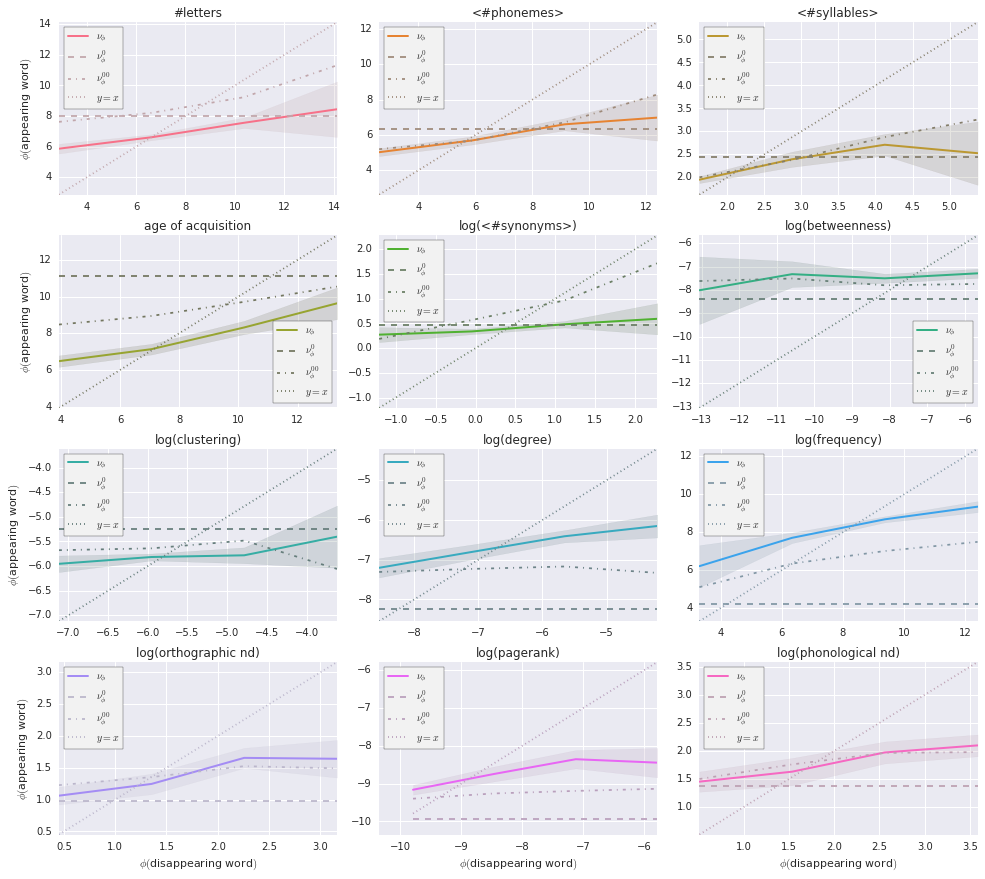

In [11]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

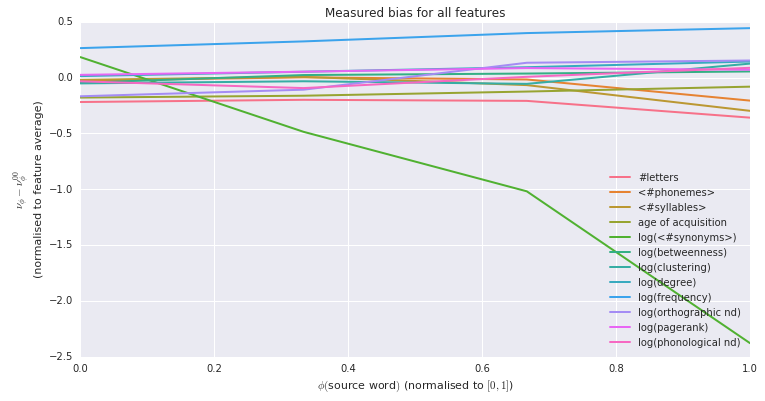

In [12]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | **  |
H_00 | *** | *** | *** | *   |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | **  | *** | *** | *   |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *   | ns. |
H_00 | *** | *** | *** | **  |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | ns. | ns. |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | *   | ns. | ns. | ns. |


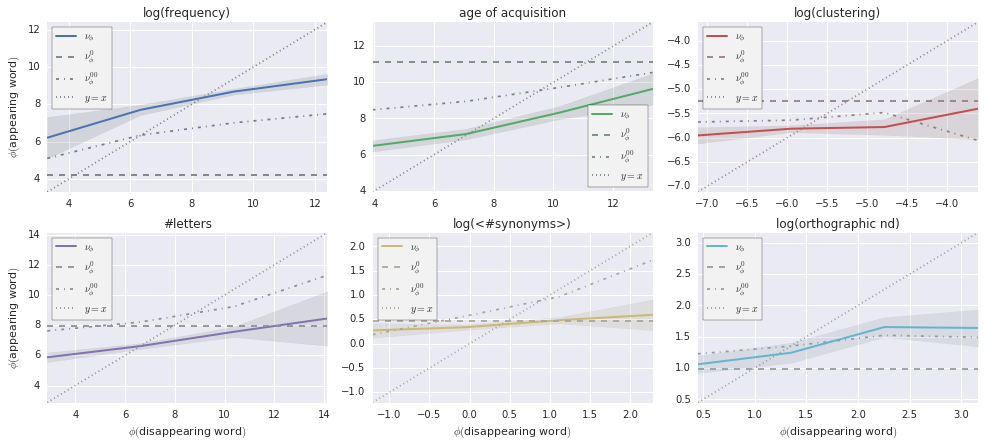

In [13]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

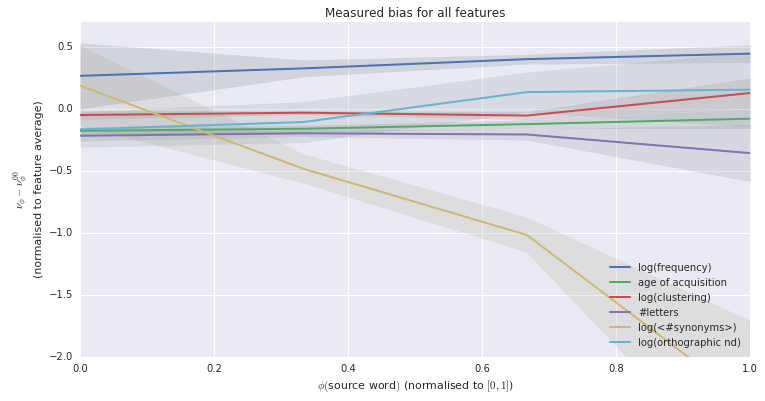

In [14]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)')\
    .set_ylim(-2, .7);

#### 2.1.2 Quantiles of distribution of appeared global feature values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | ns. |


H_00 | ns. | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |
------------------
H_0  | *** | ns. |
H_00 | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *   | **  | ns. | **  |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *   | **  |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |
H_00 | *   | ns. | *   | *   |



--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |


H_00 | ns. | ns. | ns. | ns. |


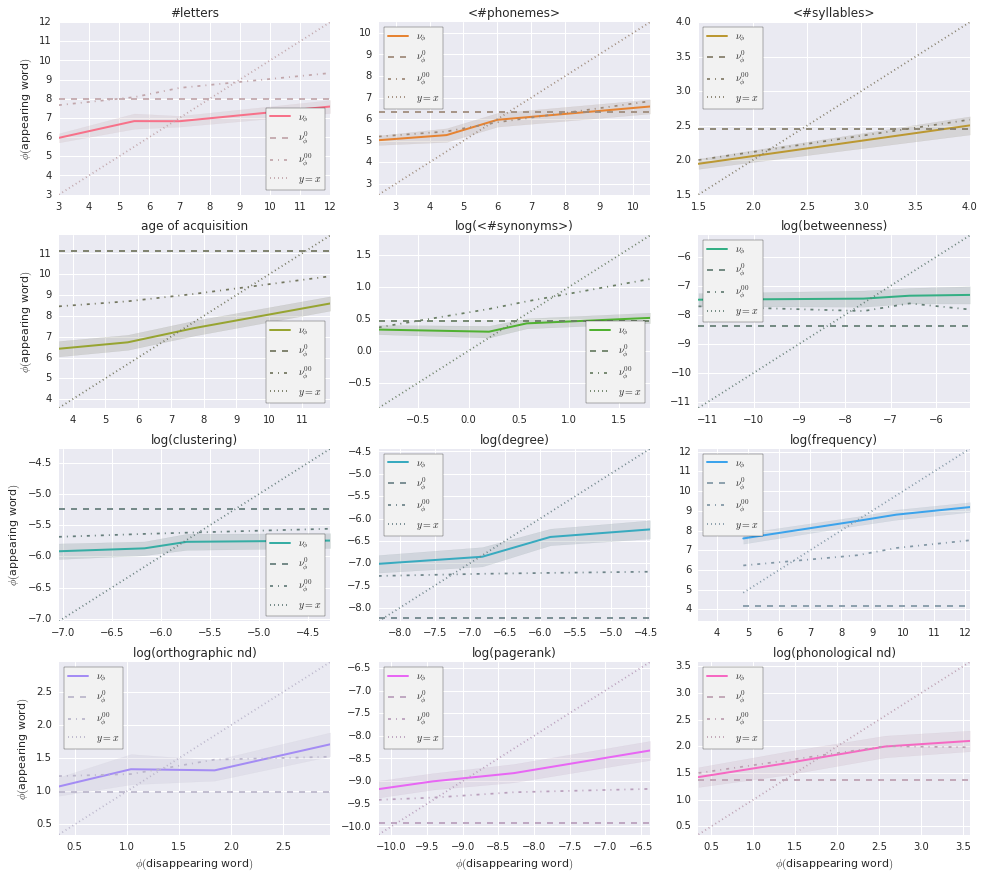

In [15]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

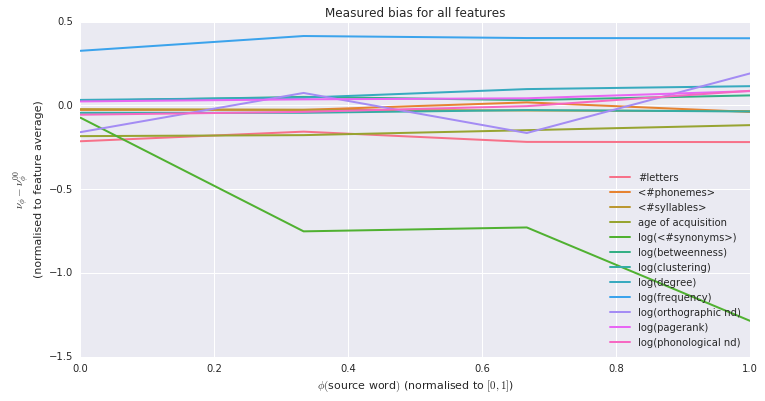

In [16]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *   | **  |



-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | *** |


H_00 | *   | ns. | *   | *   |


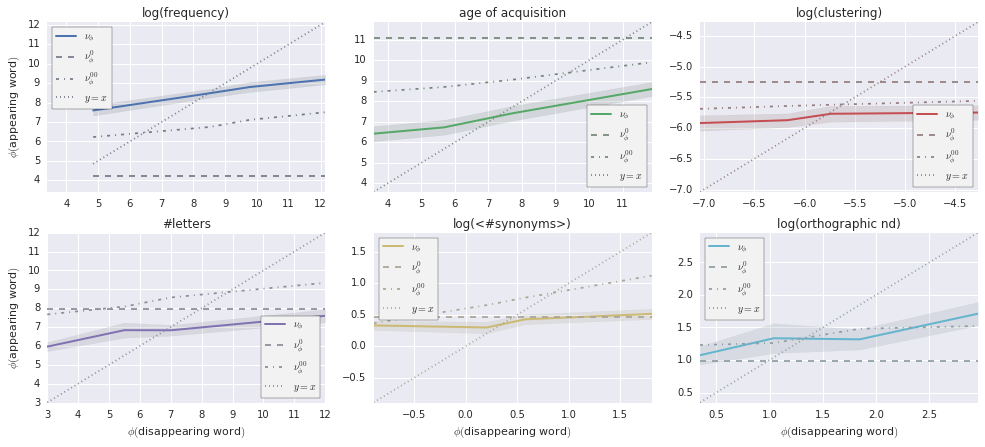

In [17]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

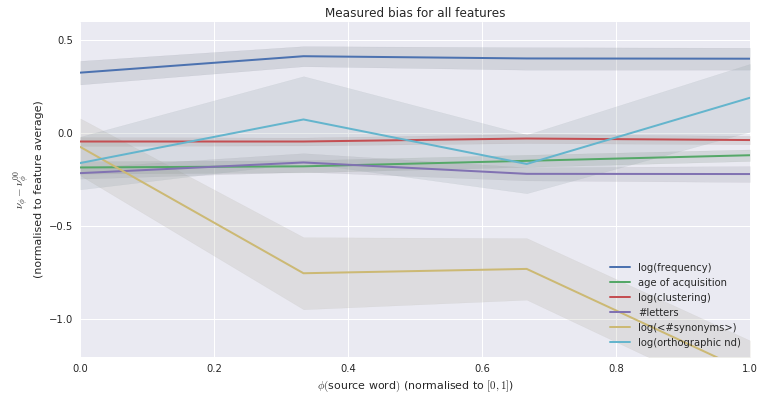

In [18]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'quantiles': True})\
    .set_ylim(-1.2, .6);

### 2.2 Sentence-relative feature values

#### 2.2.1 Bins of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |


H_00 | ns. | ns. | ns. | *   |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *** | ns. | ns. |
H_00 | ns. | ns. | ns. | **  |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | **  | ns. | ns. |
H_00 | ns. | *** | *** | *** |



-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | **  |
H_00 | ns. | *   | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |


H_00 | **  | **  | *** | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | **  |
H_00 | ns. | ns. | ns. | ns. |



--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | **  |


H_00 | ns. | ns. | ns. | ns. |


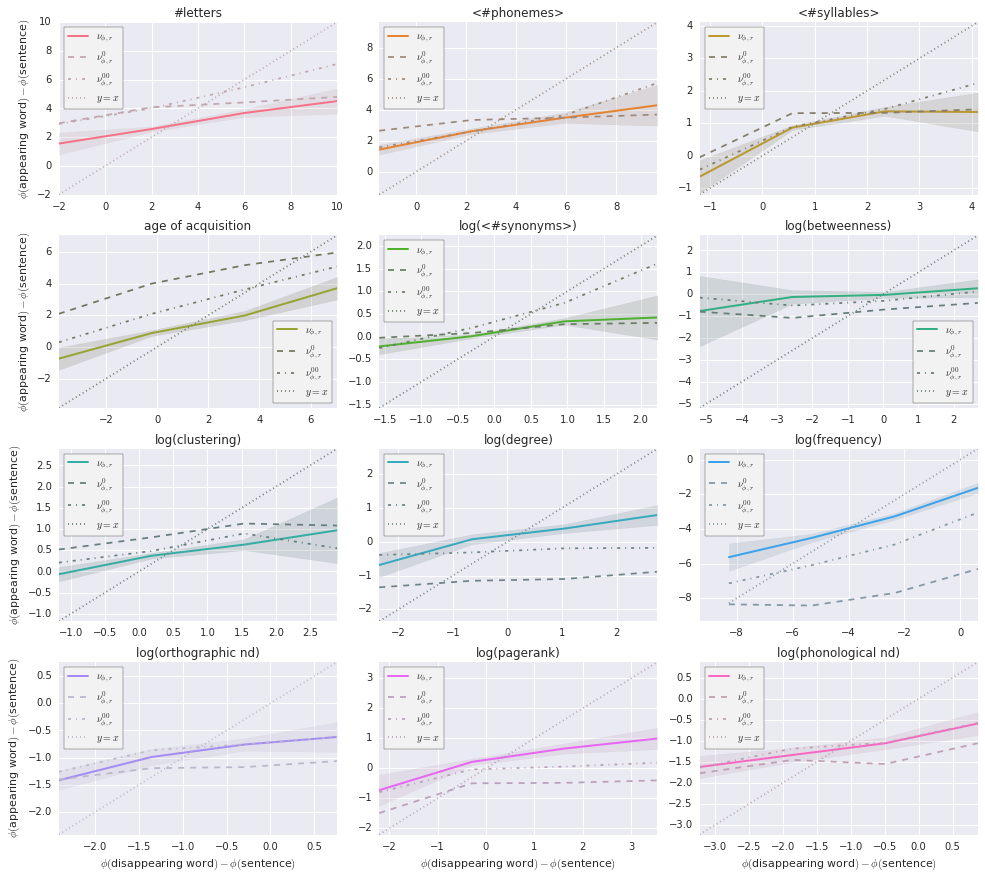

In [19]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

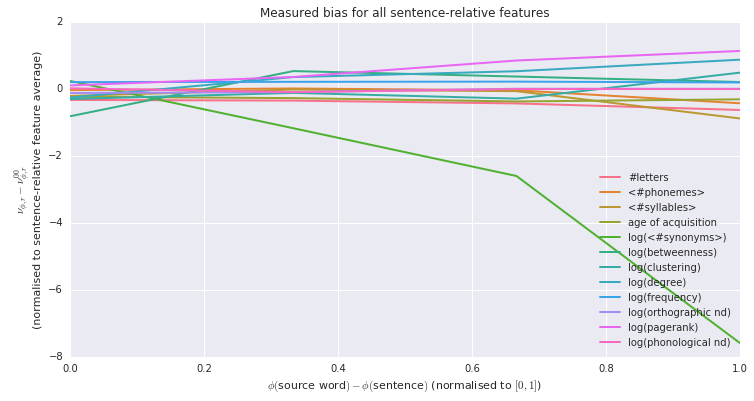

In [20]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | **  | **  | *** | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | **  | ns. | ns. |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | **  | *** | **  |
H_00 | ns. | ns. | ns. | ns. |


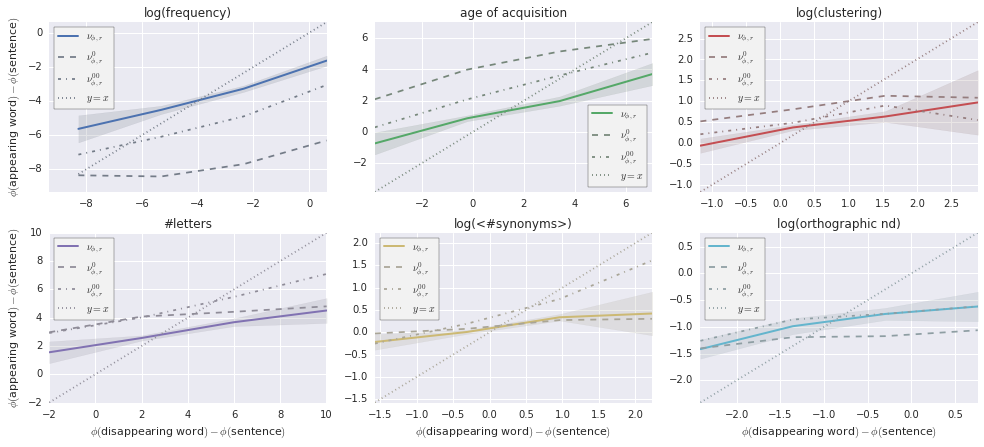

In [21]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

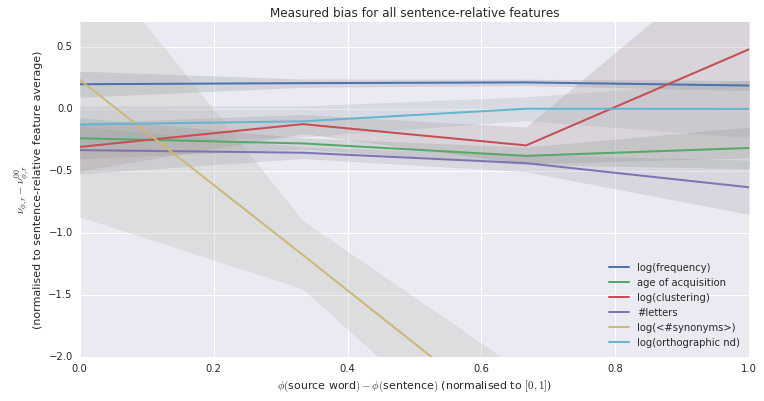

In [22]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_sentencerel',
             'deep', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True})\
    .set_ylim(-2, .7);

#### 2.2.2 Quantiles of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | ns. |


H_00 | ns. | ns. | ns. | ns. |

---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | ns. | ns. | ns. | *   |



---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | ns. | *   |
H_00 | *   | *** | *** | *** |



-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *   | ns. | **  | *   |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | ns. | ns. | *** |



------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |
H_00 | ns. | ns. | ns. | ns. |



--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | ns. | *** | *** |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |


H_00 | ns. | ns. | ns. | ns. |


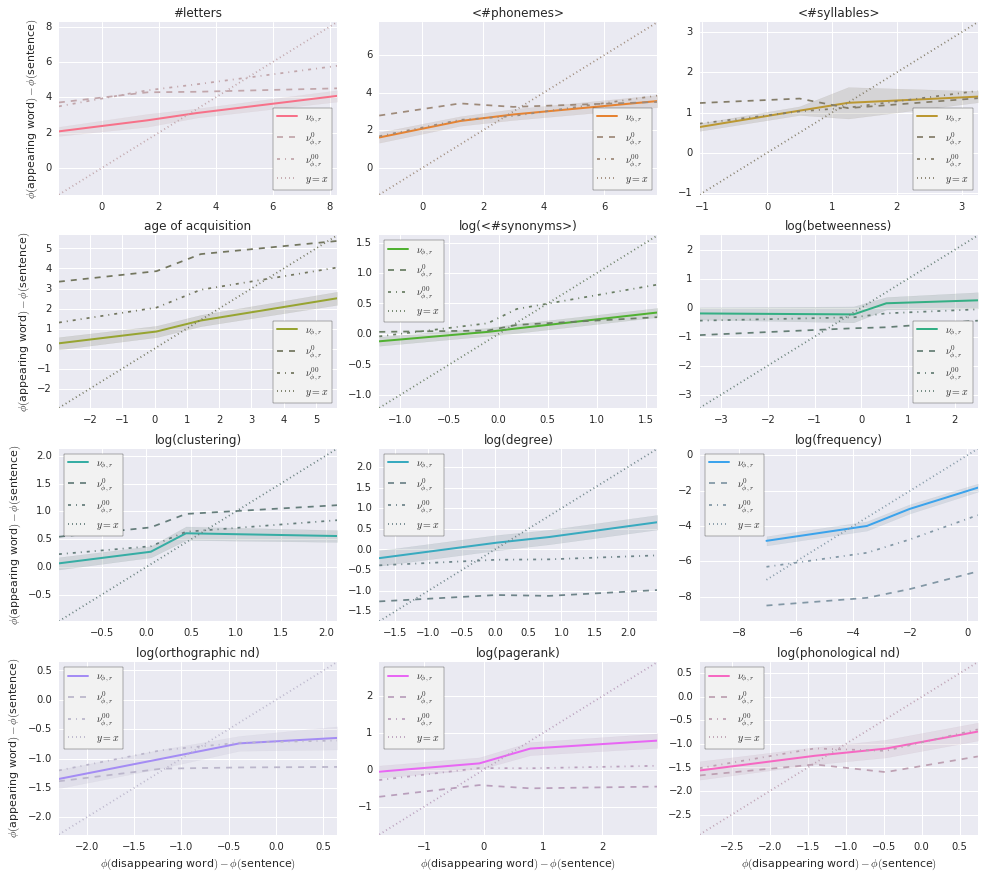

In [23]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

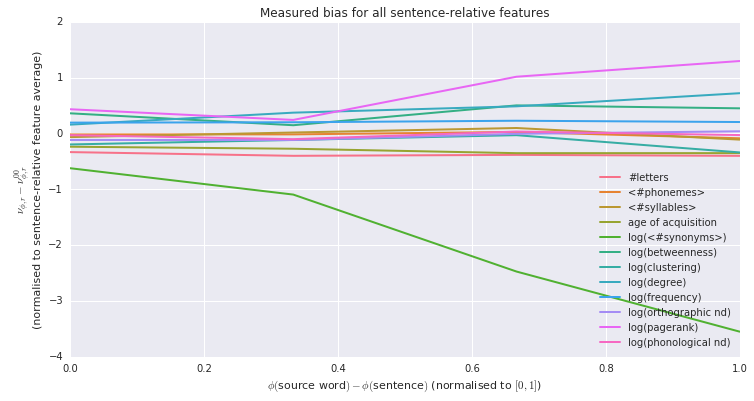

In [24]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | ns. | ns. | *** |



-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | ns. | *   |
H_00 | *   | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |


H_00 | ns. | ns. | ns. | ns. |


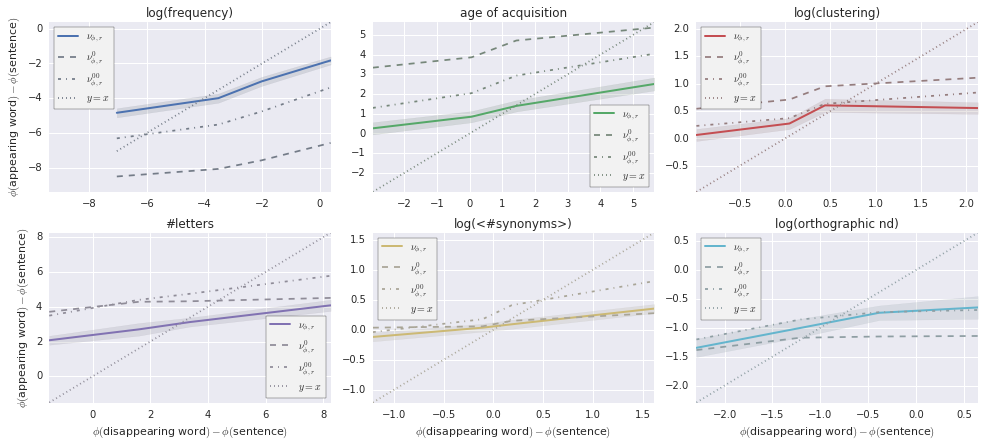

In [25]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

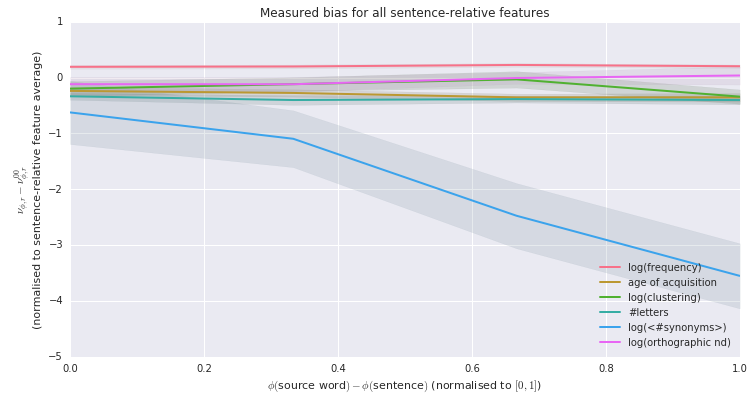

In [26]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True, 'quantiles': True});

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [27]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count,
                               right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count,
                               right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (
                dest[(x_bins == x) & (y_bins == y)] -
                source[(x_bins == x) & (y_bins == y)]
            ).mean()
            v_values[y, x] = (
                dest_rel[(x_bins == x) & (y_bins == y)] -
                source_rel[(x_bins == x) & (y_bins == y)]
            ).mean()
            strength[y, x] = np.sqrt(
                (dest[(x_bins == x) & (y_bins == y)] - 
                 source[(x_bins == x) & (y_bins == y)]) ** 2 +
                (dest_rel[(x_bins == x) & (y_bins == y)] - 
                 source_rel[(x_bins == x) & (y_bins == y)]) ** 2
            ).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), 
             label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


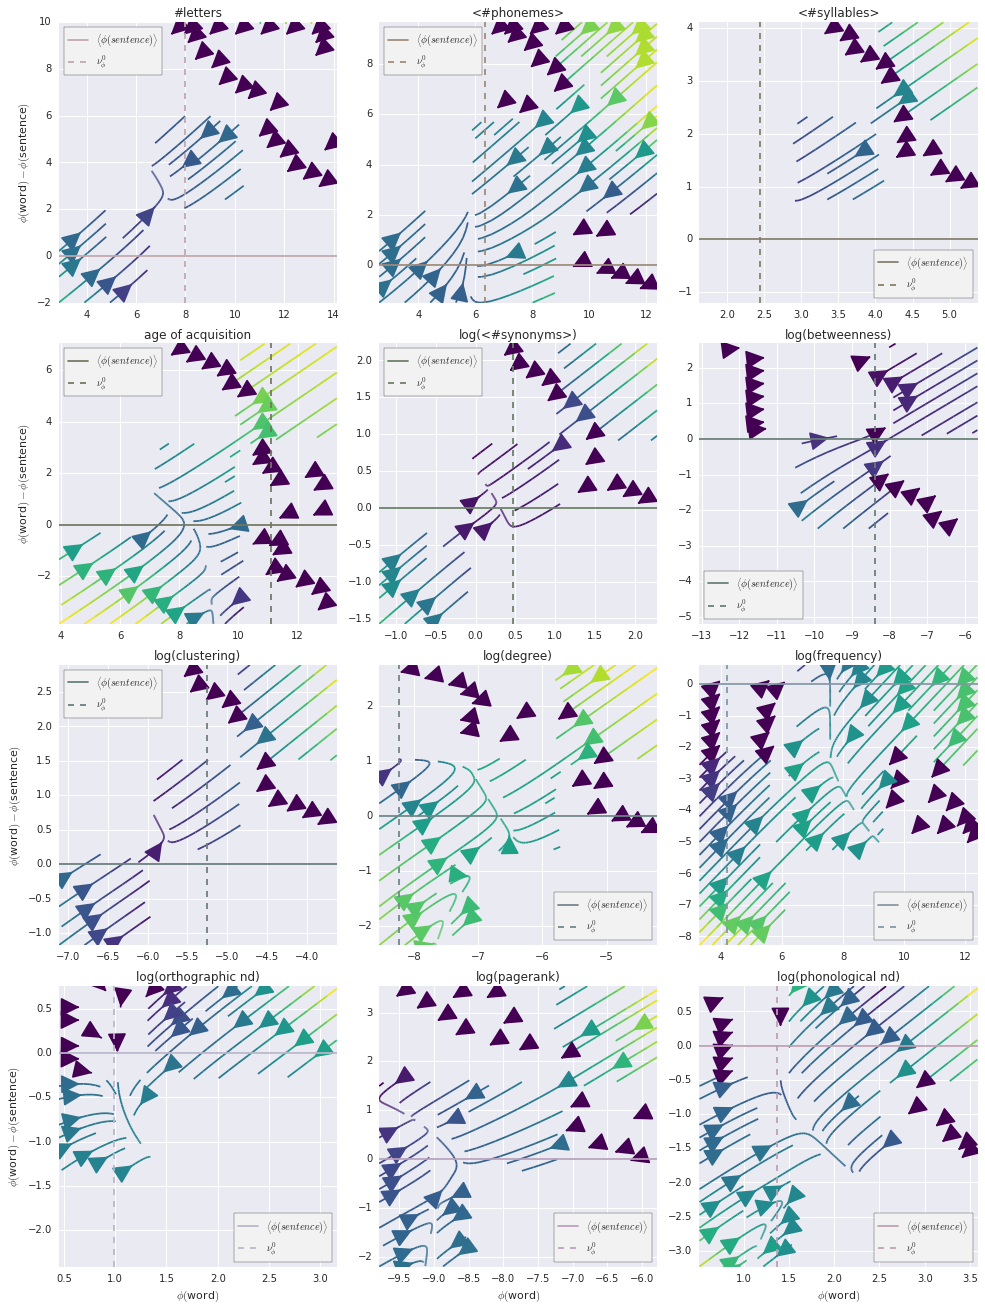

In [28]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


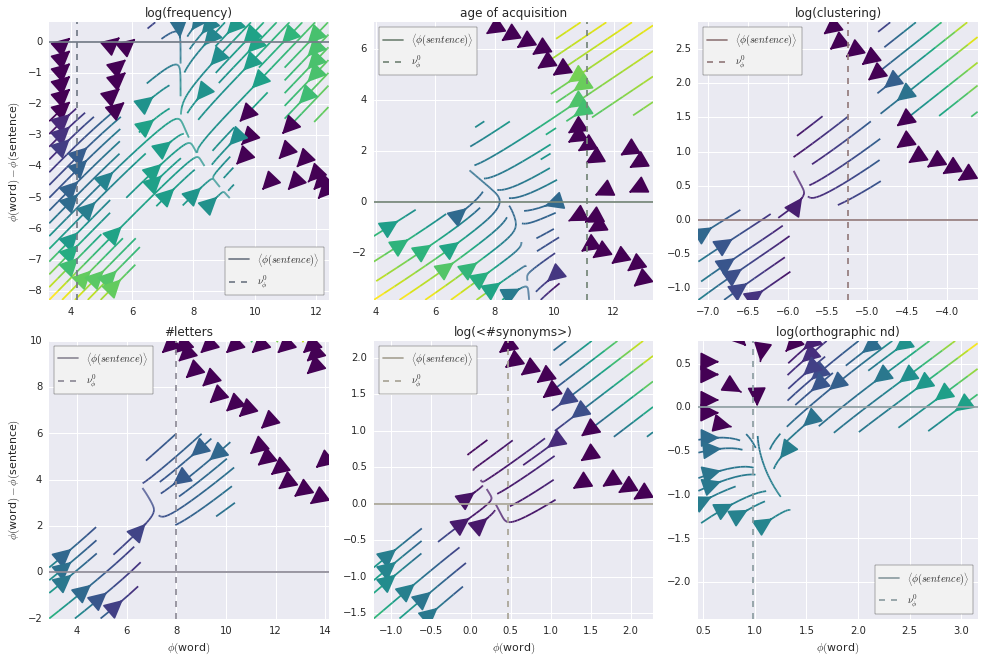

In [29]:
g = sb.FacetGrid(data=variations[variations['feature']
                                 .map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account, changing the values under the null hypotheses.

### 4.1 On all the features

Compute the actual PCA

In [30]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id',
                                 columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:"
      .format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 11 components.

Those explain the following variance:
[ 0.54225853  0.16320232  0.08232772  0.06717044  0.03678721  0.0319946
  0.02048765  0.01835907  0.01581637  0.00898108  0.00738444]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.443599,0.316367,-0.081647,0.245961,0.223270,-0.426827,0.221315,0.288217,-0.411705,0.276457,-0.161091,0.003120
Component-1,0.299908,-0.403115,0.139620,-0.275936,-0.287068,-0.417796,0.167611,-0.294412,-0.452079,0.216897,-0.169097,0.013129
Component-2,-0.685533,-0.090121,0.120051,-0.070612,-0.692904,0.088525,0.009312,-0.042703,0.062507,-0.077001,-0.007284,0.052660


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [31]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution\
                .components(component, pca, pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (    0 of 15119) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   16 of 15119) |                    | Elapsed Time: 0:00:42 ETA: 11:01:00

  0% (   38 of 15119) |                     | Elapsed Time: 0:00:42 ETA: 4:39:14

  0% (   66 of 15119) |                     | Elapsed Time: 0:00:42 ETA: 2:41:17

  0% (   92 of 15119) |                     | Elapsed Time: 0:00:42 ETA: 1:56:04

  0% (  118 of 15119) |                     | Elapsed Time: 0:00:42 ETA: 0:02:03

  0% (  144 of 15119) |                     | Elapsed Time: 0:00:43 ETA: 0:02:00

  1% (  172 of 15119) |                     | Elapsed Time: 0:00:43 ETA: 0:01:57

  1% (  204 of 15119) |                     | Elapsed Time: 0:00:43 ETA: 0:01:52

  1% (  232 of 15119) |                     | Elapsed Time: 0:00:43 ETA: 0:01:50

  1% (  260 of 15119) |                     | Elapsed Time: 0:00:43 ETA: 0:01:48

  1% (  283 of 15119) |                     | Elapsed Time: 0:00:44 ETA: 0:01:52

  2% (  303 of 15119) |                     | Elapsed Time: 0:00:44 ETA: 0:02:01

  2% (  318 of 15119) |                     | Elapsed Time: 0:00:44 ETA: 0:02:41

  2% (  328 of 15119) |                     | Elapsed Time: 0:00:44 ETA: 0:03:22

  2% (  343 of 15119) |                     | Elapsed Time: 0:00:45 ETA: 0:04:46

  2% (  378 of 15119) |                     | Elapsed Time: 0:00:45 ETA: 0:03:45

  2% (  399 of 15119) |                     | Elapsed Time: 0:00:45 ETA: 0:03:05

  2% (  421 of 15119) |                     | Elapsed Time: 0:00:45 ETA: 0:02:42

  2% (  446 of 15119) |                     | Elapsed Time: 0:00:46 ETA: 0:02:21

  3% (  471 of 15119) |                     | Elapsed Time: 0:00:46 ETA: 0:02:15

  3% (  496 of 15119) |                     | Elapsed Time: 0:00:46 ETA: 0:02:09

  3% (  520 of 15119) |                     | Elapsed Time: 0:00:46 ETA: 0:02:06

  3% (  546 of 15119) |                     | Elapsed Time: 0:00:46 ETA: 0:02:02

  3% (  578 of 15119) |                     | Elapsed Time: 0:00:47 ETA: 0:02:01

  3% (  602 of 15119) |                     | Elapsed Time: 0:00:47 ETA: 0:02:03

  4% (  627 of 15119) |                     | Elapsed Time: 0:00:47 ETA: 0:02:02

  4% (  654 of 15119) |                     | Elapsed Time: 0:00:47 ETA: 0:02:00

  4% (  682 of 15119) |                     | Elapsed Time: 0:00:48 ETA: 0:01:57

  4% (  710 of 15119) |                     | Elapsed Time: 0:00:48 ETA: 0:01:52

  4% (  739 of 15119) |#                    | Elapsed Time: 0:00:48 ETA: 0:01:48

  5% (  771 of 15119) |#                    | Elapsed Time: 0:00:48 ETA: 0:01:44

  5% (  800 of 15119) |#                    | Elapsed Time: 0:00:48 ETA: 0:01:43

  5% (  830 of 15119) |#                    | Elapsed Time: 0:00:49 ETA: 0:01:41

  5% (  859 of 15119) |#                    | Elapsed Time: 0:00:49 ETA: 0:01:41

  5% (  889 of 15119) |#                    | Elapsed Time: 0:00:49 ETA: 0:01:39

  6% (  919 of 15119) |#                    | Elapsed Time: 0:00:49 ETA: 0:01:38

  6% (  960 of 15119) |#                    | Elapsed Time: 0:00:49 ETA: 0:01:37

  6% (  990 of 15119) |#                    | Elapsed Time: 0:00:50 ETA: 0:01:37

  6% ( 1020 of 15119) |#                    | Elapsed Time: 0:00:50 ETA: 0:01:37

  6% ( 1050 of 15119) |#                    | Elapsed Time: 0:00:50 ETA: 0:01:37

  7% ( 1080 of 15119) |#                    | Elapsed Time: 0:00:50 ETA: 0:01:37

  7% ( 1111 of 15119) |#                    | Elapsed Time: 0:00:51 ETA: 0:01:36

  7% ( 1150 of 15119) |#                    | Elapsed Time: 0:00:51 ETA: 0:01:34

  7% ( 1181 of 15119) |#                    | Elapsed Time: 0:00:51 ETA: 0:01:32

  8% ( 1212 of 15119) |#                    | Elapsed Time: 0:00:51 ETA: 0:01:32

  8% ( 1244 of 15119) |#                    | Elapsed Time: 0:00:51 ETA: 0:01:30

  8% ( 1276 of 15119) |#                    | Elapsed Time: 0:00:52 ETA: 0:01:30

  8% ( 1308 of 15119) |#                    | Elapsed Time: 0:00:52 ETA: 0:01:30

  8% ( 1339 of 15119) |#                    | Elapsed Time: 0:00:52 ETA: 0:01:29

  9% ( 1371 of 15119) |#                    | Elapsed Time: 0:00:52 ETA: 0:01:29

  9% ( 1403 of 15119) |#                    | Elapsed Time: 0:00:52 ETA: 0:01:29

  9% ( 1435 of 15119) |#                    | Elapsed Time: 0:00:53 ETA: 0:01:29

  9% ( 1467 of 15119) |##                   | Elapsed Time: 0:00:53 ETA: 0:01:28

  9% ( 1497 of 15119) |##                   | Elapsed Time: 0:00:53 ETA: 0:01:29

 10% ( 1527 of 15119) |##                   | Elapsed Time: 0:00:53 ETA: 0:01:30

 10% ( 1557 of 15119) |##                   | Elapsed Time: 0:00:53 ETA: 0:01:30

 10% ( 1587 of 15119) |##                   | Elapsed Time: 0:00:54 ETA: 0:01:31

 10% ( 1617 of 15119) |##                   | Elapsed Time: 0:00:54 ETA: 0:01:31

 10% ( 1647 of 15119) |##                   | Elapsed Time: 0:00:54 ETA: 0:01:31

 11% ( 1677 of 15119) |##                   | Elapsed Time: 0:00:54 ETA: 0:01:31

 11% ( 1716 of 15119) |##                   | Elapsed Time: 0:00:55 ETA: 0:01:31

 11% ( 1746 of 15119) |##                   | Elapsed Time: 0:00:55 ETA: 0:01:31

 11% ( 1776 of 15119) |##                   | Elapsed Time: 0:00:55 ETA: 0:01:31

 11% ( 1802 of 15119) |##                   | Elapsed Time: 0:00:55 ETA: 0:01:34

 12% ( 1827 of 15119) |##                   | Elapsed Time: 0:00:55 ETA: 0:01:38

 12% ( 1852 of 15119) |##                   | Elapsed Time: 0:00:56 ETA: 0:01:44

 12% ( 1877 of 15119) |##                   | Elapsed Time: 0:00:56 ETA: 0:01:50

 12% ( 1902 of 15119) |##                   | Elapsed Time: 0:00:56 ETA: 0:01:53

 12% ( 1927 of 15119) |##                   | Elapsed Time: 0:00:56 ETA: 0:01:52

 12% ( 1952 of 15119) |##                   | Elapsed Time: 0:00:56 ETA: 0:01:52

 12% ( 1965 of 15119) |##                   | Elapsed Time: 0:00:57 ETA: 0:02:03

 13% ( 1987 of 15119) |##                   | Elapsed Time: 0:00:57 ETA: 0:02:06

 13% ( 2019 of 15119) |##                   | Elapsed Time: 0:00:57 ETA: 0:01:56

 13% ( 2045 of 15119) |##                   | Elapsed Time: 0:00:57 ETA: 0:01:54

 13% ( 2065 of 15119) |##                   | Elapsed Time: 0:00:57 ETA: 0:01:55

 13% ( 2089 of 15119) |##                   | Elapsed Time: 0:00:58 ETA: 0:01:50

 13% ( 2109 of 15119) |##                   | Elapsed Time: 0:00:58 ETA: 0:02:03

 14% ( 2128 of 15119) |##                   | Elapsed Time: 0:00:58 ETA: 0:02:21

 14% ( 2147 of 15119) |##                   | Elapsed Time: 0:00:58 ETA: 0:02:22

 14% ( 2166 of 15119) |###                  | Elapsed Time: 0:00:59 ETA: 0:02:23

 14% ( 2193 of 15119) |###                  | Elapsed Time: 0:00:59 ETA: 0:02:24

 14% ( 2212 of 15119) |###                  | Elapsed Time: 0:00:59 ETA: 0:02:24

 14% ( 2232 of 15119) |###                  | Elapsed Time: 0:00:59 ETA: 0:02:23

 14% ( 2251 of 15119) |###                  | Elapsed Time: 0:01:00 ETA: 0:02:23

 15% ( 2277 of 15119) |###                  | Elapsed Time: 0:01:00 ETA: 0:02:22

 15% ( 2288 of 15119) |###                  | Elapsed Time: 0:01:02 ETA: 0:08:34

 15% ( 2306 of 15119) |###                  | Elapsed Time: 0:01:03 ETA: 0:08:39

 15% ( 2324 of 15119) |###                  | Elapsed Time: 0:01:03 ETA: 0:08:49

 15% ( 2344 of 15119) |###                  | Elapsed Time: 0:01:03 ETA: 0:08:41

 15% ( 2371 of 15119) |###                  | Elapsed Time: 0:01:03 ETA: 0:02:08

 15% ( 2403 of 15119) |###                  | Elapsed Time: 0:01:03 ETA: 0:01:51

 16% ( 2425 of 15119) |###                  | Elapsed Time: 0:01:04 ETA: 0:01:46

 16% ( 2457 of 15119) |###                  | Elapsed Time: 0:01:04 ETA: 0:01:41

 16% ( 2479 of 15119) |###                  | Elapsed Time: 0:01:04 ETA: 0:01:42

 16% ( 2512 of 15119) |###                  | Elapsed Time: 0:01:04 ETA: 0:01:54

 16% ( 2535 of 15119) |###                  | Elapsed Time: 0:01:05 ETA: 0:01:54

 16% ( 2558 of 15119) |###                  | Elapsed Time: 0:01:05 ETA: 0:01:54

 17% ( 2582 of 15119) |###                  | Elapsed Time: 0:01:05 ETA: 0:01:54

 17% ( 2605 of 15119) |###                  | Elapsed Time: 0:01:05 ETA: 0:01:53

 17% ( 2627 of 15119) |###                  | Elapsed Time: 0:01:05 ETA: 0:01:54

 17% ( 2658 of 15119) |###                  | Elapsed Time: 0:01:06 ETA: 0:01:52

 17% ( 2680 of 15119) |###                  | Elapsed Time: 0:01:06 ETA: 0:01:52

 17% ( 2701 of 15119) |###                  | Elapsed Time: 0:01:06 ETA: 0:01:55

 18% ( 2723 of 15119) |###                  | Elapsed Time: 0:01:06 ETA: 0:01:55

 18% ( 2745 of 15119) |###                  | Elapsed Time: 0:01:07 ETA: 0:01:57

 18% ( 2772 of 15119) |###                  | Elapsed Time: 0:01:07 ETA: 0:01:53

 18% ( 2797 of 15119) |###                  | Elapsed Time: 0:01:07 ETA: 0:01:49

 18% ( 2835 of 15119) |###                  | Elapsed Time: 0:01:07 ETA: 0:01:40

 18% ( 2866 of 15119) |###                  | Elapsed Time: 0:01:07 ETA: 0:01:31

 19% ( 2897 of 15119) |####                 | Elapsed Time: 0:01:08 ETA: 0:01:28

 19% ( 2927 of 15119) |####                 | Elapsed Time: 0:01:08 ETA: 0:01:24

 19% ( 2958 of 15119) |####                 | Elapsed Time: 0:01:08 ETA: 0:01:21

 19% ( 2987 of 15119) |####                 | Elapsed Time: 0:01:08 ETA: 0:01:22

 20% ( 3024 of 15119) |####                 | Elapsed Time: 0:01:09 ETA: 0:01:21

 20% ( 3049 of 15119) |####                 | Elapsed Time: 0:01:09 ETA: 0:01:25

 20% ( 3080 of 15119) |####                 | Elapsed Time: 0:01:09 ETA: 0:01:24

 20% ( 3107 of 15119) |####                 | Elapsed Time: 0:01:09 ETA: 0:01:26

 20% ( 3139 of 15119) |####                 | Elapsed Time: 0:01:09 ETA: 0:01:25

 20% ( 3170 of 15119) |####                 | Elapsed Time: 0:01:10 ETA: 0:01:22

 21% ( 3196 of 15119) |####                 | Elapsed Time: 0:01:10 ETA: 0:01:24

 21% ( 3228 of 15119) |####                 | Elapsed Time: 0:01:10 ETA: 0:01:25

 21% ( 3259 of 15119) |####                 | Elapsed Time: 0:01:10 ETA: 0:01:23

 21% ( 3292 of 15119) |####                 | Elapsed Time: 0:01:10 ETA: 0:01:22

 22% ( 3328 of 15119) |####                 | Elapsed Time: 0:01:11 ETA: 0:01:17

 22% ( 3361 of 15119) |####                 | Elapsed Time: 0:01:11 ETA: 0:01:13

 22% ( 3402 of 15119) |####                 | Elapsed Time: 0:01:11 ETA: 0:01:11

 22% ( 3436 of 15119) |####                 | Elapsed Time: 0:01:11 ETA: 0:01:09

 22% ( 3470 of 15119) |####                 | Elapsed Time: 0:01:12 ETA: 0:01:10

 23% ( 3503 of 15119) |####                 | Elapsed Time: 0:01:12 ETA: 0:01:10

 23% ( 3537 of 15119) |####                 | Elapsed Time: 0:01:12 ETA: 0:01:10

 23% ( 3571 of 15119) |####                 | Elapsed Time: 0:01:12 ETA: 0:01:10

 23% ( 3606 of 15119) |#####                | Elapsed Time: 0:01:12 ETA: 0:01:16

 24% ( 3635 of 15119) |#####                | Elapsed Time: 0:01:13 ETA: 0:01:19

 24% ( 3655 of 15119) |#####                | Elapsed Time: 0:01:13 ETA: 0:01:27

 24% ( 3675 of 15119) |#####                | Elapsed Time: 0:01:13 ETA: 0:01:38

 24% ( 3695 of 15119) |#####                | Elapsed Time: 0:01:13 ETA: 0:01:46

 24% ( 3715 of 15119) |#####                | Elapsed Time: 0:01:13 ETA: 0:01:55

 24% ( 3734 of 15119) |#####                | Elapsed Time: 0:01:14 ETA: 0:02:02

 24% ( 3754 of 15119) |#####                | Elapsed Time: 0:01:14 ETA: 0:02:02

 25% ( 3780 of 15119) |#####                | Elapsed Time: 0:01:14 ETA: 0:02:01

 25% ( 3800 of 15119) |#####                | Elapsed Time: 0:01:14 ETA: 0:02:00

 25% ( 3812 of 15119) |#####                | Elapsed Time: 0:01:15 ETA: 0:02:12

 25% ( 3844 of 15119) |#####                | Elapsed Time: 0:01:15 ETA: 0:01:54

 25% ( 3876 of 15119) |#####                | Elapsed Time: 0:01:15 ETA: 0:01:41

 25% ( 3902 of 15119) |#####                | Elapsed Time: 0:01:15 ETA: 0:01:35

 25% ( 3929 of 15119) |#####                | Elapsed Time: 0:01:15 ETA: 0:01:26

 26% ( 3955 of 15119) |#####                | Elapsed Time: 0:01:16 ETA: 0:01:22

 26% ( 3979 of 15119) |#####                | Elapsed Time: 0:01:16 ETA: 0:01:32

 26% ( 3999 of 15119) |#####                | Elapsed Time: 0:01:16 ETA: 0:01:41

 26% ( 4023 of 15119) |#####                | Elapsed Time: 0:01:16 ETA: 0:01:41

 26% ( 4041 of 15119) |#####                | Elapsed Time: 0:01:17 ETA: 0:01:50

 26% ( 4061 of 15119) |#####                | Elapsed Time: 0:01:17 ETA: 0:01:54

 27% ( 4085 of 15119) |#####                | Elapsed Time: 0:01:17 ETA: 0:01:49

 27% ( 4109 of 15119) |#####                | Elapsed Time: 0:01:17 ETA: 0:01:44

 27% ( 4132 of 15119) |#####                | Elapsed Time: 0:01:17 ETA: 0:01:45

 27% ( 4173 of 15119) |#####                | Elapsed Time: 0:01:18 ETA: 0:01:27

 27% ( 4202 of 15119) |#####                | Elapsed Time: 0:01:18 ETA: 0:01:24

 28% ( 4234 of 15119) |#####                | Elapsed Time: 0:01:18 ETA: 0:01:19

 28% ( 4264 of 15119) |#####                | Elapsed Time: 0:01:18 ETA: 0:01:14

 28% ( 4286 of 15119) |#####                | Elapsed Time: 0:01:18 ETA: 0:01:17

 28% ( 4306 of 15119) |#####                | Elapsed Time: 0:01:19 ETA: 0:01:23

 28% ( 4330 of 15119) |######               | Elapsed Time: 0:01:19 ETA: 0:01:29

 28% ( 4362 of 15119) |######               | Elapsed Time: 0:01:19 ETA: 0:01:33

 28% ( 4379 of 15119) |######               | Elapsed Time: 0:01:19 ETA: 0:01:42

 29% ( 4395 of 15119) |######               | Elapsed Time: 0:01:20 ETA: 0:01:46

 29% ( 4412 of 15119) |######               | Elapsed Time: 0:01:20 ETA: 0:01:50

 29% ( 4428 of 15119) |######               | Elapsed Time: 0:01:20 ETA: 0:01:59

 29% ( 4446 of 15119) |######               | Elapsed Time: 0:01:20 ETA: 0:02:13

 29% ( 4476 of 15119) |######               | Elapsed Time: 0:01:20 ETA: 0:01:53

 29% ( 4502 of 15119) |######               | Elapsed Time: 0:01:21 ETA: 0:01:43

 29% ( 4522 of 15119) |######               | Elapsed Time: 0:01:21 ETA: 0:01:38

 30% ( 4548 of 15119) |######               | Elapsed Time: 0:01:21 ETA: 0:01:33

 30% ( 4574 of 15119) |######               | Elapsed Time: 0:01:21 ETA: 0:01:31

 30% ( 4603 of 15119) |######               | Elapsed Time: 0:01:22 ETA: 0:01:30

 30% ( 4625 of 15119) |######               | Elapsed Time: 0:01:22 ETA: 0:01:30

 30% ( 4647 of 15119) |######               | Elapsed Time: 0:01:22 ETA: 0:01:29

 30% ( 4669 of 15119) |######               | Elapsed Time: 0:01:22 ETA: 0:01:30

 31% ( 4700 of 15119) |######               | Elapsed Time: 0:01:22 ETA: 0:01:28

 31% ( 4739 of 15119) |######               | Elapsed Time: 0:01:23 ETA: 0:01:23

 31% ( 4767 of 15119) |######               | Elapsed Time: 0:01:23 ETA: 0:01:19

 31% ( 4801 of 15119) |######               | Elapsed Time: 0:01:23 ETA: 0:01:12

 31% ( 4828 of 15119) |######               | Elapsed Time: 0:01:23 ETA: 0:01:10

 32% ( 4858 of 15119) |######               | Elapsed Time: 0:01:23 ETA: 0:01:11

 32% ( 4889 of 15119) |######               | Elapsed Time: 0:01:24 ETA: 0:01:09

 32% ( 4928 of 15119) |######               | Elapsed Time: 0:01:24 ETA: 0:01:11

 32% ( 4960 of 15119) |######               | Elapsed Time: 0:01:24 ETA: 0:01:10

 33% ( 4991 of 15119) |######               | Elapsed Time: 0:01:24 ETA: 0:01:09

 33% ( 5018 of 15119) |######               | Elapsed Time: 0:01:25 ETA: 0:01:12

 33% ( 5030 of 15119) |######               | Elapsed Time: 0:01:25 ETA: 0:01:22

 33% ( 5045 of 15119) |#######              | Elapsed Time: 0:01:25 ETA: 0:01:36

 33% ( 5063 of 15119) |#######              | Elapsed Time: 0:01:25 ETA: 0:01:51

 33% ( 5083 of 15119) |#######              | Elapsed Time: 0:01:25 ETA: 0:02:07

 33% ( 5117 of 15119) |#######              | Elapsed Time: 0:01:26 ETA: 0:01:48

 34% ( 5150 of 15119) |#######              | Elapsed Time: 0:01:26 ETA: 0:01:26

 34% ( 5178 of 15119) |#######              | Elapsed Time: 0:01:26 ETA: 0:01:20

 34% ( 5205 of 15119) |#######              | Elapsed Time: 0:01:26 ETA: 0:01:20

 34% ( 5223 of 15119) |#######              | Elapsed Time: 0:01:27 ETA: 0:01:26

 34% ( 5241 of 15119) |#######              | Elapsed Time: 0:01:27 ETA: 0:01:40

 34% ( 5268 of 15119) |#######              | Elapsed Time: 0:01:27 ETA: 0:01:50

 35% ( 5306 of 15119) |#######              | Elapsed Time: 0:01:27 ETA: 0:01:38

 35% ( 5336 of 15119) |#######              | Elapsed Time: 0:01:28 ETA: 0:01:27

 35% ( 5371 of 15119) |#######              | Elapsed Time: 0:01:28 ETA: 0:01:16

 35% ( 5406 of 15119) |#######              | Elapsed Time: 0:01:28 ETA: 0:01:07

 35% ( 5432 of 15119) |#######              | Elapsed Time: 0:01:28 ETA: 0:01:05

 36% ( 5457 of 15119) |#######              | Elapsed Time: 0:01:28 ETA: 0:01:05

 36% ( 5498 of 15119) |#######              | Elapsed Time: 0:01:29 ETA: 0:01:05

 36% ( 5529 of 15119) |#######              | Elapsed Time: 0:01:29 ETA: 0:01:07

 36% ( 5552 of 15119) |#######              | Elapsed Time: 0:01:29 ETA: 0:01:12

 36% ( 5573 of 15119) |#######              | Elapsed Time: 0:01:29 ETA: 0:01:13

 37% ( 5601 of 15119) |#######              | Elapsed Time: 0:01:30 ETA: 0:01:14

 37% ( 5626 of 15119) |#######              | Elapsed Time: 0:01:30 ETA: 0:01:20

 37% ( 5650 of 15119) |#######              | Elapsed Time: 0:01:30 ETA: 0:01:24

 37% ( 5682 of 15119) |#######              | Elapsed Time: 0:01:30 ETA: 0:01:19

 37% ( 5705 of 15119) |#######              | Elapsed Time: 0:01:30 ETA: 0:01:21

 37% ( 5729 of 15119) |#######              | Elapsed Time: 0:01:31 ETA: 0:01:24

 38% ( 5752 of 15119) |#######              | Elapsed Time: 0:01:31 ETA: 0:01:24

 38% ( 5775 of 15119) |########             | Elapsed Time: 0:01:31 ETA: 0:01:24

 38% ( 5799 of 15119) |########             | Elapsed Time: 0:01:31 ETA: 0:01:24

 38% ( 5823 of 15119) |########             | Elapsed Time: 0:01:32 ETA: 0:01:23

 38% ( 5845 of 15119) |########             | Elapsed Time: 0:01:32 ETA: 0:01:24

 38% ( 5870 of 15119) |########             | Elapsed Time: 0:01:32 ETA: 0:01:25

 39% ( 5897 of 15119) |########             | Elapsed Time: 0:01:32 ETA: 0:01:21

 39% ( 5921 of 15119) |########             | Elapsed Time: 0:01:32 ETA: 0:01:20

 39% ( 5944 of 15119) |########             | Elapsed Time: 0:01:33 ETA: 0:01:20

 39% ( 5965 of 15119) |########             | Elapsed Time: 0:01:33 ETA: 0:01:20

 39% ( 5987 of 15119) |########             | Elapsed Time: 0:01:33 ETA: 0:01:21

 39% ( 6009 of 15119) |########             | Elapsed Time: 0:01:33 ETA: 0:01:26

 39% ( 6031 of 15119) |########             | Elapsed Time: 0:01:33 ETA: 0:01:26

 40% ( 6059 of 15119) |########             | Elapsed Time: 0:01:34 ETA: 0:01:25

 40% ( 6081 of 15119) |########             | Elapsed Time: 0:01:34 ETA: 0:01:25

 40% ( 6103 of 15119) |########             | Elapsed Time: 0:01:34 ETA: 0:01:24

 40% ( 6125 of 15119) |########             | Elapsed Time: 0:01:34 ETA: 0:01:23

 40% ( 6147 of 15119) |########             | Elapsed Time: 0:01:35 ETA: 0:01:23

 40% ( 6170 of 15119) |########             | Elapsed Time: 0:01:35 ETA: 0:01:23

 40% ( 6192 of 15119) |########             | Elapsed Time: 0:01:35 ETA: 0:01:23

 41% ( 6214 of 15119) |########             | Elapsed Time: 0:01:35 ETA: 0:01:22

 41% ( 6237 of 15119) |########             | Elapsed Time: 0:01:35 ETA: 0:01:22

 41% ( 6260 of 15119) |########             | Elapsed Time: 0:01:36 ETA: 0:01:21

 41% ( 6288 of 15119) |########             | Elapsed Time: 0:01:36 ETA: 0:01:16

 41% ( 6332 of 15119) |########             | Elapsed Time: 0:01:36 ETA: 0:01:08

 42% ( 6359 of 15119) |########             | Elapsed Time: 0:01:36 ETA: 0:01:05

 42% ( 6389 of 15119) |########             | Elapsed Time: 0:01:36 ETA: 0:01:02

 42% ( 6426 of 15119) |########             | Elapsed Time: 0:01:37 ETA: 0:01:00

 42% ( 6453 of 15119) |########             | Elapsed Time: 0:01:37 ETA: 0:01:01

 42% ( 6478 of 15119) |########             | Elapsed Time: 0:01:37 ETA: 0:01:03

 43% ( 6505 of 15119) |#########            | Elapsed Time: 0:01:37 ETA: 0:01:04

 43% ( 6537 of 15119) |#########            | Elapsed Time: 0:01:38 ETA: 0:01:04

 43% ( 6569 of 15119) |#########            | Elapsed Time: 0:01:38 ETA: 0:01:01

 43% ( 6597 of 15119) |#########            | Elapsed Time: 0:01:38 ETA: 0:01:00

 43% ( 6628 of 15119) |#########            | Elapsed Time: 0:01:38 ETA: 0:00:59

 44% ( 6653 of 15119) |#########            | Elapsed Time: 0:01:38 ETA: 0:01:01

 44% ( 6675 of 15119) |#########            | Elapsed Time: 0:01:39 ETA: 0:01:06

 44% ( 6697 of 15119) |#########            | Elapsed Time: 0:01:39 ETA: 0:01:11

 44% ( 6720 of 15119) |#########            | Elapsed Time: 0:01:39 ETA: 0:01:14

 44% ( 6744 of 15119) |#########            | Elapsed Time: 0:01:39 ETA: 0:01:16

 44% ( 6768 of 15119) |#########            | Elapsed Time: 0:01:39 ETA: 0:01:15

 44% ( 6792 of 15119) |#########            | Elapsed Time: 0:01:40 ETA: 0:01:13

 45% ( 6816 of 15119) |#########            | Elapsed Time: 0:01:40 ETA: 0:01:11

 45% ( 6843 of 15119) |#########            | Elapsed Time: 0:01:40 ETA: 0:01:09

 45% ( 6876 of 15119) |#########            | Elapsed Time: 0:01:40 ETA: 0:01:04

 45% ( 6909 of 15119) |#########            | Elapsed Time: 0:01:41 ETA: 0:00:59

 45% ( 6939 of 15119) |#########            | Elapsed Time: 0:01:41 ETA: 0:00:56

 46% ( 6966 of 15119) |#########            | Elapsed Time: 0:01:41 ETA: 0:00:54

 46% ( 6993 of 15119) |#########            | Elapsed Time: 0:01:41 ETA: 0:00:56

 46% ( 7024 of 15119) |#########            | Elapsed Time: 0:01:41 ETA: 0:00:57

 46% ( 7059 of 15119) |#########            | Elapsed Time: 0:01:42 ETA: 0:00:56

 46% ( 7077 of 15119) |#########            | Elapsed Time: 0:01:42 ETA: 0:01:01

 46% ( 7099 of 15119) |#########            | Elapsed Time: 0:01:42 ETA: 0:01:04

 47% ( 7127 of 15119) |#########            | Elapsed Time: 0:01:42 ETA: 0:01:02

 47% ( 7151 of 15119) |#########            | Elapsed Time: 0:01:42 ETA: 0:01:08

 47% ( 7182 of 15119) |#########            | Elapsed Time: 0:01:43 ETA: 0:01:06

 47% ( 7211 of 15119) |##########           | Elapsed Time: 0:01:43 ETA: 0:01:00

 47% ( 7235 of 15119) |##########           | Elapsed Time: 0:01:43 ETA: 0:01:02

 47% ( 7254 of 15119) |##########           | Elapsed Time: 0:01:43 ETA: 0:01:05

 48% ( 7277 of 15119) |##########           | Elapsed Time: 0:01:43 ETA: 0:01:07

 48% ( 7308 of 15119) |##########           | Elapsed Time: 0:01:44 ETA: 0:01:05

 48% ( 7340 of 15119) |##########           | Elapsed Time: 0:01:44 ETA: 0:01:02

 48% ( 7371 of 15119) |##########           | Elapsed Time: 0:01:44 ETA: 0:00:59

 48% ( 7397 of 15119) |##########           | Elapsed Time: 0:01:44 ETA: 0:00:55

 49% ( 7422 of 15119) |##########           | Elapsed Time: 0:01:45 ETA: 0:00:57

 49% ( 7447 of 15119) |##########           | Elapsed Time: 0:01:45 ETA: 0:01:00

 49% ( 7471 of 15119) |##########           | Elapsed Time: 0:01:45 ETA: 0:01:04

 49% ( 7495 of 15119) |##########           | Elapsed Time: 0:01:45 ETA: 0:01:04

 49% ( 7520 of 15119) |##########           | Elapsed Time: 0:01:45 ETA: 0:01:04

 49% ( 7545 of 15119) |##########           | Elapsed Time: 0:01:46 ETA: 0:01:04

 50% ( 7568 of 15119) |##########           | Elapsed Time: 0:01:46 ETA: 0:01:08

 50% ( 7584 of 15119) |##########           | Elapsed Time: 0:01:46 ETA: 0:01:15

 50% ( 7602 of 15119) |##########           | Elapsed Time: 0:01:46 ETA: 0:01:21

 50% ( 7626 of 15119) |##########           | Elapsed Time: 0:01:47 ETA: 0:01:22

 50% ( 7652 of 15119) |##########           | Elapsed Time: 0:01:47 ETA: 0:01:20

 50% ( 7674 of 15119) |##########           | Elapsed Time: 0:01:47 ETA: 0:01:13

 50% ( 7694 of 15119) |##########           | Elapsed Time: 0:01:47 ETA: 0:01:09

 51% ( 7724 of 15119) |##########           | Elapsed Time: 0:01:47 ETA: 0:01:03

 51% ( 7764 of 15119) |##########           | Elapsed Time: 0:01:48 ETA: 0:00:57

 51% ( 7785 of 15119) |##########           | Elapsed Time: 0:01:48 ETA: 0:00:58

 51% ( 7808 of 15119) |##########           | Elapsed Time: 0:01:48 ETA: 0:00:58

 51% ( 7836 of 15119) |##########           | Elapsed Time: 0:01:48 ETA: 0:00:55

 52% ( 7864 of 15119) |##########           | Elapsed Time: 0:01:48 ETA: 0:00:58

 52% ( 7892 of 15119) |##########           | Elapsed Time: 0:01:49 ETA: 0:00:59

 52% ( 7920 of 15119) |###########          | Elapsed Time: 0:01:49 ETA: 0:00:52

 52% ( 7954 of 15119) |###########          | Elapsed Time: 0:01:49 ETA: 0:00:51

 52% ( 7984 of 15119) |###########          | Elapsed Time: 0:01:49 ETA: 0:00:50

 52% ( 8009 of 15119) |###########          | Elapsed Time: 0:01:49 ETA: 0:00:51

 53% ( 8036 of 15119) |###########          | Elapsed Time: 0:01:50 ETA: 0:00:51

 53% ( 8062 of 15119) |###########          | Elapsed Time: 0:01:50 ETA: 0:00:52

 53% ( 8096 of 15119) |###########          | Elapsed Time: 0:01:50 ETA: 0:00:51

 53% ( 8127 of 15119) |###########          | Elapsed Time: 0:01:50 ETA: 0:00:49

 53% ( 8153 of 15119) |###########          | Elapsed Time: 0:01:51 ETA: 0:00:50

 54% ( 8179 of 15119) |###########          | Elapsed Time: 0:01:51 ETA: 0:00:50

 54% ( 8200 of 15119) |###########          | Elapsed Time: 0:01:51 ETA: 0:00:54

 54% ( 8225 of 15119) |###########          | Elapsed Time: 0:01:51 ETA: 0:00:57

 54% ( 8254 of 15119) |###########          | Elapsed Time: 0:01:51 ETA: 0:00:56

 54% ( 8280 of 15119) |###########          | Elapsed Time: 0:01:52 ETA: 0:00:56

 55% ( 8316 of 15119) |###########          | Elapsed Time: 0:01:52 ETA: 0:00:56

 55% ( 8335 of 15119) |###########          | Elapsed Time: 0:01:52 ETA: 0:00:55

 55% ( 8354 of 15119) |###########          | Elapsed Time: 0:01:52 ETA: 0:01:02

 55% ( 8377 of 15119) |###########          | Elapsed Time: 0:01:53 ETA: 0:01:03

 55% ( 8402 of 15119) |###########          | Elapsed Time: 0:01:53 ETA: 0:01:04

 55% ( 8427 of 15119) |###########          | Elapsed Time: 0:01:53 ETA: 0:01:02

 55% ( 8457 of 15119) |###########          | Elapsed Time: 0:01:53 ETA: 0:00:56

 56% ( 8484 of 15119) |###########          | Elapsed Time: 0:01:53 ETA: 0:00:52

 56% ( 8521 of 15119) |###########          | Elapsed Time: 0:01:54 ETA: 0:00:48

 56% ( 8548 of 15119) |###########          | Elapsed Time: 0:01:54 ETA: 0:00:48

 56% ( 8573 of 15119) |###########          | Elapsed Time: 0:01:54 ETA: 0:00:48

 56% ( 8601 of 15119) |###########          | Elapsed Time: 0:01:54 ETA: 0:00:48

 57% ( 8629 of 15119) |###########          | Elapsed Time: 0:01:54 ETA: 0:00:48

 57% ( 8652 of 15119) |############         | Elapsed Time: 0:01:55 ETA: 0:00:51

 57% ( 8672 of 15119) |############         | Elapsed Time: 0:01:55 ETA: 0:00:53

 57% ( 8706 of 15119) |############         | Elapsed Time: 0:01:55 ETA: 0:00:53

 57% ( 8735 of 15119) |############         | Elapsed Time: 0:01:55 ETA: 0:00:54

 57% ( 8760 of 15119) |############         | Elapsed Time: 0:01:56 ETA: 0:00:52

 58% ( 8789 of 15119) |############         | Elapsed Time: 0:01:56 ETA: 0:00:49

 58% ( 8822 of 15119) |############         | Elapsed Time: 0:01:56 ETA: 0:00:46

 58% ( 8840 of 15119) |############         | Elapsed Time: 0:01:56 ETA: 0:00:50

 58% ( 8883 of 15119) |############         | Elapsed Time: 0:01:56 ETA: 0:00:48

 58% ( 8913 of 15119) |############         | Elapsed Time: 0:01:57 ETA: 0:00:45

 59% ( 8939 of 15119) |############         | Elapsed Time: 0:01:57 ETA: 0:00:47

 59% ( 8964 of 15119) |############         | Elapsed Time: 0:01:57 ETA: 0:00:48

 59% ( 8988 of 15119) |############         | Elapsed Time: 0:01:57 ETA: 0:00:46

 59% ( 9012 of 15119) |############         | Elapsed Time: 0:01:58 ETA: 0:00:51

 59% ( 9042 of 15119) |############         | Elapsed Time: 0:01:58 ETA: 0:00:49

 60% ( 9072 of 15119) |############         | Elapsed Time: 0:01:58 ETA: 0:00:50

 60% ( 9100 of 15119) |############         | Elapsed Time: 0:01:58 ETA: 0:00:47

 60% ( 9134 of 15119) |############         | Elapsed Time: 0:01:58 ETA: 0:00:43

 60% ( 9155 of 15119) |############         | Elapsed Time: 0:01:59 ETA: 0:00:45

 60% ( 9180 of 15119) |############         | Elapsed Time: 0:01:59 ETA: 0:00:45

 60% ( 9213 of 15119) |############         | Elapsed Time: 0:01:59 ETA: 0:00:43

 61% ( 9261 of 15119) |############         | Elapsed Time: 0:01:59 ETA: 0:00:41

 61% ( 9297 of 15119) |############         | Elapsed Time: 0:01:59 ETA: 0:00:37

 61% ( 9318 of 15119) |############         | Elapsed Time: 0:02:00 ETA: 0:00:37

 61% ( 9336 of 15119) |############         | Elapsed Time: 0:02:00 ETA: 0:00:41

 61% ( 9361 of 15119) |#############        | Elapsed Time: 0:02:00 ETA: 0:00:43

 62% ( 9396 of 15119) |#############        | Elapsed Time: 0:02:00 ETA: 0:00:45

 62% ( 9423 of 15119) |#############        | Elapsed Time: 0:02:00 ETA: 0:00:45

 62% ( 9450 of 15119) |#############        | Elapsed Time: 0:02:01 ETA: 0:00:44

 62% ( 9477 of 15119) |#############        | Elapsed Time: 0:02:01 ETA: 0:00:42

 62% ( 9502 of 15119) |#############        | Elapsed Time: 0:02:01 ETA: 0:00:45

 63% ( 9527 of 15119) |#############        | Elapsed Time: 0:02:01 ETA: 0:00:47

 63% ( 9553 of 15119) |#############        | Elapsed Time: 0:02:02 ETA: 0:00:45

 63% ( 9587 of 15119) |#############        | Elapsed Time: 0:02:02 ETA: 0:00:41

 63% ( 9600 of 15119) |#############        | Elapsed Time: 0:02:02 ETA: 0:00:46

 63% ( 9610 of 15119) |#############        | Elapsed Time: 0:02:02 ETA: 0:00:54

 63% ( 9653 of 15119) |#############        | Elapsed Time: 0:02:02 ETA: 0:00:47

 64% ( 9683 of 15119) |#############        | Elapsed Time: 0:02:03 ETA: 0:00:48

 64% ( 9714 of 15119) |#############        | Elapsed Time: 0:02:03 ETA: 0:00:45

 64% ( 9743 of 15119) |#############        | Elapsed Time: 0:02:03 ETA: 0:00:39

 64% ( 9762 of 15119) |#############        | Elapsed Time: 0:02:03 ETA: 0:00:40

 64% ( 9779 of 15119) |#############        | Elapsed Time: 0:02:04 ETA: 0:00:44

 64% ( 9807 of 15119) |#############        | Elapsed Time: 0:02:04 ETA: 0:00:45

 65% ( 9843 of 15119) |#############        | Elapsed Time: 0:02:04 ETA: 0:00:45

 65% ( 9873 of 15119) |#############        | Elapsed Time: 0:02:04 ETA: 0:00:42

 65% ( 9900 of 15119) |#############        | Elapsed Time: 0:02:04 ETA: 0:00:38

 65% ( 9926 of 15119) |#############        | Elapsed Time: 0:02:05 ETA: 0:00:38

 65% ( 9958 of 15119) |#############        | Elapsed Time: 0:02:05 ETA: 0:00:36

 66% ( 9981 of 15119) |#############        | Elapsed Time: 0:02:05 ETA: 0:00:38

 66% (10003 of 15119) |#############        | Elapsed Time: 0:02:05 ETA: 0:00:41

 66% (10025 of 15119) |#############        | Elapsed Time: 0:02:05 ETA: 0:00:44

 66% (10060 of 15119) |#############        | Elapsed Time: 0:02:06 ETA: 0:00:41

 66% (10083 of 15119) |##############       | Elapsed Time: 0:02:06 ETA: 0:00:44

 66% (10110 of 15119) |##############       | Elapsed Time: 0:02:06 ETA: 0:00:41

 67% (10136 of 15119) |##############       | Elapsed Time: 0:02:06 ETA: 0:00:40

 67% (10158 of 15119) |##############       | Elapsed Time: 0:02:07 ETA: 0:00:40

 67% (10189 of 15119) |##############       | Elapsed Time: 0:02:07 ETA: 0:00:39

 67% (10215 of 15119) |##############       | Elapsed Time: 0:02:07 ETA: 0:00:40

 67% (10232 of 15119) |##############       | Elapsed Time: 0:02:07 ETA: 0:00:47

 67% (10252 of 15119) |##############       | Elapsed Time: 0:02:07 ETA: 0:00:45

 67% (10280 of 15119) |##############       | Elapsed Time: 0:02:08 ETA: 0:00:45

 68% (10300 of 15119) |##############       | Elapsed Time: 0:02:08 ETA: 0:00:48

 68% (10320 of 15119) |##############       | Elapsed Time: 0:02:08 ETA: 0:00:46

 68% (10341 of 15119) |##############       | Elapsed Time: 0:02:08 ETA: 0:00:44

 68% (10365 of 15119) |##############       | Elapsed Time: 0:02:08 ETA: 0:00:44

 68% (10410 of 15119) |##############       | Elapsed Time: 0:02:09 ETA: 0:00:40

 69% (10437 of 15119) |##############       | Elapsed Time: 0:02:09 ETA: 0:00:37

 69% (10467 of 15119) |##############       | Elapsed Time: 0:02:09 ETA: 0:00:35

 69% (10498 of 15119) |##############       | Elapsed Time: 0:02:09 ETA: 0:00:32

 69% (10529 of 15119) |##############       | Elapsed Time: 0:02:10 ETA: 0:00:32

 69% (10560 of 15119) |##############       | Elapsed Time: 0:02:10 ETA: 0:00:30

 70% (10596 of 15119) |##############       | Elapsed Time: 0:02:10 ETA: 0:00:31

 70% (10625 of 15119) |##############       | Elapsed Time: 0:02:10 ETA: 0:00:32

 70% (10635 of 15119) |##############       | Elapsed Time: 0:02:11 ETA: 0:00:37

 70% (10645 of 15119) |##############       | Elapsed Time: 0:02:11 ETA: 0:00:44

 70% (10655 of 15119) |##############       | Elapsed Time: 0:02:11 ETA: 0:00:56

 70% (10665 of 15119) |##############       | Elapsed Time: 0:02:11 ETA: 0:01:22

 70% (10695 of 15119) |##############       | Elapsed Time: 0:02:11 ETA: 0:01:03

 70% (10720 of 15119) |##############       | Elapsed Time: 0:02:12 ETA: 0:00:51

 71% (10741 of 15119) |##############       | Elapsed Time: 0:02:12 ETA: 0:00:45

 71% (10773 of 15119) |##############       | Elapsed Time: 0:02:12 ETA: 0:00:38

 71% (10787 of 15119) |##############       | Elapsed Time: 0:02:12 ETA: 0:00:39

 71% (10804 of 15119) |###############      | Elapsed Time: 0:02:12 ETA: 0:00:44

 71% (10825 of 15119) |###############      | Elapsed Time: 0:02:13 ETA: 0:00:45

 71% (10842 of 15119) |###############      | Elapsed Time: 0:02:13 ETA: 0:00:45

 71% (10859 of 15119) |###############      | Elapsed Time: 0:02:13 ETA: 0:00:53

 72% (10888 of 15119) |###############      | Elapsed Time: 0:02:13 ETA: 0:00:43

 72% (10917 of 15119) |###############      | Elapsed Time: 0:02:13 ETA: 0:00:40

 72% (10945 of 15119) |###############      | Elapsed Time: 0:02:14 ETA: 0:00:35

 72% (10977 of 15119) |###############      | Elapsed Time: 0:02:14 ETA: 0:00:30

 72% (11003 of 15119) |###############      | Elapsed Time: 0:02:14 ETA: 0:00:30

 72% (11028 of 15119) |###############      | Elapsed Time: 0:02:14 ETA: 0:00:31

 73% (11050 of 15119) |###############      | Elapsed Time: 0:02:15 ETA: 0:00:33

 73% (11073 of 15119) |###############      | Elapsed Time: 0:02:15 ETA: 0:00:34

 73% (11105 of 15119) |###############      | Elapsed Time: 0:02:15 ETA: 0:00:33

 73% (11136 of 15119) |###############      | Elapsed Time: 0:02:15 ETA: 0:00:30

 73% (11164 of 15119) |###############      | Elapsed Time: 0:02:15 ETA: 0:00:29

 73% (11187 of 15119) |###############      | Elapsed Time: 0:02:16 ETA: 0:00:28

 74% (11205 of 15119) |###############      | Elapsed Time: 0:02:16 ETA: 0:00:31

 74% (11234 of 15119) |###############      | Elapsed Time: 0:02:16 ETA: 0:00:31

 74% (11259 of 15119) |###############      | Elapsed Time: 0:02:16 ETA: 0:00:33

 74% (11286 of 15119) |###############      | Elapsed Time: 0:02:16 ETA: 0:00:33

 74% (11307 of 15119) |###############      | Elapsed Time: 0:02:17 ETA: 0:00:32

 75% (11340 of 15119) |###############      | Elapsed Time: 0:02:17 ETA: 0:00:30

 75% (11367 of 15119) |###############      | Elapsed Time: 0:02:17 ETA: 0:00:30

 75% (11396 of 15119) |###############      | Elapsed Time: 0:02:17 ETA: 0:00:29

 75% (11421 of 15119) |###############      | Elapsed Time: 0:02:18 ETA: 0:00:28

 75% (11442 of 15119) |###############      | Elapsed Time: 0:02:18 ETA: 0:00:28

 75% (11468 of 15119) |###############      | Elapsed Time: 0:02:18 ETA: 0:00:30

 76% (11492 of 15119) |###############      | Elapsed Time: 0:02:18 ETA: 0:00:31

 76% (11529 of 15119) |################     | Elapsed Time: 0:02:18 ETA: 0:00:29

 76% (11558 of 15119) |################     | Elapsed Time: 0:02:19 ETA: 0:00:26

 76% (11590 of 15119) |################     | Elapsed Time: 0:02:19 ETA: 0:00:25

 76% (11613 of 15119) |################     | Elapsed Time: 0:02:19 ETA: 0:00:25

 76% (11641 of 15119) |################     | Elapsed Time: 0:02:19 ETA: 0:00:25

 77% (11663 of 15119) |################     | Elapsed Time: 0:02:19 ETA: 0:00:27

 77% (11694 of 15119) |################     | Elapsed Time: 0:02:20 ETA: 0:00:26

 77% (11718 of 15119) |################     | Elapsed Time: 0:02:20 ETA: 0:00:28

 77% (11741 of 15119) |################     | Elapsed Time: 0:02:20 ETA: 0:00:28

 77% (11768 of 15119) |################     | Elapsed Time: 0:02:20 ETA: 0:00:27

 78% (11793 of 15119) |################     | Elapsed Time: 0:02:20 ETA: 0:00:28

 78% (11821 of 15119) |################     | Elapsed Time: 0:02:21 ETA: 0:00:27

 78% (11845 of 15119) |################     | Elapsed Time: 0:02:21 ETA: 0:00:26

 78% (11868 of 15119) |################     | Elapsed Time: 0:02:21 ETA: 0:00:26

 78% (11907 of 15119) |################     | Elapsed Time: 0:02:21 ETA: 0:00:26

 78% (11935 of 15119) |################     | Elapsed Time: 0:02:22 ETA: 0:00:25

 79% (11963 of 15119) |################     | Elapsed Time: 0:02:22 ETA: 0:00:25

 79% (11991 of 15119) |################     | Elapsed Time: 0:02:22 ETA: 0:00:24

 79% (12014 of 15119) |################     | Elapsed Time: 0:02:22 ETA: 0:00:23

 79% (12045 of 15119) |################     | Elapsed Time: 0:02:22 ETA: 0:00:23

 79% (12063 of 15119) |################     | Elapsed Time: 0:02:23 ETA: 0:00:25

 79% (12084 of 15119) |################     | Elapsed Time: 0:02:23 ETA: 0:00:26

 80% (12107 of 15119) |################     | Elapsed Time: 0:02:23 ETA: 0:00:27

 80% (12126 of 15119) |################     | Elapsed Time: 0:02:23 ETA: 0:00:28

 80% (12151 of 15119) |################     | Elapsed Time: 0:02:24 ETA: 0:00:29

 80% (12178 of 15119) |################     | Elapsed Time: 0:02:24 ETA: 0:00:26

 80% (12196 of 15119) |################     | Elapsed Time: 0:02:24 ETA: 0:00:27

 80% (12225 of 15119) |################     | Elapsed Time: 0:02:24 ETA: 0:00:24

 81% (12251 of 15119) |#################    | Elapsed Time: 0:02:24 ETA: 0:00:23

 81% (12285 of 15119) |#################    | Elapsed Time: 0:02:25 ETA: 0:00:23

 81% (12313 of 15119) |#################    | Elapsed Time: 0:02:25 ETA: 0:00:21

 81% (12332 of 15119) |#################    | Elapsed Time: 0:02:25 ETA: 0:00:22

 81% (12354 of 15119) |#################    | Elapsed Time: 0:02:25 ETA: 0:00:23

 81% (12380 of 15119) |#################    | Elapsed Time: 0:02:25 ETA: 0:00:23

 82% (12406 of 15119) |#################    | Elapsed Time: 0:02:26 ETA: 0:00:24

 82% (12419 of 15119) |#################    | Elapsed Time: 0:02:26 ETA: 0:00:27

 82% (12442 of 15119) |#################    | Elapsed Time: 0:02:26 ETA: 0:00:25

 82% (12474 of 15119) |#################    | Elapsed Time: 0:02:26 ETA: 0:00:24

 82% (12495 of 15119) |#################    | Elapsed Time: 0:02:27 ETA: 0:00:25

 82% (12524 of 15119) |#################    | Elapsed Time: 0:02:27 ETA: 0:00:23

 82% (12545 of 15119) |#################    | Elapsed Time: 0:02:27 ETA: 0:00:21

 83% (12573 of 15119) |#################    | Elapsed Time: 0:02:27 ETA: 0:00:21

 83% (12599 of 15119) |#################    | Elapsed Time: 0:02:27 ETA: 0:00:20

 83% (12627 of 15119) |#################    | Elapsed Time: 0:02:28 ETA: 0:00:19

 83% (12663 of 15119) |#################    | Elapsed Time: 0:02:28 ETA: 0:00:19

 83% (12689 of 15119) |#################    | Elapsed Time: 0:02:28 ETA: 0:00:18

 84% (12717 of 15119) |#################    | Elapsed Time: 0:02:28 ETA: 0:00:18

 84% (12742 of 15119) |#################    | Elapsed Time: 0:02:29 ETA: 0:00:18

 84% (12768 of 15119) |#################    | Elapsed Time: 0:02:29 ETA: 0:00:18

 84% (12788 of 15119) |#################    | Elapsed Time: 0:02:29 ETA: 0:00:20

 84% (12808 of 15119) |#################    | Elapsed Time: 0:02:29 ETA: 0:00:20

 84% (12827 of 15119) |#################    | Elapsed Time: 0:02:29 ETA: 0:00:22

 85% (12869 of 15119) |#################    | Elapsed Time: 0:02:30 ETA: 0:00:19

 85% (12898 of 15119) |#################    | Elapsed Time: 0:02:30 ETA: 0:00:19

 85% (12928 of 15119) |#################    | Elapsed Time: 0:02:30 ETA: 0:00:17

 85% (12948 of 15119) |#################    | Elapsed Time: 0:02:30 ETA: 0:00:16

 85% (12973 of 15119) |##################   | Elapsed Time: 0:02:30 ETA: 0:00:16

 85% (12995 of 15119) |##################   | Elapsed Time: 0:02:31 ETA: 0:00:17

 86% (13012 of 15119) |##################   | Elapsed Time: 0:02:31 ETA: 0:00:20

 86% (13041 of 15119) |##################   | Elapsed Time: 0:02:31 ETA: 0:00:18

 86% (13061 of 15119) |##################   | Elapsed Time: 0:02:31 ETA: 0:00:19

 86% (13086 of 15119) |##################   | Elapsed Time: 0:02:32 ETA: 0:00:20

 86% (13112 of 15119) |##################   | Elapsed Time: 0:02:32 ETA: 0:00:17

 86% (13142 of 15119) |##################   | Elapsed Time: 0:02:32 ETA: 0:00:16

 87% (13165 of 15119) |##################   | Elapsed Time: 0:02:32 ETA: 0:00:15

 87% (13186 of 15119) |##################   | Elapsed Time: 0:02:32 ETA: 0:00:15

 87% (13215 of 15119) |##################   | Elapsed Time: 0:02:33 ETA: 0:00:15

 87% (13244 of 15119) |##################   | Elapsed Time: 0:02:33 ETA: 0:00:15

 87% (13266 of 15119) |##################   | Elapsed Time: 0:02:33 ETA: 0:00:16

 87% (13281 of 15119) |##################   | Elapsed Time: 0:02:33 ETA: 0:00:17

 88% (13306 of 15119) |##################   | Elapsed Time: 0:02:33 ETA: 0:00:17

 88% (13332 of 15119) |##################   | Elapsed Time: 0:02:34 ETA: 0:00:16

 88% (13363 of 15119) |##################   | Elapsed Time: 0:02:34 ETA: 0:00:15

 88% (13391 of 15119) |##################   | Elapsed Time: 0:02:34 ETA: 0:00:13

 88% (13432 of 15119) |##################   | Elapsed Time: 0:02:34 ETA: 0:00:12

 89% (13460 of 15119) |##################   | Elapsed Time: 0:02:35 ETA: 0:00:12

 89% (13485 of 15119) |##################   | Elapsed Time: 0:02:35 ETA: 0:00:12

 89% (13511 of 15119) |##################   | Elapsed Time: 0:02:35 ETA: 0:00:12

 89% (13531 of 15119) |##################   | Elapsed Time: 0:02:35 ETA: 0:00:13

 89% (13547 of 15119) |##################   | Elapsed Time: 0:02:35 ETA: 0:00:14

 89% (13578 of 15119) |##################   | Elapsed Time: 0:02:36 ETA: 0:00:13

 90% (13608 of 15119) |##################   | Elapsed Time: 0:02:36 ETA: 0:00:12

 90% (13637 of 15119) |##################   | Elapsed Time: 0:02:36 ETA: 0:00:12

 90% (13665 of 15119) |##################   | Elapsed Time: 0:02:36 ETA: 0:00:10

 90% (13689 of 15119) |###################  | Elapsed Time: 0:02:37 ETA: 0:00:11

 90% (13718 of 15119) |###################  | Elapsed Time: 0:02:37 ETA: 0:00:10

 90% (13750 of 15119) |###################  | Elapsed Time: 0:02:37 ETA: 0:00:10

 91% (13774 of 15119) |###################  | Elapsed Time: 0:02:37 ETA: 0:00:10

 91% (13811 of 15119) |###################  | Elapsed Time: 0:02:37 ETA: 0:00:09

 91% (13832 of 15119) |###################  | Elapsed Time: 0:02:38 ETA: 0:00:10

 91% (13860 of 15119) |###################  | Elapsed Time: 0:02:38 ETA: 0:00:09

 91% (13885 of 15119) |###################  | Elapsed Time: 0:02:38 ETA: 0:00:09

 92% (13910 of 15119) |###################  | Elapsed Time: 0:02:38 ETA: 0:00:09

 92% (13939 of 15119) |###################  | Elapsed Time: 0:02:38 ETA: 0:00:09

 92% (13964 of 15119) |###################  | Elapsed Time: 0:02:39 ETA: 0:00:09

 92% (13999 of 15119) |###################  | Elapsed Time: 0:02:39 ETA: 0:00:09

 92% (14022 of 15119) |###################  | Elapsed Time: 0:02:39 ETA: 0:00:08

 92% (14056 of 15119) |###################  | Elapsed Time: 0:02:39 ETA: 0:00:08

 93% (14084 of 15119) |###################  | Elapsed Time: 0:02:40 ETA: 0:00:07

 93% (14109 of 15119) |###################  | Elapsed Time: 0:02:40 ETA: 0:00:07

 93% (14136 of 15119) |###################  | Elapsed Time: 0:02:40 ETA: 0:00:07

 93% (14166 of 15119) |###################  | Elapsed Time: 0:02:40 ETA: 0:00:06

 93% (14187 of 15119) |###################  | Elapsed Time: 0:02:40 ETA: 0:00:07

 94% (14215 of 15119) |###################  | Elapsed Time: 0:02:41 ETA: 0:00:07

 94% (14237 of 15119) |###################  | Elapsed Time: 0:02:41 ETA: 0:00:07

 94% (14256 of 15119) |###################  | Elapsed Time: 0:02:41 ETA: 0:00:07

 94% (14283 of 15119) |###################  | Elapsed Time: 0:02:41 ETA: 0:00:07

 94% (14313 of 15119) |###################  | Elapsed Time: 0:02:41 ETA: 0:00:06

 94% (14337 of 15119) |###################  | Elapsed Time: 0:02:42 ETA: 0:00:06

 94% (14355 of 15119) |###################  | Elapsed Time: 0:02:42 ETA: 0:00:06

 95% (14375 of 15119) |###################  | Elapsed Time: 0:02:42 ETA: 0:00:06

 95% (14397 of 15119) |###################  | Elapsed Time: 0:02:42 ETA: 0:00:07

 95% (14414 of 15119) |#################### | Elapsed Time: 0:02:43 ETA: 0:00:08

 95% (14440 of 15119) |#################### | Elapsed Time: 0:02:43 ETA: 0:00:07

 95% (14468 of 15119) |#################### | Elapsed Time: 0:02:43 ETA: 0:00:06

 95% (14499 of 15119) |#################### | Elapsed Time: 0:02:43 ETA: 0:00:05

 96% (14519 of 15119) |#################### | Elapsed Time: 0:02:43 ETA: 0:00:05

 96% (14553 of 15119) |#################### | Elapsed Time: 0:02:44 ETA: 0:00:04

 96% (14581 of 15119) |#################### | Elapsed Time: 0:02:44 ETA: 0:00:04

 96% (14608 of 15119) |#################### | Elapsed Time: 0:02:44 ETA: 0:00:04

 96% (14637 of 15119) |#################### | Elapsed Time: 0:02:44 ETA: 0:00:03

 96% (14660 of 15119) |#################### | Elapsed Time: 0:02:45 ETA: 0:00:03

 97% (14685 of 15119) |#################### | Elapsed Time: 0:02:45 ETA: 0:00:03

 97% (14709 of 15119) |#################### | Elapsed Time: 0:02:45 ETA: 0:00:03

 97% (14742 of 15119) |#################### | Elapsed Time: 0:02:45 ETA: 0:00:03

 97% (14765 of 15119) |#################### | Elapsed Time: 0:02:45 ETA: 0:00:03

 97% (14793 of 15119) |#################### | Elapsed Time: 0:02:46 ETA: 0:00:02

 97% (14804 of 15119) |#################### | Elapsed Time: 0:02:46 ETA: 0:00:02

 98% (14824 of 15119) |#################### | Elapsed Time: 0:02:46 ETA: 0:00:02

 98% (14854 of 15119) |#################### | Elapsed Time: 0:02:46 ETA: 0:00:02

 98% (14883 of 15119) |#################### | Elapsed Time: 0:02:46 ETA: 0:00:02

 98% (14913 of 15119) |#################### | Elapsed Time: 0:02:47 ETA: 0:00:01

 98% (14946 of 15119) |#################### | Elapsed Time: 0:02:47 ETA: 0:00:01

 99% (14971 of 15119) |#################### | Elapsed Time: 0:02:47 ETA: 0:00:01

 99% (14989 of 15119) |#################### | Elapsed Time: 0:02:47 ETA: 0:00:01

 99% (15013 of 15119) |#################### | Elapsed Time: 0:02:48 ETA: 0:00:00

 99% (15042 of 15119) |#################### | Elapsed Time: 0:02:48 ETA: 0:00:00

 99% (15064 of 15119) |#################### | Elapsed Time: 0:02:48 ETA: 0:00:00

 99% (15090 of 15119) |#################### | Elapsed Time: 0:02:48 ETA: 0:00:00

100% (15119 of 15119) |####################| Elapsed Time: 0:02:48 Time: 0:02:48


Compute cluster averages (so as not to overestimate confidence intervals).

In [32]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | *** |
H_00 | ns. | ns. | ns. | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *   |

---
2.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | ns. |
H_00 | *   | **  | *** | ns. |


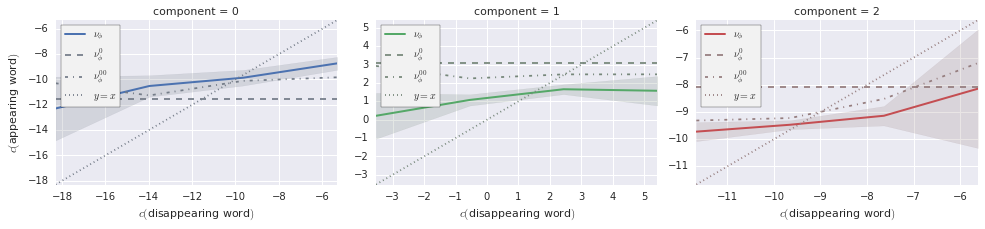

In [33]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On a subset of relevant features

In [34]:
relevant_features = ['frequency', 'aoa', 'letters_count']

Compute the actual PCA

In [35]:
# Compute the PCA.
pcafeatures = tuple(sorted(relevant_features))
pcavariations = variations[variations['feature']
                           .map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

pd.DataFrame(pca.components_,
             columns=pcafeatures,
             index=['Component-{}'.format(i)
                    for i in range(pca.n_components_)])

MLE estimates there are 2 components.

Those explain the following variance:
[ 0.67271316  0.18552666]



,aoa,frequency,letters_count
Component-0,-0.738035,0.358249,-0.571805
Component-1,0.450823,-0.368725,-0.812896


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [36]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(pca.n_components_):
            source, destination = substitution.components(component, pca,
                                                          pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (    0 of 15119) |                   | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   15 of 15119) |                     | Elapsed Time: 0:00:03 ETA: 0:55:34

  0% (   46 of 15119) |                     | Elapsed Time: 0:00:03 ETA: 0:19:13

  0% (   81 of 15119) |                     | Elapsed Time: 0:00:03 ETA: 0:11:31

  0% (  114 of 15119) |                     | Elapsed Time: 0:00:03 ETA: 0:08:37

  0% (  147 of 15119) |                     | Elapsed Time: 0:00:04 ETA: 0:01:34

  1% (  189 of 15119) |                     | Elapsed Time: 0:00:04 ETA: 0:01:30

  1% (  224 of 15119) |                     | Elapsed Time: 0:00:04 ETA: 0:01:29

  1% (  259 of 15119) |                     | Elapsed Time: 0:00:04 ETA: 0:01:28

  1% (  291 of 15119) |                     | Elapsed Time: 0:00:05 ETA: 0:01:29

  2% (  315 of 15119) |                     | Elapsed Time: 0:00:05 ETA: 0:01:36

  2% (  335 of 15119) |                     | Elapsed Time: 0:00:05 ETA: 0:01:50

  2% (  363 of 15119) |                     | Elapsed Time: 0:00:05 ETA: 0:01:55

  2% (  393 of 15119) |                     | Elapsed Time: 0:00:05 ETA: 0:01:57

  2% (  423 of 15119) |                     | Elapsed Time: 0:00:06 ETA: 0:01:57

  3% (  455 of 15119) |                     | Elapsed Time: 0:00:06 ETA: 0:01:44

  3% (  487 of 15119) |                     | Elapsed Time: 0:00:06 ETA: 0:01:35

  3% (  519 of 15119) |                     | Elapsed Time: 0:00:06 ETA: 0:01:35

  3% (  567 of 15119) |                     | Elapsed Time: 0:00:06 ETA: 0:01:33

  3% (  600 of 15119) |                     | Elapsed Time: 0:00:07 ETA: 0:01:31

  4% (  633 of 15119) |                     | Elapsed Time: 0:00:07 ETA: 0:01:30

  4% (  667 of 15119) |                     | Elapsed Time: 0:00:07 ETA: 0:01:29

  4% (  700 of 15119) |                     | Elapsed Time: 0:00:07 ETA: 0:01:29

  4% (  734 of 15119) |#                    | Elapsed Time: 0:00:07 ETA: 0:01:28

  5% (  773 of 15119) |#                    | Elapsed Time: 0:00:08 ETA: 0:01:27

  5% (  807 of 15119) |#                    | Elapsed Time: 0:00:08 ETA: 0:01:27

  5% (  841 of 15119) |#                    | Elapsed Time: 0:00:08 ETA: 0:01:26

  5% (  875 of 15119) |#                    | Elapsed Time: 0:00:08 ETA: 0:01:26

  6% (  909 of 15119) |#                    | Elapsed Time: 0:00:09 ETA: 0:01:26

  6% (  945 of 15119) |#                    | Elapsed Time: 0:00:09 ETA: 0:01:26

  6% (  979 of 15119) |#                    | Elapsed Time: 0:00:09 ETA: 0:01:26

  6% ( 1013 of 15119) |#                    | Elapsed Time: 0:00:09 ETA: 0:01:25

  6% ( 1047 of 15119) |#                    | Elapsed Time: 0:00:09 ETA: 0:01:25

  7% ( 1081 of 15119) |#                    | Elapsed Time: 0:00:10 ETA: 0:01:25

  7% ( 1115 of 15119) |#                    | Elapsed Time: 0:00:10 ETA: 0:01:25

  7% ( 1151 of 15119) |#                    | Elapsed Time: 0:00:10 ETA: 0:01:25

  7% ( 1185 of 15119) |#                    | Elapsed Time: 0:00:10 ETA: 0:01:25

  8% ( 1217 of 15119) |#                    | Elapsed Time: 0:00:10 ETA: 0:01:26

  8% ( 1251 of 15119) |#                    | Elapsed Time: 0:00:11 ETA: 0:01:26

  8% ( 1285 of 15119) |#                    | Elapsed Time: 0:00:11 ETA: 0:01:26

  8% ( 1323 of 15119) |#                    | Elapsed Time: 0:00:11 ETA: 0:01:25

  8% ( 1357 of 15119) |#                    | Elapsed Time: 0:00:11 ETA: 0:01:25

  9% ( 1391 of 15119) |#                    | Elapsed Time: 0:00:12 ETA: 0:01:24

  9% ( 1424 of 15119) |#                    | Elapsed Time: 0:00:12 ETA: 0:01:24

  9% ( 1457 of 15119) |##                   | Elapsed Time: 0:00:12 ETA: 0:01:25

  9% ( 1491 of 15119) |##                   | Elapsed Time: 0:00:12 ETA: 0:01:24

 10% ( 1529 of 15119) |##                   | Elapsed Time: 0:00:12 ETA: 0:01:24

 10% ( 1563 of 15119) |##                   | Elapsed Time: 0:00:13 ETA: 0:01:24

 10% ( 1597 of 15119) |##                   | Elapsed Time: 0:00:13 ETA: 0:01:23

 10% ( 1631 of 15119) |##                   | Elapsed Time: 0:00:13 ETA: 0:01:23

 11% ( 1665 of 15119) |##                   | Elapsed Time: 0:00:13 ETA: 0:01:23

 11% ( 1701 of 15119) |##                   | Elapsed Time: 0:00:13 ETA: 0:01:22

 11% ( 1736 of 15119) |##                   | Elapsed Time: 0:00:14 ETA: 0:01:21

 11% ( 1771 of 15119) |##                   | Elapsed Time: 0:00:14 ETA: 0:01:20

 11% ( 1805 of 15119) |##                   | Elapsed Time: 0:00:14 ETA: 0:01:19

 12% ( 1839 of 15119) |##                   | Elapsed Time: 0:00:14 ETA: 0:01:19

 12% ( 1873 of 15119) |##                   | Elapsed Time: 0:00:14 ETA: 0:01:20

 12% ( 1907 of 15119) |##                   | Elapsed Time: 0:00:15 ETA: 0:01:20

 12% ( 1941 of 15119) |##                   | Elapsed Time: 0:00:15 ETA: 0:01:20

 13% ( 1967 of 15119) |##                   | Elapsed Time: 0:00:15 ETA: 0:01:24

 13% ( 2003 of 15119) |##                   | Elapsed Time: 0:00:15 ETA: 0:01:23

 13% ( 2040 of 15119) |##                   | Elapsed Time: 0:00:16 ETA: 0:01:21

 13% ( 2079 of 15119) |##                   | Elapsed Time: 0:00:16 ETA: 0:01:26

 13% ( 2105 of 15119) |##                   | Elapsed Time: 0:00:16 ETA: 0:01:26

 14% ( 2131 of 15119) |##                   | Elapsed Time: 0:00:16 ETA: 0:01:33

 14% ( 2157 of 15119) |##                   | Elapsed Time: 0:00:16 ETA: 0:01:42

 14% ( 2183 of 15119) |###                  | Elapsed Time: 0:00:17 ETA: 0:01:42

 14% ( 2209 of 15119) |###                  | Elapsed Time: 0:00:17 ETA: 0:01:43

 14% ( 2235 of 15119) |###                  | Elapsed Time: 0:00:17 ETA: 0:01:44

 15% ( 2268 of 15119) |###                  | Elapsed Time: 0:00:17 ETA: 0:01:44

 15% ( 2294 of 15119) |###                  | Elapsed Time: 0:00:18 ETA: 0:01:44

 15% ( 2320 of 15119) |###                  | Elapsed Time: 0:00:18 ETA: 0:01:44

 15% ( 2348 of 15119) |###                  | Elapsed Time: 0:00:18 ETA: 0:01:41

 15% ( 2385 of 15119) |###                  | Elapsed Time: 0:00:18 ETA: 0:01:32

 16% ( 2420 of 15119) |###                  | Elapsed Time: 0:00:18 ETA: 0:01:25

 16% ( 2457 of 15119) |###                  | Elapsed Time: 0:00:19 ETA: 0:01:20

 16% ( 2490 of 15119) |###                  | Elapsed Time: 0:00:19 ETA: 0:01:17

 16% ( 2522 of 15119) |###                  | Elapsed Time: 0:00:19 ETA: 0:01:17

 16% ( 2554 of 15119) |###                  | Elapsed Time: 0:00:19 ETA: 0:01:19

 17% ( 2586 of 15119) |###                  | Elapsed Time: 0:00:19 ETA: 0:01:19

 17% ( 2618 of 15119) |###                  | Elapsed Time: 0:00:20 ETA: 0:01:19

 17% ( 2662 of 15119) |###                  | Elapsed Time: 0:00:20 ETA: 0:01:18

 17% ( 2692 of 15119) |###                  | Elapsed Time: 0:00:20 ETA: 0:01:20

 17% ( 2720 of 15119) |###                  | Elapsed Time: 0:00:20 ETA: 0:01:22

 18% ( 2748 of 15119) |###                  | Elapsed Time: 0:00:21 ETA: 0:01:24

 18% ( 2781 of 15119) |###                  | Elapsed Time: 0:00:21 ETA: 0:01:23

 18% ( 2816 of 15119) |###                  | Elapsed Time: 0:00:21 ETA: 0:01:22

 18% ( 2853 of 15119) |###                  | Elapsed Time: 0:00:21 ETA: 0:01:16

 19% ( 2891 of 15119) |####                 | Elapsed Time: 0:00:21 ETA: 0:01:11

 19% ( 2928 of 15119) |####                 | Elapsed Time: 0:00:22 ETA: 0:01:09

 19% ( 2965 of 15119) |####                 | Elapsed Time: 0:00:22 ETA: 0:01:07

 19% ( 3002 of 15119) |####                 | Elapsed Time: 0:00:22 ETA: 0:01:07

 20% ( 3040 of 15119) |####                 | Elapsed Time: 0:00:22 ETA: 0:01:08

 20% ( 3078 of 15119) |####                 | Elapsed Time: 0:00:22 ETA: 0:01:08

 20% ( 3113 of 15119) |####                 | Elapsed Time: 0:00:23 ETA: 0:01:08

 20% ( 3151 of 15119) |####                 | Elapsed Time: 0:00:23 ETA: 0:01:07

 21% ( 3189 of 15119) |####                 | Elapsed Time: 0:00:23 ETA: 0:01:07

 21% ( 3232 of 15119) |####                 | Elapsed Time: 0:00:23 ETA: 0:01:05

 21% ( 3269 of 15119) |####                 | Elapsed Time: 0:00:23 ETA: 0:01:05

 21% ( 3308 of 15119) |####                 | Elapsed Time: 0:00:24 ETA: 0:01:04

 22% ( 3347 of 15119) |####                 | Elapsed Time: 0:00:24 ETA: 0:01:03

 22% ( 3402 of 15119) |####                 | Elapsed Time: 0:00:24 ETA: 0:01:02

 22% ( 3442 of 15119) |####                 | Elapsed Time: 0:00:24 ETA: 0:01:01

 23% ( 3481 of 15119) |####                 | Elapsed Time: 0:00:25 ETA: 0:01:00

 23% ( 3519 of 15119) |####                 | Elapsed Time: 0:00:25 ETA: 0:01:00

 23% ( 3558 of 15119) |####                 | Elapsed Time: 0:00:25 ETA: 0:01:00

 23% ( 3608 of 15119) |#####                | Elapsed Time: 0:00:25 ETA: 0:01:03

 24% ( 3641 of 15119) |#####                | Elapsed Time: 0:00:25 ETA: 0:01:05

 24% ( 3669 of 15119) |#####                | Elapsed Time: 0:00:26 ETA: 0:01:09

 24% ( 3697 of 15119) |#####                | Elapsed Time: 0:00:26 ETA: 0:01:13

 24% ( 3725 of 15119) |#####                | Elapsed Time: 0:00:26 ETA: 0:01:18

 24% ( 3753 of 15119) |#####                | Elapsed Time: 0:00:26 ETA: 0:01:21

 25% ( 3795 of 15119) |#####                | Elapsed Time: 0:00:27 ETA: 0:01:21

 25% ( 3821 of 15119) |#####                | Elapsed Time: 0:00:27 ETA: 0:01:22

 25% ( 3859 of 15119) |#####                | Elapsed Time: 0:00:27 ETA: 0:01:17

 25% ( 3896 of 15119) |#####                | Elapsed Time: 0:00:27 ETA: 0:01:12

 26% ( 3932 of 15119) |#####                | Elapsed Time: 0:00:27 ETA: 0:01:09

 26% ( 3969 of 15119) |#####                | Elapsed Time: 0:00:28 ETA: 0:01:05

 26% ( 3997 of 15119) |#####                | Elapsed Time: 0:00:28 ETA: 0:01:08

 26% ( 4029 of 15119) |#####                | Elapsed Time: 0:00:28 ETA: 0:01:10

 26% ( 4053 of 15119) |#####                | Elapsed Time: 0:00:28 ETA: 0:01:15

 27% ( 4087 of 15119) |#####                | Elapsed Time: 0:00:28 ETA: 0:01:16

 27% ( 4119 of 15119) |#####                | Elapsed Time: 0:00:29 ETA: 0:01:15

 27% ( 4158 of 15119) |#####                | Elapsed Time: 0:00:29 ETA: 0:01:10

 27% ( 4194 of 15119) |#####                | Elapsed Time: 0:00:29 ETA: 0:01:07

 27% ( 4230 of 15119) |#####                | Elapsed Time: 0:00:29 ETA: 0:01:05

 28% ( 4266 of 15119) |#####                | Elapsed Time: 0:00:30 ETA: 0:01:03

 28% ( 4295 of 15119) |#####                | Elapsed Time: 0:00:30 ETA: 0:01:04

 28% ( 4324 of 15119) |######               | Elapsed Time: 0:00:30 ETA: 0:01:07

 28% ( 4365 of 15119) |######               | Elapsed Time: 0:00:30 ETA: 0:01:07

 29% ( 4391 of 15119) |######               | Elapsed Time: 0:00:30 ETA: 0:01:12

 29% ( 4417 of 15119) |######               | Elapsed Time: 0:00:31 ETA: 0:01:16

 29% ( 4442 of 15119) |######               | Elapsed Time: 0:00:31 ETA: 0:01:18

 29% ( 4477 of 15119) |######               | Elapsed Time: 0:00:31 ETA: 0:01:15

 29% ( 4510 of 15119) |######               | Elapsed Time: 0:00:31 ETA: 0:01:15

 30% ( 4553 of 15119) |######               | Elapsed Time: 0:00:32 ETA: 0:01:12

 30% ( 4589 of 15119) |######               | Elapsed Time: 0:00:32 ETA: 0:01:07

 30% ( 4621 of 15119) |######               | Elapsed Time: 0:00:32 ETA: 0:01:06

 30% ( 4651 of 15119) |######               | Elapsed Time: 0:00:32 ETA: 0:01:08

 30% ( 4683 of 15119) |######               | Elapsed Time: 0:00:32 ETA: 0:01:07

 31% ( 4725 of 15119) |######               | Elapsed Time: 0:00:33 ETA: 0:01:04

 31% ( 4759 of 15119) |######               | Elapsed Time: 0:00:33 ETA: 0:01:04

 31% ( 4795 of 15119) |######               | Elapsed Time: 0:00:33 ETA: 0:01:02

 31% ( 4829 of 15119) |######               | Elapsed Time: 0:00:33 ETA: 0:01:00

 32% ( 4865 of 15119) |######               | Elapsed Time: 0:00:33 ETA: 0:00:59

 32% ( 4914 of 15119) |######               | Elapsed Time: 0:00:34 ETA: 0:00:59

 32% ( 4948 of 15119) |######               | Elapsed Time: 0:00:34 ETA: 0:00:59

 32% ( 4983 of 15119) |######               | Elapsed Time: 0:00:34 ETA: 0:00:59

 33% ( 5017 of 15119) |######               | Elapsed Time: 0:00:34 ETA: 0:00:59

 33% ( 5037 of 15119) |######               | Elapsed Time: 0:00:35 ETA: 0:01:06

 33% ( 5063 of 15119) |#######              | Elapsed Time: 0:00:35 ETA: 0:01:11

 33% ( 5103 of 15119) |#######              | Elapsed Time: 0:00:35 ETA: 0:01:12

 33% ( 5140 of 15119) |#######              | Elapsed Time: 0:00:35 ETA: 0:01:10

 34% ( 5176 of 15119) |#######              | Elapsed Time: 0:00:35 ETA: 0:01:05

 34% ( 5206 of 15119) |#######              | Elapsed Time: 0:00:36 ETA: 0:01:01

 34% ( 5236 of 15119) |#######              | Elapsed Time: 0:00:36 ETA: 0:01:01

 34% ( 5265 of 15119) |#######              | Elapsed Time: 0:00:36 ETA: 0:01:03

 35% ( 5310 of 15119) |#######              | Elapsed Time: 0:00:36 ETA: 0:01:03

 35% ( 5347 of 15119) |#######              | Elapsed Time: 0:00:36 ETA: 0:01:01

 35% ( 5385 of 15119) |#######              | Elapsed Time: 0:00:37 ETA: 0:00:58

 35% ( 5423 of 15119) |#######              | Elapsed Time: 0:00:37 ETA: 0:00:55

 36% ( 5455 of 15119) |#######              | Elapsed Time: 0:00:37 ETA: 0:00:54

 36% ( 5500 of 15119) |#######              | Elapsed Time: 0:00:37 ETA: 0:00:53

 36% ( 5537 of 15119) |#######              | Elapsed Time: 0:00:38 ETA: 0:00:53

 36% ( 5567 of 15119) |#######              | Elapsed Time: 0:00:38 ETA: 0:00:56

 37% ( 5603 of 15119) |#######              | Elapsed Time: 0:00:38 ETA: 0:00:55

 37% ( 5636 of 15119) |#######              | Elapsed Time: 0:00:38 ETA: 0:00:56

 37% ( 5670 of 15119) |#######              | Elapsed Time: 0:00:38 ETA: 0:00:58

 37% ( 5702 of 15119) |#######              | Elapsed Time: 0:00:39 ETA: 0:00:58

 37% ( 5734 of 15119) |#######              | Elapsed Time: 0:00:39 ETA: 0:00:58

 38% ( 5766 of 15119) |########             | Elapsed Time: 0:00:39 ETA: 0:00:59

 38% ( 5798 of 15119) |########             | Elapsed Time: 0:00:39 ETA: 0:00:59

 38% ( 5830 of 15119) |########             | Elapsed Time: 0:00:39 ETA: 0:00:59

 38% ( 5875 of 15119) |########             | Elapsed Time: 0:00:40 ETA: 0:00:59

 39% ( 5911 of 15119) |########             | Elapsed Time: 0:00:40 ETA: 0:00:57

 39% ( 5956 of 15119) |########             | Elapsed Time: 0:00:40 ETA: 0:00:58

 39% ( 5986 of 15119) |########             | Elapsed Time: 0:00:40 ETA: 0:00:58

 39% ( 6018 of 15119) |########             | Elapsed Time: 0:00:41 ETA: 0:00:58

 40% ( 6064 of 15119) |########             | Elapsed Time: 0:00:41 ETA: 0:00:59

 40% ( 6096 of 15119) |########             | Elapsed Time: 0:00:41 ETA: 0:00:58

 40% ( 6128 of 15119) |########             | Elapsed Time: 0:00:41 ETA: 0:00:58

 40% ( 6160 of 15119) |########             | Elapsed Time: 0:00:42 ETA: 0:00:57

 40% ( 6191 of 15119) |########             | Elapsed Time: 0:00:42 ETA: 0:00:57

 41% ( 6221 of 15119) |########             | Elapsed Time: 0:00:42 ETA: 0:00:57

 41% ( 6253 of 15119) |########             | Elapsed Time: 0:00:42 ETA: 0:00:58

 41% ( 6288 of 15119) |########             | Elapsed Time: 0:00:42 ETA: 0:00:57

 41% ( 6325 of 15119) |########             | Elapsed Time: 0:00:43 ETA: 0:00:55

 42% ( 6359 of 15119) |########             | Elapsed Time: 0:00:43 ETA: 0:00:53

 42% ( 6396 of 15119) |########             | Elapsed Time: 0:00:43 ETA: 0:00:51

 42% ( 6443 of 15119) |########             | Elapsed Time: 0:00:43 ETA: 0:00:50

 42% ( 6477 of 15119) |########             | Elapsed Time: 0:00:43 ETA: 0:00:50

 43% ( 6529 of 15119) |#########            | Elapsed Time: 0:00:44 ETA: 0:00:50

 43% ( 6566 of 15119) |#########            | Elapsed Time: 0:00:44 ETA: 0:00:49

 43% ( 6615 of 15119) |#########            | Elapsed Time: 0:00:44 ETA: 0:00:49

 43% ( 6648 of 15119) |#########            | Elapsed Time: 0:00:44 ETA: 0:00:49

 44% ( 6680 of 15119) |#########            | Elapsed Time: 0:00:45 ETA: 0:00:50

 44% ( 6711 of 15119) |#########            | Elapsed Time: 0:00:45 ETA: 0:00:51

 44% ( 6743 of 15119) |#########            | Elapsed Time: 0:00:45 ETA: 0:00:53

 44% ( 6775 of 15119) |#########            | Elapsed Time: 0:00:45 ETA: 0:00:54

 45% ( 6820 of 15119) |#########            | Elapsed Time: 0:00:46 ETA: 0:00:53

 45% ( 6855 of 15119) |#########            | Elapsed Time: 0:00:46 ETA: 0:00:52

 45% ( 6893 of 15119) |#########            | Elapsed Time: 0:00:46 ETA: 0:00:49

 45% ( 6931 of 15119) |#########            | Elapsed Time: 0:00:46 ETA: 0:00:47

 46% ( 6966 of 15119) |#########            | Elapsed Time: 0:00:46 ETA: 0:00:46

 46% ( 7010 of 15119) |#########            | Elapsed Time: 0:00:47 ETA: 0:00:45

 46% ( 7048 of 15119) |#########            | Elapsed Time: 0:00:47 ETA: 0:00:45

 46% ( 7080 of 15119) |#########            | Elapsed Time: 0:00:47 ETA: 0:00:47

 47% ( 7114 of 15119) |#########            | Elapsed Time: 0:00:47 ETA: 0:00:48

 47% ( 7147 of 15119) |#########            | Elapsed Time: 0:00:48 ETA: 0:00:48

 47% ( 7182 of 15119) |#########            | Elapsed Time: 0:00:48 ETA: 0:00:47

 47% ( 7219 of 15119) |##########           | Elapsed Time: 0:00:48 ETA: 0:00:47

 47% ( 7251 of 15119) |##########           | Elapsed Time: 0:00:48 ETA: 0:00:47

 48% ( 7281 of 15119) |##########           | Elapsed Time: 0:00:48 ETA: 0:00:48

 48% ( 7320 of 15119) |##########           | Elapsed Time: 0:00:49 ETA: 0:00:46

 48% ( 7371 of 15119) |##########           | Elapsed Time: 0:00:49 ETA: 0:00:45

 48% ( 7403 of 15119) |##########           | Elapsed Time: 0:00:49 ETA: 0:00:46

 49% ( 7435 of 15119) |##########           | Elapsed Time: 0:00:49 ETA: 0:00:45

 49% ( 7467 of 15119) |##########           | Elapsed Time: 0:00:49 ETA: 0:00:47

 49% ( 7498 of 15119) |##########           | Elapsed Time: 0:00:50 ETA: 0:00:48

 49% ( 7530 of 15119) |##########           | Elapsed Time: 0:00:50 ETA: 0:00:49

 50% ( 7560 of 15119) |##########           | Elapsed Time: 0:00:50 ETA: 0:00:50

 50% ( 7584 of 15119) |##########           | Elapsed Time: 0:00:50 ETA: 0:00:52

 50% ( 7612 of 15119) |##########           | Elapsed Time: 0:00:50 ETA: 0:00:54

 50% ( 7644 of 15119) |##########           | Elapsed Time: 0:00:51 ETA: 0:00:53

 50% ( 7675 of 15119) |##########           | Elapsed Time: 0:00:51 ETA: 0:00:53

 50% ( 7706 of 15119) |##########           | Elapsed Time: 0:00:51 ETA: 0:00:51

 51% ( 7749 of 15119) |##########           | Elapsed Time: 0:00:51 ETA: 0:00:46

 51% ( 7782 of 15119) |##########           | Elapsed Time: 0:00:52 ETA: 0:00:45

 51% ( 7813 of 15119) |##########           | Elapsed Time: 0:00:52 ETA: 0:00:45

 51% ( 7848 of 15119) |##########           | Elapsed Time: 0:00:52 ETA: 0:00:43

 52% ( 7885 of 15119) |##########           | Elapsed Time: 0:00:52 ETA: 0:00:43

 52% ( 7938 of 15119) |###########          | Elapsed Time: 0:00:52 ETA: 0:00:43

 52% ( 7974 of 15119) |###########          | Elapsed Time: 0:00:53 ETA: 0:00:40

 52% ( 8006 of 15119) |###########          | Elapsed Time: 0:00:53 ETA: 0:00:41

 53% ( 8040 of 15119) |###########          | Elapsed Time: 0:00:53 ETA: 0:00:41

 53% ( 8077 of 15119) |###########          | Elapsed Time: 0:00:53 ETA: 0:00:41

 53% ( 8127 of 15119) |###########          | Elapsed Time: 0:00:54 ETA: 0:00:40

 53% ( 8162 of 15119) |###########          | Elapsed Time: 0:00:54 ETA: 0:00:40

 54% ( 8195 of 15119) |###########          | Elapsed Time: 0:00:54 ETA: 0:00:39

 54% ( 8228 of 15119) |###########          | Elapsed Time: 0:00:54 ETA: 0:00:39

 54% ( 8265 of 15119) |###########          | Elapsed Time: 0:00:54 ETA: 0:00:40

 54% ( 8300 of 15119) |###########          | Elapsed Time: 0:00:55 ETA: 0:00:40

 55% ( 8330 of 15119) |###########          | Elapsed Time: 0:00:55 ETA: 0:00:41

 55% ( 8359 of 15119) |###########          | Elapsed Time: 0:00:55 ETA: 0:00:41

 55% ( 8389 of 15119) |###########          | Elapsed Time: 0:00:55 ETA: 0:00:44

 55% ( 8422 of 15119) |###########          | Elapsed Time: 0:00:55 ETA: 0:00:44

 55% ( 8458 of 15119) |###########          | Elapsed Time: 0:00:56 ETA: 0:00:43

 56% ( 8505 of 15119) |###########          | Elapsed Time: 0:00:56 ETA: 0:00:40

 56% ( 8542 of 15119) |###########          | Elapsed Time: 0:00:56 ETA: 0:00:38

 56% ( 8577 of 15119) |###########          | Elapsed Time: 0:00:56 ETA: 0:00:37

 56% ( 8614 of 15119) |###########          | Elapsed Time: 0:00:57 ETA: 0:00:36

 57% ( 8647 of 15119) |############         | Elapsed Time: 0:00:57 ETA: 0:00:37

 57% ( 8694 of 15119) |############         | Elapsed Time: 0:00:57 ETA: 0:00:38

 57% ( 8730 of 15119) |############         | Elapsed Time: 0:00:57 ETA: 0:00:38

 57% ( 8764 of 15119) |############         | Elapsed Time: 0:00:57 ETA: 0:00:37

 58% ( 8802 of 15119) |############         | Elapsed Time: 0:00:58 ETA: 0:00:37

 58% ( 8837 of 15119) |############         | Elapsed Time: 0:00:58 ETA: 0:00:36

 58% ( 8883 of 15119) |############         | Elapsed Time: 0:00:58 ETA: 0:00:36

 58% ( 8919 of 15119) |############         | Elapsed Time: 0:00:58 ETA: 0:00:35

 59% ( 8954 of 15119) |############         | Elapsed Time: 0:00:59 ETA: 0:00:35

 59% ( 8986 of 15119) |############         | Elapsed Time: 0:00:59 ETA: 0:00:36

 59% ( 9019 of 15119) |############         | Elapsed Time: 0:00:59 ETA: 0:00:35

 59% ( 9055 of 15119) |############         | Elapsed Time: 0:00:59 ETA: 0:00:36

 60% ( 9090 of 15119) |############         | Elapsed Time: 0:00:59 ETA: 0:00:36

 60% ( 9129 of 15119) |############         | Elapsed Time: 0:01:00 ETA: 0:00:34

 60% ( 9161 of 15119) |############         | Elapsed Time: 0:01:00 ETA: 0:00:34

 60% ( 9198 of 15119) |############         | Elapsed Time: 0:01:00 ETA: 0:00:34

 61% ( 9238 of 15119) |############         | Elapsed Time: 0:01:00 ETA: 0:00:32

 61% ( 9281 of 15119) |############         | Elapsed Time: 0:01:00 ETA: 0:00:32

 61% ( 9316 of 15119) |############         | Elapsed Time: 0:01:01 ETA: 0:00:32

 61% ( 9345 of 15119) |############         | Elapsed Time: 0:01:01 ETA: 0:00:32

 62% ( 9385 of 15119) |#############        | Elapsed Time: 0:01:01 ETA: 0:00:32

 62% ( 9422 of 15119) |#############        | Elapsed Time: 0:01:01 ETA: 0:00:32

 62% ( 9450 of 15119) |#############        | Elapsed Time: 0:01:01 ETA: 0:00:34

 62% ( 9487 of 15119) |#############        | Elapsed Time: 0:01:02 ETA: 0:00:34

 62% ( 9521 of 15119) |#############        | Elapsed Time: 0:01:02 ETA: 0:00:32

 63% ( 9554 of 15119) |#############        | Elapsed Time: 0:01:02 ETA: 0:00:33

 63% ( 9593 of 15119) |#############        | Elapsed Time: 0:01:02 ETA: 0:00:33

 63% ( 9615 of 15119) |#############        | Elapsed Time: 0:01:02 ETA: 0:00:35

 63% ( 9657 of 15119) |#############        | Elapsed Time: 0:01:03 ETA: 0:00:34

 64% ( 9695 of 15119) |#############        | Elapsed Time: 0:01:03 ETA: 0:00:32

 64% ( 9733 of 15119) |#############        | Elapsed Time: 0:01:03 ETA: 0:00:32

 64% ( 9763 of 15119) |#############        | Elapsed Time: 0:01:03 ETA: 0:00:31

 64% ( 9794 of 15119) |#############        | Elapsed Time: 0:01:04 ETA: 0:00:31

 65% ( 9847 of 15119) |#############        | Elapsed Time: 0:01:04 ETA: 0:00:31

 65% ( 9884 of 15119) |#############        | Elapsed Time: 0:01:04 ETA: 0:00:31

 65% ( 9918 of 15119) |#############        | Elapsed Time: 0:01:04 ETA: 0:00:31

 65% ( 9954 of 15119) |#############        | Elapsed Time: 0:01:04 ETA: 0:00:29

 66% ( 9987 of 15119) |#############        | Elapsed Time: 0:01:05 ETA: 0:00:30

 66% (10017 of 15119) |#############        | Elapsed Time: 0:01:05 ETA: 0:00:30

 66% (10050 of 15119) |#############        | Elapsed Time: 0:01:05 ETA: 0:00:31

 66% (10084 of 15119) |##############       | Elapsed Time: 0:01:05 ETA: 0:00:31

 66% (10120 of 15119) |##############       | Elapsed Time: 0:01:05 ETA: 0:00:31

 67% (10148 of 15119) |##############       | Elapsed Time: 0:01:06 ETA: 0:00:31

 67% (10186 of 15119) |##############       | Elapsed Time: 0:01:06 ETA: 0:00:29

 67% (10220 of 15119) |##############       | Elapsed Time: 0:01:06 ETA: 0:00:30

 67% (10247 of 15119) |##############       | Elapsed Time: 0:01:06 ETA: 0:00:31

 68% (10283 of 15119) |##############       | Elapsed Time: 0:01:07 ETA: 0:00:31

 68% (10313 of 15119) |##############       | Elapsed Time: 0:01:07 ETA: 0:00:31

 68% (10345 of 15119) |##############       | Elapsed Time: 0:01:07 ETA: 0:00:32

 68% (10395 of 15119) |##############       | Elapsed Time: 0:01:07 ETA: 0:00:29

 68% (10430 of 15119) |##############       | Elapsed Time: 0:01:07 ETA: 0:00:28

 69% (10467 of 15119) |##############       | Elapsed Time: 0:01:08 ETA: 0:00:27

 69% (10505 of 15119) |##############       | Elapsed Time: 0:01:08 ETA: 0:00:26

 69% (10544 of 15119) |##############       | Elapsed Time: 0:01:08 ETA: 0:00:25

 70% (10584 of 15119) |##############       | Elapsed Time: 0:01:08 ETA: 0:00:24

 70% (10621 of 15119) |##############       | Elapsed Time: 0:01:08 ETA: 0:00:24

 70% (10640 of 15119) |##############       | Elapsed Time: 0:01:09 ETA: 0:00:27

 70% (10658 of 15119) |##############       | Elapsed Time: 0:01:09 ETA: 0:00:31

 70% (10689 of 15119) |##############       | Elapsed Time: 0:01:09 ETA: 0:00:33

 70% (10723 of 15119) |##############       | Elapsed Time: 0:01:09 ETA: 0:00:33

 71% (10753 of 15119) |##############       | Elapsed Time: 0:01:10 ETA: 0:00:33

 71% (10785 of 15119) |##############       | Elapsed Time: 0:01:10 ETA: 0:00:29

 71% (10813 of 15119) |###############      | Elapsed Time: 0:01:10 ETA: 0:00:27

 71% (10840 of 15119) |###############      | Elapsed Time: 0:01:10 ETA: 0:00:29

 71% (10868 of 15119) |###############      | Elapsed Time: 0:01:10 ETA: 0:00:30

 72% (10906 of 15119) |###############      | Elapsed Time: 0:01:11 ETA: 0:00:29

 72% (10943 of 15119) |###############      | Elapsed Time: 0:01:11 ETA: 0:00:26

 72% (10981 of 15119) |###############      | Elapsed Time: 0:01:11 ETA: 0:00:24

 72% (11016 of 15119) |###############      | Elapsed Time: 0:01:11 ETA: 0:00:23

 73% (11049 of 15119) |###############      | Elapsed Time: 0:01:11 ETA: 0:00:23

 73% (11102 of 15119) |###############      | Elapsed Time: 0:01:12 ETA: 0:00:23

 73% (11151 of 15119) |###############      | Elapsed Time: 0:01:12 ETA: 0:00:23

 73% (11186 of 15119) |###############      | Elapsed Time: 0:01:12 ETA: 0:00:22

 74% (11218 of 15119) |###############      | Elapsed Time: 0:01:12 ETA: 0:00:22

 74% (11254 of 15119) |###############      | Elapsed Time: 0:01:13 ETA: 0:00:22

 74% (11289 of 15119) |###############      | Elapsed Time: 0:01:13 ETA: 0:00:22

 75% (11340 of 15119) |###############      | Elapsed Time: 0:01:13 ETA: 0:00:22

 75% (11376 of 15119) |###############      | Elapsed Time: 0:01:13 ETA: 0:00:21

 75% (11413 of 15119) |###############      | Elapsed Time: 0:01:13 ETA: 0:00:21

 75% (11445 of 15119) |###############      | Elapsed Time: 0:01:14 ETA: 0:00:21

 75% (11478 of 15119) |###############      | Elapsed Time: 0:01:14 ETA: 0:00:21

 76% (11529 of 15119) |################     | Elapsed Time: 0:01:14 ETA: 0:00:20

 76% (11566 of 15119) |################     | Elapsed Time: 0:01:14 ETA: 0:00:20

 76% (11605 of 15119) |################     | Elapsed Time: 0:01:15 ETA: 0:00:19

 76% (11639 of 15119) |################     | Elapsed Time: 0:01:15 ETA: 0:00:19

 77% (11673 of 15119) |################     | Elapsed Time: 0:01:15 ETA: 0:00:19

 77% (11718 of 15119) |################     | Elapsed Time: 0:01:15 ETA: 0:00:19

 77% (11751 of 15119) |################     | Elapsed Time: 0:01:15 ETA: 0:00:20

 77% (11786 of 15119) |################     | Elapsed Time: 0:01:16 ETA: 0:00:20

 78% (11821 of 15119) |################     | Elapsed Time: 0:01:16 ETA: 0:00:20

 78% (11854 of 15119) |################     | Elapsed Time: 0:01:16 ETA: 0:00:20

 78% (11886 of 15119) |################     | Elapsed Time: 0:01:16 ETA: 0:00:19

 78% (11925 of 15119) |################     | Elapsed Time: 0:01:17 ETA: 0:00:19

 79% (11960 of 15119) |################     | Elapsed Time: 0:01:17 ETA: 0:00:19

 79% (11994 of 15119) |################     | Elapsed Time: 0:01:17 ETA: 0:00:19

 79% (12026 of 15119) |################     | Elapsed Time: 0:01:17 ETA: 0:00:18

 79% (12059 of 15119) |################     | Elapsed Time: 0:01:17 ETA: 0:00:18

 80% (12096 of 15119) |################     | Elapsed Time: 0:01:18 ETA: 0:00:19

 80% (12125 of 15119) |################     | Elapsed Time: 0:01:18 ETA: 0:00:19

 80% (12159 of 15119) |################     | Elapsed Time: 0:01:18 ETA: 0:00:19

 80% (12189 of 15119) |################     | Elapsed Time: 0:01:18 ETA: 0:00:19

 80% (12241 of 15119) |#################    | Elapsed Time: 0:01:19 ETA: 0:00:18

 81% (12270 of 15119) |#################    | Elapsed Time: 0:01:19 ETA: 0:00:18

 81% (12300 of 15119) |#################    | Elapsed Time: 0:01:19 ETA: 0:00:18

 81% (12327 of 15119) |#################    | Elapsed Time: 0:01:19 ETA: 0:00:18

 81% (12349 of 15119) |#################    | Elapsed Time: 0:01:19 ETA: 0:00:20

 81% (12377 of 15119) |#################    | Elapsed Time: 0:01:20 ETA: 0:00:21

 82% (12410 of 15119) |#################    | Elapsed Time: 0:01:20 ETA: 0:00:20

 82% (12436 of 15119) |#################    | Elapsed Time: 0:01:20 ETA: 0:00:20

 82% (12474 of 15119) |#################    | Elapsed Time: 0:01:20 ETA: 0:00:18

 82% (12507 of 15119) |#################    | Elapsed Time: 0:01:20 ETA: 0:00:17

 82% (12541 of 15119) |#################    | Elapsed Time: 0:01:21 ETA: 0:00:16

 83% (12576 of 15119) |#################    | Elapsed Time: 0:01:21 ETA: 0:00:15

 83% (12610 of 15119) |#################    | Elapsed Time: 0:01:21 ETA: 0:00:15

 83% (12647 of 15119) |#################    | Elapsed Time: 0:01:21 ETA: 0:00:14

 83% (12683 of 15119) |#################    | Elapsed Time: 0:01:21 ETA: 0:00:14

 84% (12717 of 15119) |#################    | Elapsed Time: 0:01:22 ETA: 0:00:14

 84% (12751 of 15119) |#################    | Elapsed Time: 0:01:22 ETA: 0:00:13

 84% (12784 of 15119) |#################    | Elapsed Time: 0:01:22 ETA: 0:00:13

 84% (12814 of 15119) |#################    | Elapsed Time: 0:01:22 ETA: 0:00:14

 85% (12852 of 15119) |#################    | Elapsed Time: 0:01:23 ETA: 0:00:14

 85% (12890 of 15119) |#################    | Elapsed Time: 0:01:23 ETA: 0:00:13

 85% (12928 of 15119) |#################    | Elapsed Time: 0:01:23 ETA: 0:00:13

 85% (12961 of 15119) |##################   | Elapsed Time: 0:01:23 ETA: 0:00:12

 85% (12994 of 15119) |##################   | Elapsed Time: 0:01:23 ETA: 0:00:12

 86% (13041 of 15119) |##################   | Elapsed Time: 0:01:24 ETA: 0:00:12

 86% (13072 of 15119) |##################   | Elapsed Time: 0:01:24 ETA: 0:00:12

 86% (13106 of 15119) |##################   | Elapsed Time: 0:01:24 ETA: 0:00:12

 86% (13145 of 15119) |##################   | Elapsed Time: 0:01:24 ETA: 0:00:12

 87% (13177 of 15119) |##################   | Elapsed Time: 0:01:24 ETA: 0:00:11

 87% (13213 of 15119) |##################   | Elapsed Time: 0:01:25 ETA: 0:00:11

 87% (13247 of 15119) |##################   | Elapsed Time: 0:01:25 ETA: 0:00:11

 87% (13276 of 15119) |##################   | Elapsed Time: 0:01:25 ETA: 0:00:11

 88% (13309 of 15119) |##################   | Elapsed Time: 0:01:25 ETA: 0:00:11

 88% (13345 of 15119) |##################   | Elapsed Time: 0:01:26 ETA: 0:00:11

 88% (13383 of 15119) |##################   | Elapsed Time: 0:01:26 ETA: 0:00:10

 88% (13437 of 15119) |##################   | Elapsed Time: 0:01:26 ETA: 0:00:09

 89% (13474 of 15119) |##################   | Elapsed Time: 0:01:26 ETA: 0:00:09

 89% (13507 of 15119) |##################   | Elapsed Time: 0:01:26 ETA: 0:00:09

 89% (13536 of 15119) |##################   | Elapsed Time: 0:01:27 ETA: 0:00:09

 89% (13572 of 15119) |##################   | Elapsed Time: 0:01:27 ETA: 0:00:09

 90% (13608 of 15119) |##################   | Elapsed Time: 0:01:27 ETA: 0:00:09

 90% (13645 of 15119) |##################   | Elapsed Time: 0:01:27 ETA: 0:00:08

 90% (13679 of 15119) |##################   | Elapsed Time: 0:01:27 ETA: 0:00:08

 90% (13716 of 15119) |###################  | Elapsed Time: 0:01:28 ETA: 0:00:07

 90% (13753 of 15119) |###################  | Elapsed Time: 0:01:28 ETA: 0:00:07

 91% (13797 of 15119) |###################  | Elapsed Time: 0:01:28 ETA: 0:00:07

 91% (13830 of 15119) |###################  | Elapsed Time: 0:01:28 ETA: 0:00:07

 91% (13866 of 15119) |###################  | Elapsed Time: 0:01:29 ETA: 0:00:07

 91% (13899 of 15119) |###################  | Elapsed Time: 0:01:29 ETA: 0:00:07

 92% (13933 of 15119) |###################  | Elapsed Time: 0:01:29 ETA: 0:00:07

 92% (13965 of 15119) |###################  | Elapsed Time: 0:01:29 ETA: 0:00:07

 92% (14005 of 15119) |###################  | Elapsed Time: 0:01:29 ETA: 0:00:06

 92% (14040 of 15119) |###################  | Elapsed Time: 0:01:30 ETA: 0:00:06

 93% (14079 of 15119) |###################  | Elapsed Time: 0:01:30 ETA: 0:00:06

 93% (14114 of 15119) |###################  | Elapsed Time: 0:01:30 ETA: 0:00:05

 93% (14151 of 15119) |###################  | Elapsed Time: 0:01:30 ETA: 0:00:05

 93% (14192 of 15119) |###################  | Elapsed Time: 0:01:30 ETA: 0:00:05

 94% (14225 of 15119) |###################  | Elapsed Time: 0:01:31 ETA: 0:00:05

 94% (14257 of 15119) |###################  | Elapsed Time: 0:01:31 ETA: 0:00:05

 94% (14294 of 15119) |###################  | Elapsed Time: 0:01:31 ETA: 0:00:05

 94% (14331 of 15119) |###################  | Elapsed Time: 0:01:31 ETA: 0:00:04

 95% (14364 of 15119) |###################  | Elapsed Time: 0:01:32 ETA: 0:00:04

 95% (14396 of 15119) |###################  | Elapsed Time: 0:01:32 ETA: 0:00:04

 95% (14424 of 15119) |#################### | Elapsed Time: 0:01:32 ETA: 0:00:04

 95% (14458 of 15119) |#################### | Elapsed Time: 0:01:32 ETA: 0:00:04

 95% (14495 of 15119) |#################### | Elapsed Time: 0:01:32 ETA: 0:00:04

 96% (14527 of 15119) |#################### | Elapsed Time: 0:01:33 ETA: 0:00:03

 96% (14572 of 15119) |#################### | Elapsed Time: 0:01:33 ETA: 0:00:03

 96% (14606 of 15119) |#################### | Elapsed Time: 0:01:33 ETA: 0:00:03

 96% (14641 of 15119) |#################### | Elapsed Time: 0:01:33 ETA: 0:00:02

 97% (14670 of 15119) |#################### | Elapsed Time: 0:01:33 ETA: 0:00:02

 97% (14722 of 15119) |#################### | Elapsed Time: 0:01:34 ETA: 0:00:02

 97% (14758 of 15119) |#################### | Elapsed Time: 0:01:34 ETA: 0:00:02

 97% (14793 of 15119) |#################### | Elapsed Time: 0:01:34 ETA: 0:00:02

 97% (14815 of 15119) |#################### | Elapsed Time: 0:01:34 ETA: 0:00:01

 98% (14851 of 15119) |#################### | Elapsed Time: 0:01:35 ETA: 0:00:01

 98% (14888 of 15119) |#################### | Elapsed Time: 0:01:35 ETA: 0:00:01

 98% (14931 of 15119) |#################### | Elapsed Time: 0:01:35 ETA: 0:00:01

 98% (14967 of 15119) |#################### | Elapsed Time: 0:01:35 ETA: 0:00:00

 99% (14997 of 15119) |#################### | Elapsed Time: 0:01:35 ETA: 0:00:00

 99% (15035 of 15119) |#################### | Elapsed Time: 0:01:36 ETA: 0:00:00

 99% (15067 of 15119) |#################### | Elapsed Time: 0:01:36 ETA: 0:00:00

100% (15119 of 15119) |####################| Elapsed Time: 0:01:36 Time: 0:01:36


Compute cluster averages (so as not to overestimate confidence intervals).

In [37]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *   | *** | *** | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | *** | *** | *** | *** |


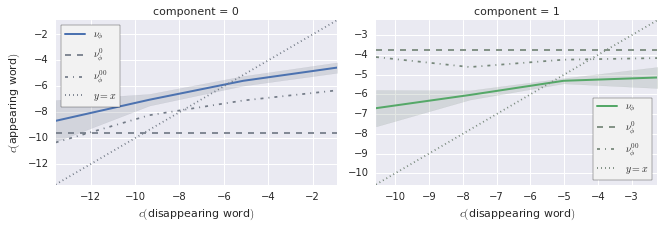

In [38]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `relevant_features`). So note the following:

In [39]:
for feature in relevant_features:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution
                               ._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature)
                 for feature in relevant_features]:
    words.update(tfeature())

data = dict((feature, []) for feature in relevant_features)
words_list = []
for word in words:
    words_list.append(word)
    for feature in relevant_features:
        data[feature].append(Substitution
                             ._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, "
      "only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, "
      "but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'letters_count' is based on 42786 words.



Among all the set of words used by these features, only 14450 are used.

Similarly, we mined 1115 (cluster-unique) substitutions, but the PCA is in fact computed on 907 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.

## 5 Interactions between features (by Anova)

Some useful variables first.

In [40]:
cuts = [('fixed bins', pd.cut)]#, ('quantiles', pd.qcut)]
rels = [('global', ''), ('sentence-relative', '_rel')]

def star_level(p):
    if p < .001:
        return '***'
    elif p < .01:
        return ' **'
    elif p < .05:
        return '  *'
    else:
        return 'ns.'

Now for each feature, assess if it has an interaction with the other features' **destination value**. We look at this for all pairs of features, with all pairs of global/sentence-relative value and types of binning (fixed width/quantiles). So it's a lot of answers.

Three stars means $p < .001$, two $p < .01$, one $p < .05$, and `ns.` means non-significative.

In [41]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
    * sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
   ** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
  ns. global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
    * global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  *** global -> global


  ns. global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
    * global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
    * global -> global
  ns. global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
  *** global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
    * sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global


    * global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> synonyms_count


   ** global -> global
   ** global -> sentence-relative
   ** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  *** global -> global
    * global -> sentence-relative
   ** sentence-relative -> global
    * sentence-relative -> sentence-relative

-> clustering


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Now for each feature, look at its interaction with the other features' **variation (i.e. destination - source)**. Same drill, same combinations.

In [42]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]\
                    - variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global
   ** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  *** global -> global
  *** global -> sentence-relative
   ** sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> aoa
    * global -> global


    * global -> sentence-relative


    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count
   ** global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> orthographic_density


    * global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global


    * global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> aoa
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
    * global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count


    * global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency


  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global
    * global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Ok, so this can go on for a long time, and I'm not going to look at interactions with this lens (meaning at interaction of couples of features with another feature's destination values).

## 6 Regression

In [43]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [44]:
rels = {False: ('global', ''),
        True: ('rel', '_rel')}

def regress(data, features, target,
            source_rel=False, dest_rel=False, interactions=False):
    if source_rel not in [True, False, 'both']:
        raise ValueError
    if not isinstance(dest_rel, bool):
        raise ValueError
    # Process source/destination relativeness arguments.
    if isinstance(source_rel, bool):
        source_rel = [source_rel]
    else:
        source_rel = [False, True]
    dest_rel_name, dest_rel = rels[dest_rel]
    
    features = tuple(sorted(features))
    feature_tuples = [('source' + rels[rel][1], feature)
                      for rel in source_rel
                      for feature in features]
    feature_names = [rels[rel][0] + '_' + feature
                     for rel in source_rel
                     for feature in features]
    
    # Get source and destination values.
    source = pd.pivot_table(
        data,
        values=['source' + rels[rel][1] for rel in source_rel],
        index=['cluster_id'],
        columns=['feature']
    )[feature_tuples].dropna()
    destination = variations[variations.feature == target]\
        .pivot(index='cluster_id', columns='feature',
               values='destination' + dest_rel)\
        .loc[source.index][target].dropna()
    source = source.loc[destination.index].values
    destination = destination.values

    # If asked to, get polynomial features.
    if interactions:
        poly = PolynomialFeatures(degree=2, interaction_only=True)
        source = poly.fit_transform(source)
        regress_features = [' * '.join([feature_names[j]
                                        for j, p in enumerate(powers)
                                        if p > 0]) or 'intercept'
                            for powers in poly.powers_]
    else:
        regress_features = feature_names

    # Regress.
    linreg = linear_model.LinearRegression(fit_intercept=not interactions)
    linreg.fit(source, destination)

    # And print the score and coefficients.
    print('Regressing {} with {} measures, {} interactions'
          .format(dest_rel_name + ' ' + target, len(source),
                  'with' if interactions else 'no'))
    print('           ' + '^' * len(dest_rel_name + ' ' + target))
    print('R^2 = {}'
          .format(linreg.score(source, destination)))
    print()
    coeffs = pd.Series(index=regress_features, data=linreg.coef_)
    if not interactions:
        coeffs = pd.Series(index=['intercept'], data=[linreg.intercept_])\
            .append(coeffs)
    with pd.option_context('display.max_rows', 999):
        print(coeffs)

In [45]:
for target in PAPER_FEATURES:
    print('-' * 70)
    for source_rel, dest_rel in product([False, True, 'both'],
                                        [False, True]):
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel)
        print()
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel, interactions=True)
        print()

----------------------------------------------------------------------
Regressing global frequency with 680 measures, no interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.06768116254566503

intercept                      6.235912
global_aoa                    -0.011847
global_clustering              0.087012
global_frequency               0.346727
global_letters_count          -0.023213
global_orthographic_density   -0.066673
global_synonyms_count         -0.098932
dtype: float64

Regressing global frequency with 680 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.08229120970813819

intercept                                              13.810942
global_aoa                                             -0.404011
global_clustering                                       0.358266
global_frequency                                        0.105180
global_letters_count                                   -1.286151
global_orthographic_density                            -0.809256
globa

Regressing global frequency with 680 measures, no interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.07580067583287708

intercept                      5.110271
global_aoa                    -0.094857
global_clustering              0.052375
global_frequency               0.367556
global_letters_count           0.170230
global_orthographic_density    0.119351
global_synonyms_count         -0.148586
rel_aoa                        0.121436
rel_clustering                 0.036302
rel_frequency                 -0.023078
rel_letters_count             -0.204276
rel_orthographic_density      -0.203291
rel_synonyms_count             0.056536
dtype: float64

Regressing global frequency with 680 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.15588101836814117

intercept                                                -85.568551
global_aoa                                                 2.237900
global_clustering                                        -14.383939
global_frequency      

Regressing rel aoa with 629 measures, with interactions
           ^^^^^^^
R^2 = 0.04459314165016004

intercept                                              9.458368
global_aoa                                            -0.513429
global_clustering                                      1.377439
global_frequency                                      -0.295723
global_letters_count                                   0.295550
global_orthographic_density                           -2.466756
global_synonyms_count                                 -0.818346
global_aoa * global_clustering                        -0.029843
global_aoa * global_frequency                          0.029213
global_aoa * global_letters_count                      0.010888
global_aoa * global_orthographic_density               0.093295
global_aoa * global_synonyms_count                    -0.060347
global_clustering * global_frequency                  -0.055538
global_clustering * global_letters_count              -0.027677
gl

Regressing rel aoa with 629 measures, no interactions
           ^^^^^^^
R^2 = 0.1582600288888818

intercept                      4.675375
global_aoa                    -0.330892
global_clustering              0.137302
global_frequency              -0.082597
global_letters_count          -0.022356
global_orthographic_density   -0.125048
global_synonyms_count          0.087569
rel_aoa                        0.622669
rel_clustering                -0.069027
rel_frequency                 -0.025978
rel_letters_count              0.035397
rel_orthographic_density       0.011472
rel_synonyms_count            -0.020595
dtype: float64

Regressing rel aoa with 629 measures, with interactions
           ^^^^^^^
R^2 = 0.26151239937189474

intercept                                                 68.968082
global_aoa                                                -1.722709
global_clustering                                         10.873616
global_frequency                                          -

Regressing global clustering with 542 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.04603943121971488

intercept                                       -5.878477
rel_aoa                                         -0.002344
rel_clustering                                   0.055432
rel_frequency                                   -0.071727
rel_letters_count                               -0.042668
rel_orthographic_density                         0.008213
rel_synonyms_count                              -0.164416
rel_aoa * rel_clustering                        -0.010542
rel_aoa * rel_frequency                         -0.013472
rel_aoa * rel_letters_count                     -0.012459
rel_aoa * rel_orthographic_density               0.006687
rel_aoa * rel_synonyms_count                     0.035080
rel_clustering * rel_frequency                   0.036766
rel_clustering * rel_letters_count               0.064870
rel_clustering * rel_orthographic_density        0.010656
rel_clus

Regressing global letters_count with 680 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.0748920326571535

intercept                      3.785297
global_aoa                     0.114613
global_clustering             -0.109936
global_frequency               0.010054
global_letters_count           0.220641
global_orthographic_density   -0.038784
global_synonyms_count         -0.134034
dtype: float64

Regressing global letters_count with 680 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.09363164210437469

intercept                                             -12.919457
global_aoa                                              1.051481
global_clustering                                      -2.212995
global_frequency                                        1.246920
global_letters_count                                    0.911096
global_orthographic_density                            -0.922308
global_synonyms_count                                   2.469

Regressing global letters_count with 680 measures, no interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.09079338125142511

intercept                      1.610996
global_aoa                     0.275993
global_clustering             -0.270023
global_frequency               0.071863
global_letters_count           0.166393
global_orthographic_density   -0.153940
global_synonyms_count         -0.127140
rel_aoa                       -0.237969
rel_clustering                 0.174980
rel_frequency                 -0.075727
rel_letters_count              0.059946
rel_orthographic_density       0.150885
rel_synonyms_count             0.002813
dtype: float64

Regressing global letters_count with 680 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^
R^2 = 0.18060454161472106

intercept                                                 40.819677
global_aoa                                                 0.953728
global_clustering                                          5.859875
global

Regressing rel synonyms_count with 659 measures, with interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.032169698297463745

intercept                                             -3.952641
global_aoa                                             0.383587
global_clustering                                     -0.438355
global_frequency                                       0.118211
global_letters_count                                   0.200609
global_orthographic_density                            0.486202
global_synonyms_count                                  0.028532
global_aoa * global_clustering                         0.047956
global_aoa * global_frequency                          0.001463
global_aoa * global_letters_count                     -0.018381
global_aoa * global_orthographic_density              -0.010079
global_aoa * global_synonyms_count                     0.024122
global_clustering * global_frequency                   0.014707
global_clustering * global_letters_count   

Regressing rel synonyms_count with 659 measures, no interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.13301993515793398

intercept                      0.457952
global_aoa                    -0.000853
global_clustering              0.011345
global_frequency              -0.023144
global_letters_count          -0.006864
global_orthographic_density    0.058469
global_synonyms_count         -0.587298
rel_aoa                       -0.012097
rel_clustering                 0.000017
rel_frequency                  0.019112
rel_letters_count              0.008277
rel_orthographic_density      -0.057212
rel_synonyms_count             0.768252
dtype: float64

Regressing rel synonyms_count with 659 measures, with interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.23092097861462124

intercept                                                 14.165999
global_aoa                                                -0.396858
global_clustering                                          2.242136
global_frequen

Regressing global orthographic_density with 551 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.08278991565401661

intercept                                        1.627978
rel_aoa                                          0.113830
rel_clustering                                   0.120167
rel_frequency                                   -0.012139
rel_letters_count                               -0.103987
rel_orthographic_density                         0.168682
rel_synonyms_count                               0.165712
rel_aoa * rel_clustering                         0.074428
rel_aoa * rel_frequency                          0.028690
rel_aoa * rel_letters_count                      0.005522
rel_aoa * rel_orthographic_density               0.049820
rel_aoa * rel_synonyms_count                     0.041400
rel_clustering * rel_frequency                   0.016930
rel_clustering * rel_letters_count              -0.033414
rel_clustering * rel_orthographic_density     